### Migration between counties

We pursue to relate fluctuations in the population data with transition rates among counties. This with hopes of finding distinctions between enviromental (vexation) and overpopulation (frustration) effects.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
import csv
import math
import vincent
import json
from scipy import stats
vincent.core.initialize_notebook()


/Users/Felipe/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Testing pandas by plotting iris dataset

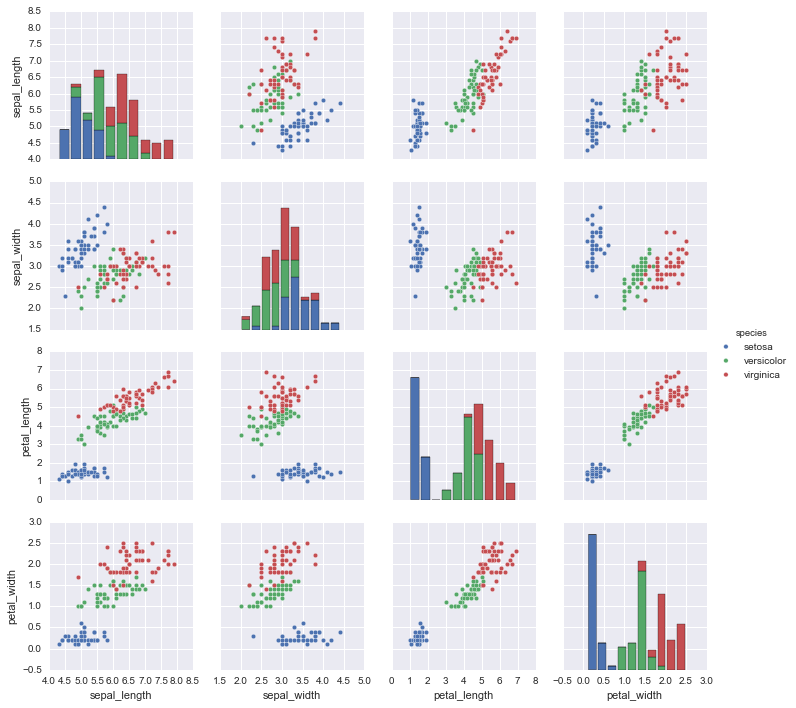

In [3]:

sns.set()

df1 = sns.load_dataset("iris")
sns.pairplot(df1, hue="species")



## Loading the population per county dataset

In [4]:
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))

In [5]:
pd.DataFrame(a[1:][:],columns=a[0][:])

geofips                           geoname region table linecode  \
0      01001                       Autauga, AL      5   CA1        2   
1      01003                       Baldwin, AL      5   CA1        2   
2      01005                       Barbour, AL      5   CA1        2   
3      01007                          Bibb, AL      5   CA1        2   
4      01009                        Blount, AL      5   CA1        2   
5      01011                       Bullock, AL      5   CA1        2   
6      01013                        Butler, AL      5   CA1        2   
7      01015                       Calhoun, AL      5   CA1        2   
8      01017                      Chambers, AL      5   CA1        2   
9      01019                      Cherokee, AL      5   CA1        2   
10     01021                       Chilton, AL      5   CA1        2   
11     01023                       Choctaw, AL      5   CA1        2   
12     01025                        Clarke, AL      5   CA1        2   
13     01027                          Clay, AL      5   CA1        2   
14     01029                      Cleburne, AL      5   CA1        2   
15     01031                        Coffee, AL      5   CA1        2   
16     01033                       Colbert, AL      5   CA1        2   
17     01035                       Conecuh, AL      5   CA1        2   
18     01037                         Coosa, AL      5   CA1        2   
19     01039                     Covington, AL      5   CA1        2   
20     01041                      Crenshaw, AL      5   CA1        2   
21     01043                       Cullman, AL      5   CA1        2   
22     01045                          Dale, AL      5   CA1        2   
23     01047                        Dallas, AL      5   CA1        2   
24     01049                        DeKalb, AL      5   CA1        2   
25     01051                        Elmore, AL      5   CA1        2   
26     01053                      Escambia, AL      5   CA1        2   
27     01055                        Etowah, AL      5   CA1        2   
28     01057                       Fayette, AL      5   CA1        2   
29     01059                      Franklin, AL      5   CA1        2   
...      ...                               ...    ...   ...      ...   
3108   55131                    Washington, WI      3   CA1        2   
3109   55133                      Waukesha, WI      3   CA1        2   
3110   55135                       Waupaca, WI      3   CA1        2   
3111   55137                      Waushara, WI      3   CA1        2   
3112   55139                     Winnebago, WI      3   CA1        2   
3113   55141                          Wood, WI      3   CA1        2   
3114   55901  Shawano (includes Menominee), WI      3   CA1        2   
3115   56001                        Albany, WY      7   CA1        2   
3116   56003                      Big Horn, WY      7   CA1        2   
3117   56005                      Campbell, WY      7   CA1        2   
3118   56007                        Carbon, WY      7   CA1        2   
3119   56009                      Converse, WY      7   CA1        2   
3120   56011                         Crook, WY      7   CA1        2   
3121   56013                       Fremont, WY      7   CA1        2   
3122   56015                        Goshen, WY      7   CA1        2   
3123   56017                   Hot Springs, WY      7   CA1        2   
3124   56019                       Johnson, WY      7   CA1        2   
3125   56021                       Laramie, WY      7   CA1        2   
3126   56023                       Lincoln, WY      7   CA1        2   
3127   56025                       Natrona, WY      7   CA1        2   
3128   56027                      Niobrara, WY      7   CA1        2   
3129   56029                          Park, WY      7   CA1        2   
3130   56031                        Platte, WY      7   CA1        2   
3131   56033                      Sheridan, W

## Proof of concept by looking at the distributions for three cities

We look for interesting bahavior by ploting cummulative distributions (looking for possible power law behavior) and correlation functions (looking for periodic behavior)

________BROOKLYN_________

2603330 9542.5 395.227272727 Kings, NY


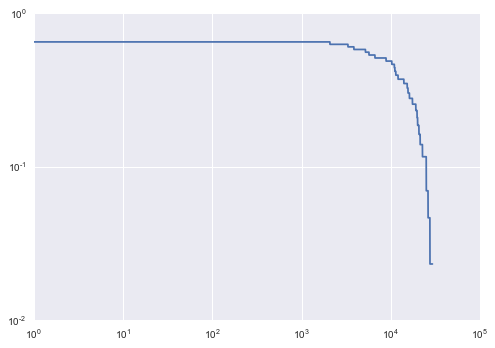

In [6]:
a[1875]
c=(a[1875][8:-2])
nearest=diff((np.array(c, dtype=np.int)))
print c[0], np.median(nearest), np.mean(nearest),a[1875][1]
bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
loglog((bins[:-1]),(1-np.cumsum(values)))
show()

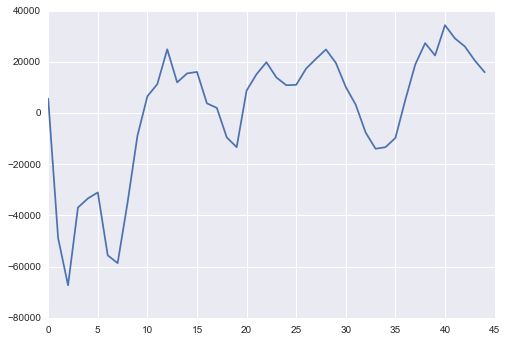

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """


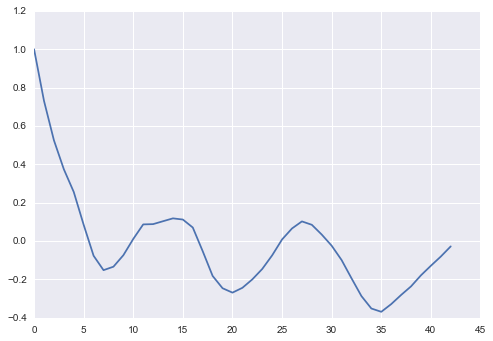

In [7]:
c=(a[1875][8:-1])
plot(diff((np.array(c, dtype=np.int))))
show()
corr=correlate(diff((np.array(c, dtype=np.int))),diff((np.array(c, dtype=np.int))),'full');
corr=(corr[(floor(size(corr)+1)/2.0):-1])

plot(corr/float(corr[0]))
show()

__SALT LAKE___

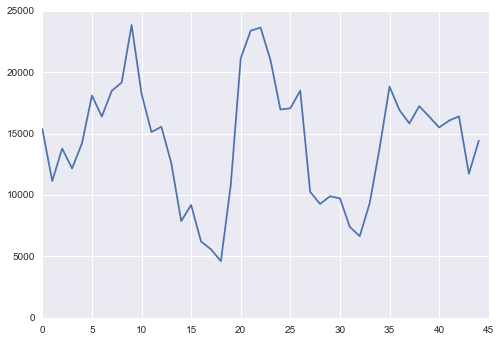

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """


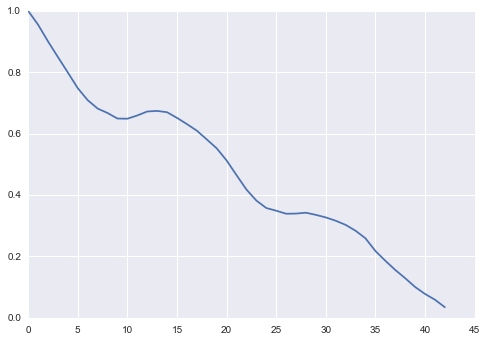

In [8]:
c=(a[2818][8:-1])
plot(diff((np.array(c, dtype=np.int))))
show()
corr=correlate(diff((np.array(c, dtype=np.int))),diff((np.array(c, dtype=np.int))),'full');
corr=(corr[(floor(size(corr)+1)/2.0):-1])

plot(corr/float(corr[0]))
show()

___Blount, AL__

['01007', 'Bibb, AL', '5', 'CA1', '2', '...', 'Population (persons) 1/', '14994', '13798', '13919', '14097', '14654', '14391', '14778', '14763', '15257', '15355', '15550', '15751', '15836', '16020', '15999', '16089', '16157', '15918', '16165', '16136', '16360', '16697', '17071', '17403', '17757', '18053', '18507', '18885', '19388', '19851', '20560', '19913', '21028', '21199', '21399', '21721', '22042', '22099', '22438', '22705', '22941', '22861', '22733', '22642', '22512', '22549', '22583', '007']


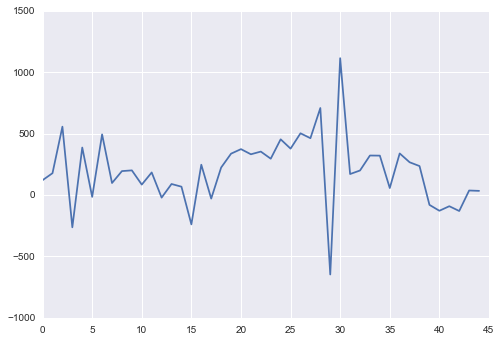

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


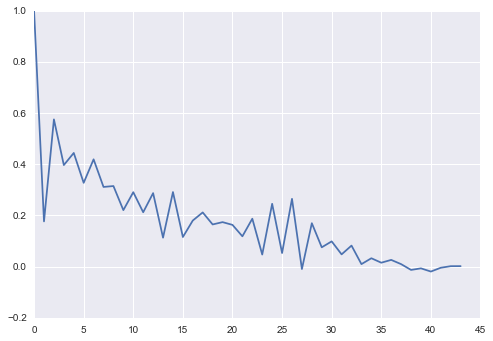

In [9]:
c=(a[4][8:-1])
print a[4]
plot(diff((np.array(c, dtype=np.int))))
show()
corr=correlate(diff((np.array(c, dtype=np.int))),diff((np.array(c, dtype=np.int))),'full');
corr=(corr[(floor(size(corr)-1)/2.0):-1])

plot(corr/float(corr[0]))
show()

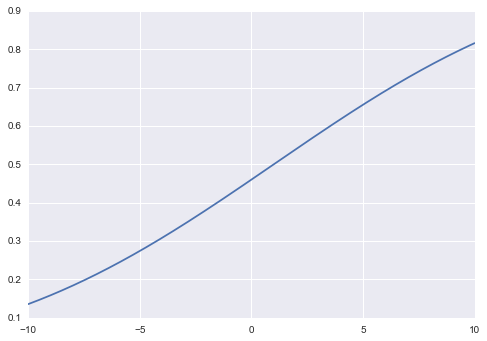

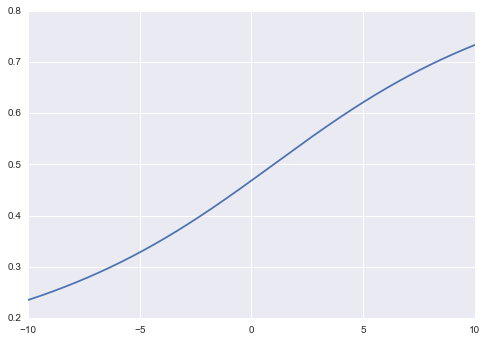

In [10]:
from scipy.special import erf
from scipy.optimize import curve_fit

def erfunc(x, mu, sig):
    return 0.5*(1+erf((x-mu)/(sig*np.sqrt(2))))
xlin=np.linspace(-10,10,1000)
mu,sig=1,10
plot(xlin,erfunc(xlin, mu, sig))
show()
def cauch(x, mu, sig):
    return np.arctan((x-mu)/sig)/np.pi + 0.5
xlin=np.linspace(-10,10,1000)
mu,sig=1,10
plot(xlin,cauch(xlin, mu, sig))
show()

Los Angeles, CA
NormaltestResult(statistic=0.75357207371521417, pvalue=0.686062850356425)
initial pop, median, mean,std 946000 69542.0 69867.1555556 25103.6989394 Maricopa, AZ


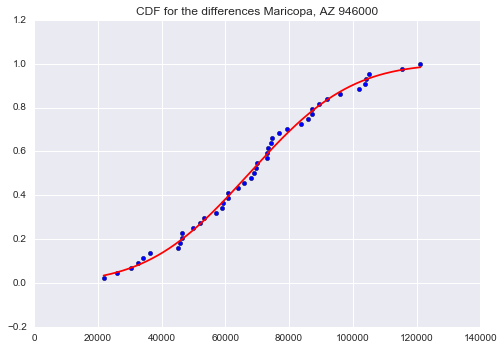

mu and sigma for the gaussian cdf [ 67478.27760746  25016.77606537] 
 

NormaltestResult(statistic=1.9522268911624319, pvalue=0.37677260413125424)
initial pop, median, mean,std 1060099 13813.0 12283.3555556 10805.0754394 Alameda, CA


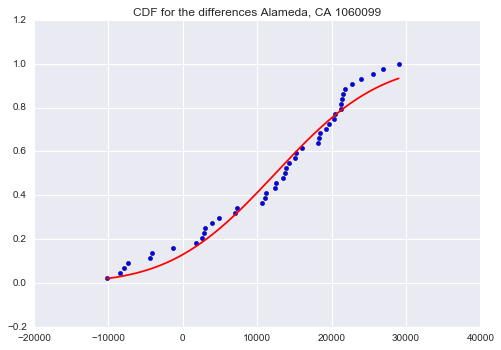

mu and sigma for the gaussian cdf [ 12444.05862236  11038.14692252] 
 

NormaltestResult(statistic=0.21919374524608107, pvalue=0.8961953433632196)
initial pop, median, mean,std 6989910 70593.0 69322.8 55932.9838927 Los Angeles, CA


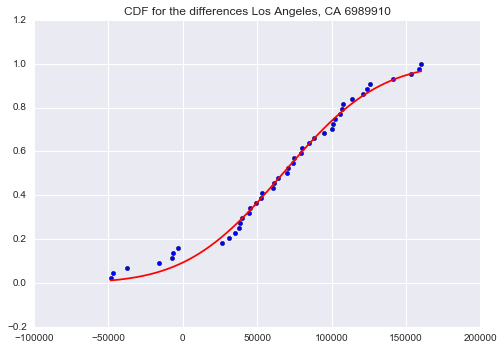

mu and sigma for the gaussian cdf [ 67279.60571693  50923.03257367] 
 

NormaltestResult(statistic=6.4158915556132809, pvalue=0.040439599929998196)
initial pop, median, mean,std 1376796 39462.0 39292.5555556 16928.6305262 Orange, CA


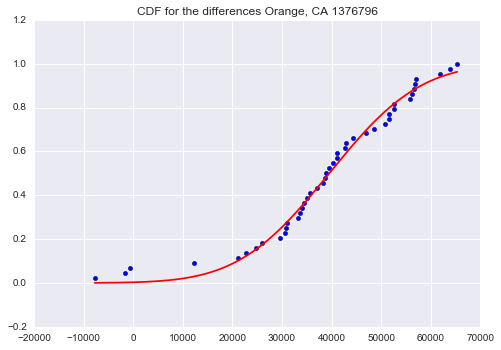

mu and sigma for the gaussian cdf [ 39502.9026374   14430.58735503] 
 

NormaltestResult(statistic=6.8330512570502293, pvalue=0.032826287758811828)
initial pop, median, mean,std 450477 34529.0 41730.0444444 23263.9539985 Riverside, CA


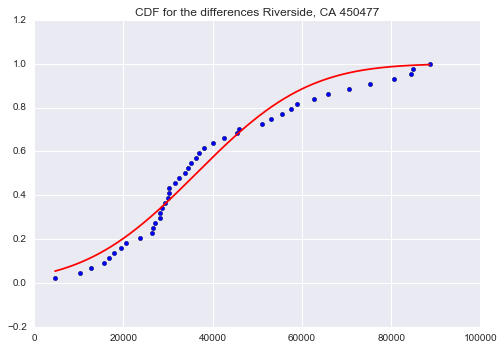

mu and sigma for the gaussian cdf [ 36358.98540473  19698.80045359] 
 

NormaltestResult(statistic=5.9632992953326784, pvalue=0.050709112659278389)
initial pop, median, mean,std 671688 29978.0 31971.0666667 20432.1916325 San Bernardino, CA


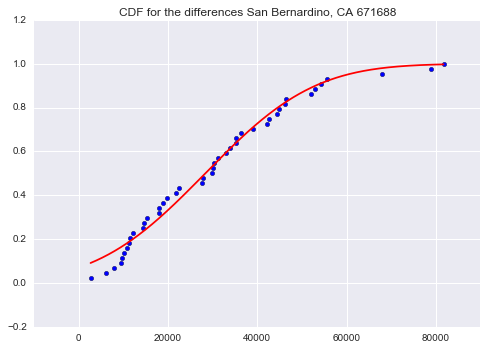

mu and sigma for the gaussian cdf [ 28353.90355379  19264.3815755 ] 
 

NormaltestResult(statistic=0.4171677407966326, pvalue=0.81173295148153302)
initial pop, median, mean,std 1340989 42055.0 42771.3555556 20221.3446351 San Diego, CA


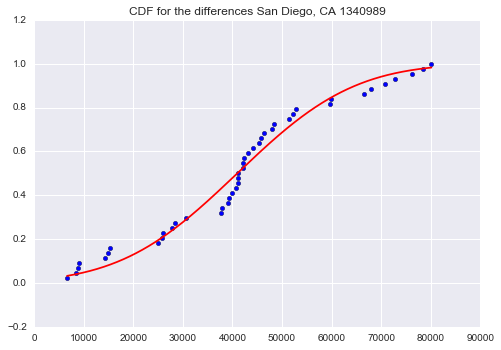

mu and sigma for the gaussian cdf [ 40963.16579379  18566.16046227] 
 

NormaltestResult(statistic=12.769330051847682, pvalue=0.0016872335804663369)
initial pop, median, mean,std 1033442 21707.0 19168.8444444 11318.1129581 Santa Clara, CA


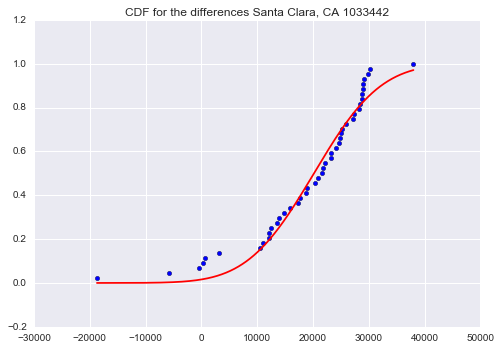

mu and sigma for the gaussian cdf [ 20156.37464139   9397.82672066] 
 

NormaltestResult(statistic=7.4642049884408532, pvalue=0.023942444030834165)
initial pop, median, mean,std 595651 29114.0 28311.7333333 14977.761845 Broward, FL


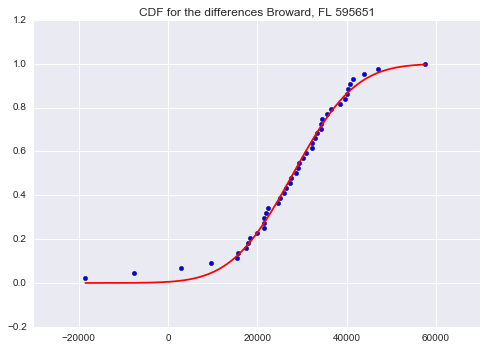

mu and sigma for the gaussian cdf [ 28076.82937187  10905.26035204] 
 

NormaltestResult(statistic=4.4154685618428999, pvalue=0.10994948115376206)
initial pop, median, mean,std 1249884 29556.0 31533.7555556 14481.7130573 Miami-Dade, FL


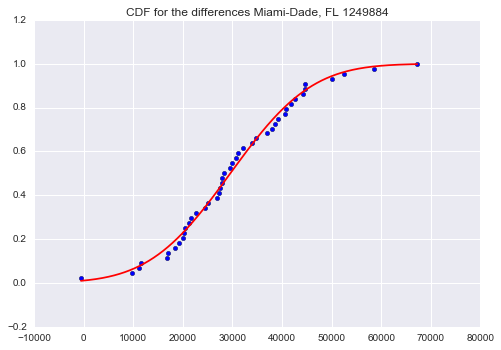

mu and sigma for the gaussian cdf [ 29569.2857914   12886.07265836] 
 

NormaltestResult(statistic=4.3120587119080023, pvalue=0.11578394635645535)
initial pop, median, mean,std 5473709 -11260.0 -5000.11111111 26433.0157536 Cook, IL


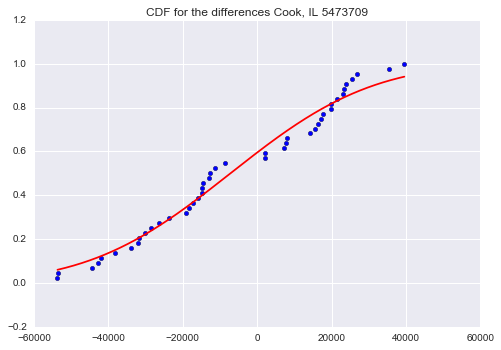

mu and sigma for the gaussian cdf [ -7220.98602574  29904.70391553] 
 

NormaltestResult(statistic=0.46252005719011624, pvalue=0.79353309790901716)
initial pop, median, mean,std 1386993 4456.0 4122.88888889 7783.21556291 Middlesex, MA


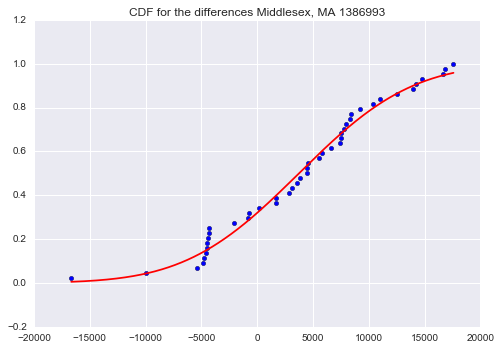

mu and sigma for the gaussian cdf [ 3734.61259413  7985.06964423] 
 

NormaltestResult(statistic=2.3037130557312251, pvalue=0.3160494697311913)
initial pop, median, mean,std 2685171 -16801.0 -20425.8444444 15337.7122689 Wayne, MI


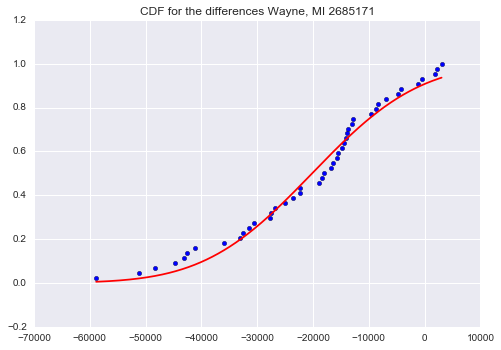

mu and sigma for the gaussian cdf [-20169.73850209  15199.45790101] 
 

NormaltestResult(statistic=32.369054666960963, pvalue=9.3572684017039833e-08)
initial pop, median, mean,std 267479 30988.0 40037.0444444 22803.4987656 Clark, NV


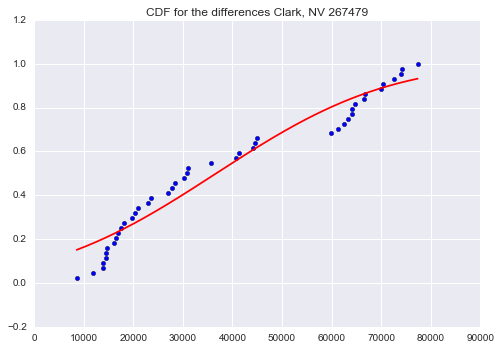

mu and sigma for the gaussian cdf [ 36723.6989794   27252.11073375] 
 

NormaltestResult(statistic=9.8061949833924764, pvalue=0.0074235530277938742)
initial pop, median, mean,std 2596639 8839.0 535.133333333 25079.5045119 Kings, NY


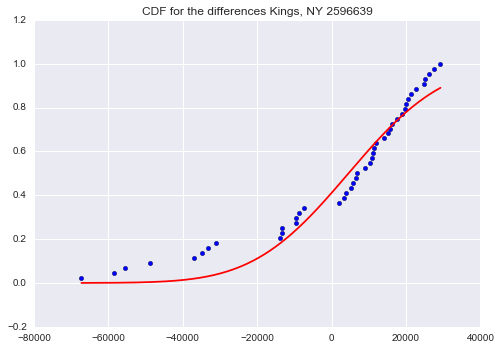

mu and sigma for the gaussian cdf [  4518.79695906  20134.38202635] 
 

NormaltestResult(statistic=8.4206862010601267, pvalue=0.014841275414982785)
initial pop, median, mean,std 1543762 3683.0 2071.2 9822.2568658 New York, NY


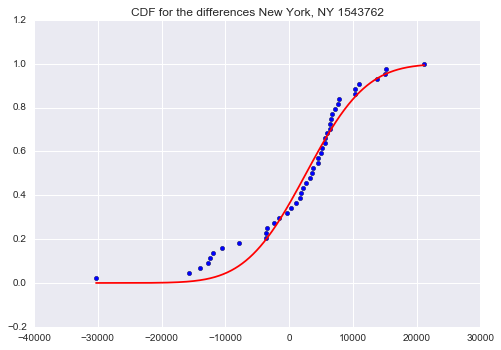

mu and sigma for the gaussian cdf [ 2658.61946321  7427.9836992 ] 
 

NormaltestResult(statistic=6.7654667508744586, pvalue=0.033954517332397717)
initial pop, median, mean,std 1966669 6856.0 7906.24444444 16030.6558127 Queens, NY


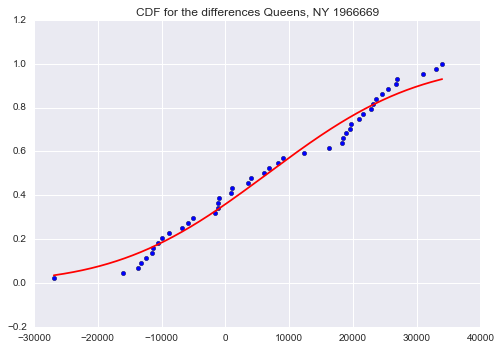

mu and sigma for the gaussian cdf [  6668.35397937  18522.80255847] 
 

NormaltestResult(statistic=18.738628483409322, pvalue=8.5301864828681029e-05)
initial pop, median, mean,std 1092090 7366.0 9116.71111111 8663.31238582 Suffolk, NY


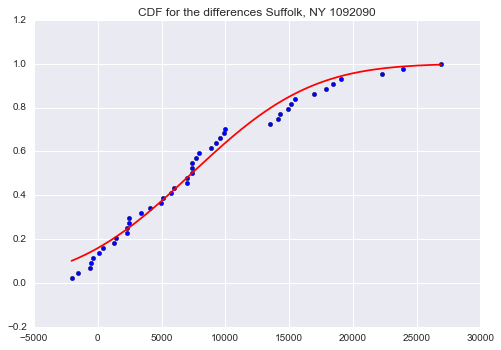

mu and sigma for the gaussian cdf [ 7362.92106348  7380.36679458] 
 

NormaltestResult(statistic=1.9181748128665528, pvalue=0.3832424710498803)
initial pop, median, mean,std 1953285 -6639.0 -8704.95555556 12785.8591958 Philadelphia, PA


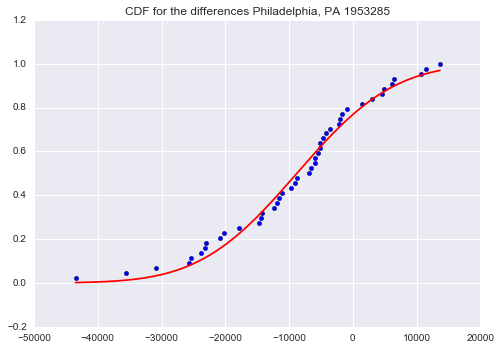

mu and sigma for the gaussian cdf [ -8797.15321034  11978.1482232 ] 
 

NormaltestResult(statistic=0.11122011745492805, pvalue=0.94590791252021922)
initial pop, median, mean,std 821568 22997.0 23082.3555556 9722.79766358 Bexar, TX


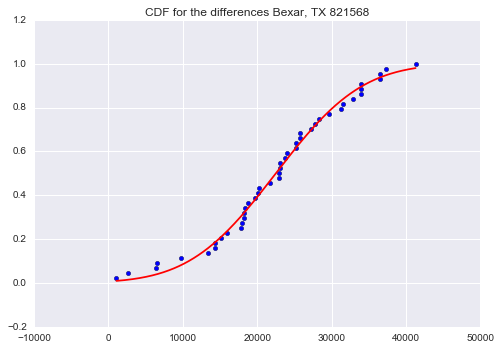

mu and sigma for the gaussian cdf [ 22496.12572328   9125.94096143] 
 

NormaltestResult(statistic=3.6848725395370092, pvalue=0.15843097495376091)
initial pop, median, mean,std 1282675 29359.0 27487.7777778 14014.1819389 Dallas, TX


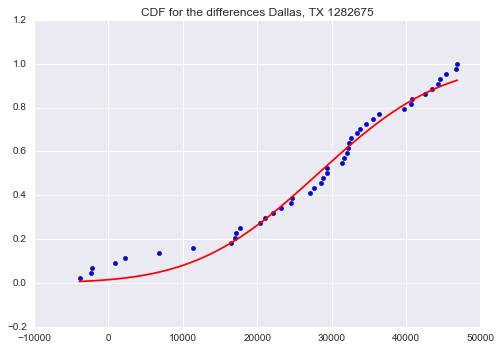

mu and sigma for the gaussian cdf [ 28215.5934983   12979.52598492] 
 

NormaltestResult(statistic=5.7913972117297536, pvalue=0.05526040636264528)
initial pop, median, mean,std 1709436 64621.0 60847.5777778 33486.5993645 Harris, TX


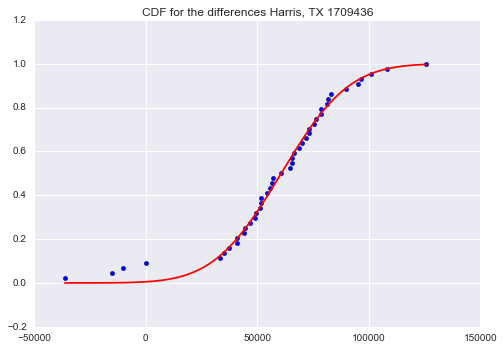

mu and sigma for the gaussian cdf [ 60726.52106825  23768.24166197] 
 

NormaltestResult(statistic=7.3199457986475318, pvalue=0.025733210104305692)
initial pop, median, mean,std 684887 31453.0 28032.4222222 10484.4028357 Tarrant, TX


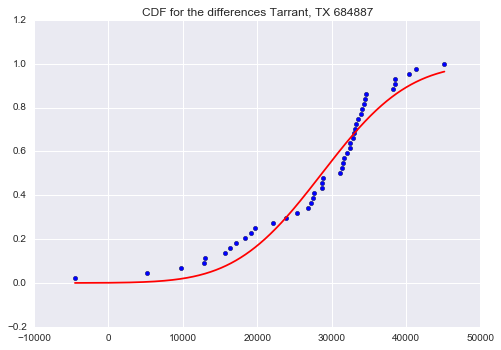

mu and sigma for the gaussian cdf [ 28697.03235209   9128.66974959] 
 

NormaltestResult(statistic=2.0189493390974871, pvalue=0.3644103651583549)
initial pop, median, mean,std 1142545 23865.0 20883.1777778 12382.958884 King, WA


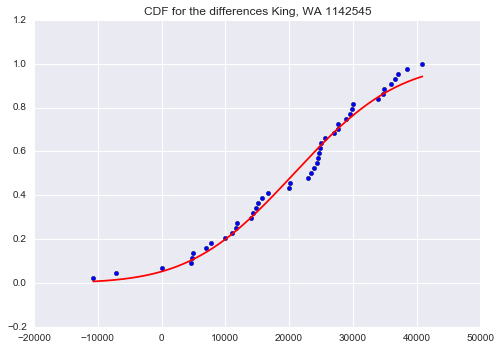

mu and sigma for the gaussian cdf [ 20786.34144338  12794.16384398] 
 



In [11]:
##GAUSSIAN
county=178
central=[]
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
print a[229][1]
for i in range(1,np.size(np.array(a).T[1,:]) ):
    
    #print i
    c= np.array([x for x in a[i][7:-2] if x!='(NA)' ] , dtype=np.int) #####key formatting thingy
    if (c[-2]>1500000):
        nearest=diff((np.array(c, dtype=np.int)))
        n = stats.normaltest(nearest)
        print n
        central.append([np.median(nearest), np.mean(nearest)])
        print 'initial pop, median, mean,std',c[0], np.median(nearest), np.mean(nearest),np.std(nearest),a[i][1]
        bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
        values, base = np.histogram(nearest, bins=bins, density=1)
        u, indices = np.unique(np.cumsum(values), return_index=True)
        init=bins[:-1]
        x=[init[j] for j in indices]
        scatter(x, u)
        
        xlin=np.linspace(min(x),max(x),1000)
        superior_params, extras = curve_fit(erfunc, x, u,p0=[np.mean(nearest),np.std(nearest)])
        plot(xlin, erfunc(xlin, *superior_params),'r')
        title('CDF for the differences '+a[i][1]+' '+str(c[0]))
        show()
        print 'mu and sigma for the gaussian cdf', superior_params, '\n \n'

Los Angeles, CA
initial pop, median, mean,std 946000 69542.0 69867.1555556 25103.6989394 Maricopa, AZ


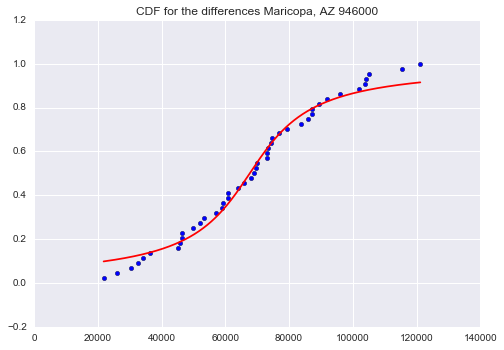

mu and sigma for the gaussian cdf [ 67640.28585522  14609.74837861] 
 

initial pop, median, mean,std 1060099 13813.0 12283.3555556 10805.0754394 Alameda, CA


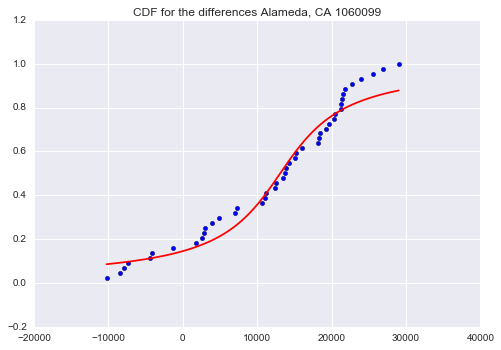

mu and sigma for the gaussian cdf [ 13081.24288611   6420.45894899] 
 

initial pop, median, mean,std 6989910 70593.0 69322.8 55932.9838927 Los Angeles, CA


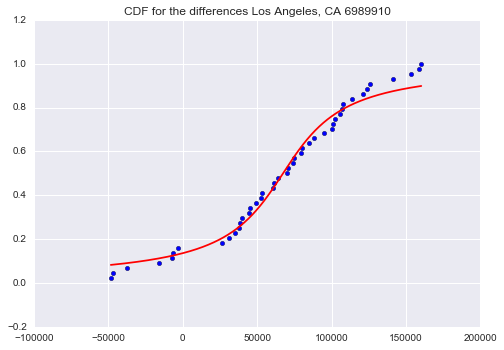

mu and sigma for the gaussian cdf [ 67304.51097949  30639.47187891] 
 

initial pop, median, mean,std 1376796 39462.0 39292.5555556 16928.6305262 Orange, CA


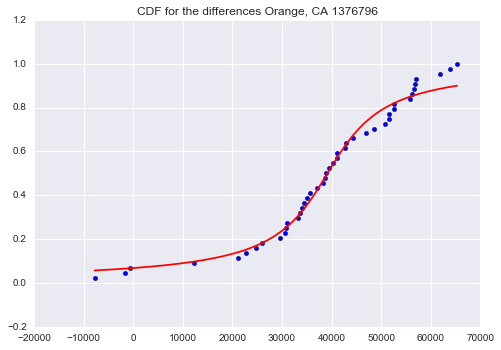

mu and sigma for the gaussian cdf [ 39155.72907878   8501.81429554] 
 

initial pop, median, mean,std 450477 34529.0 41730.0444444 23263.9539985 Riverside, CA


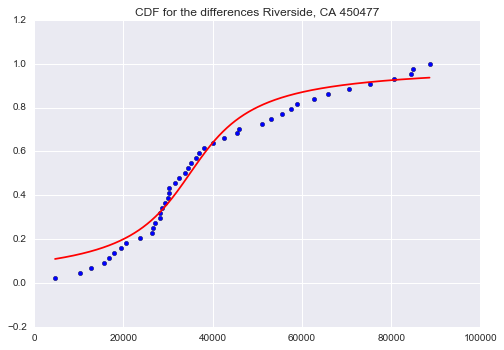

mu and sigma for the gaussian cdf [ 34931.48405282  10826.34907888] 
 

initial pop, median, mean,std 671688 29978.0 31971.0666667 20432.1916325 San Bernardino, CA


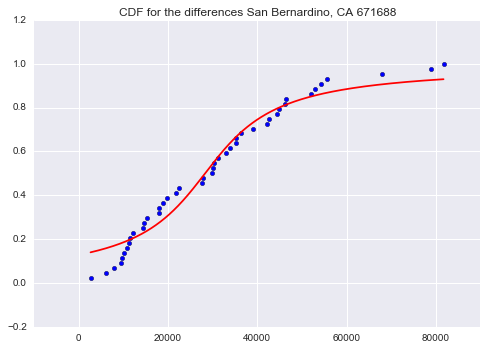

mu and sigma for the gaussian cdf [ 28307.09584185  12043.2303893 ] 
 

initial pop, median, mean,std 1340989 42055.0 42771.3555556 20221.3446351 San Diego, CA


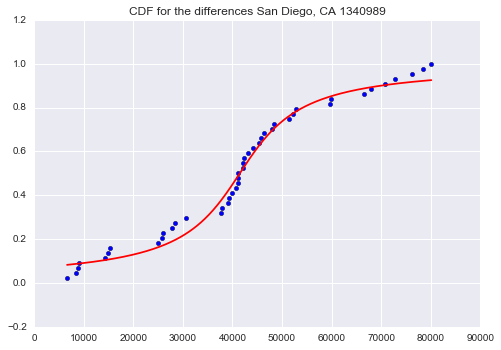

mu and sigma for the gaussian cdf [ 41472.58302532   9242.29037334] 
 

initial pop, median, mean,std 1033442 21707.0 19168.8444444 11318.1129581 Santa Clara, CA


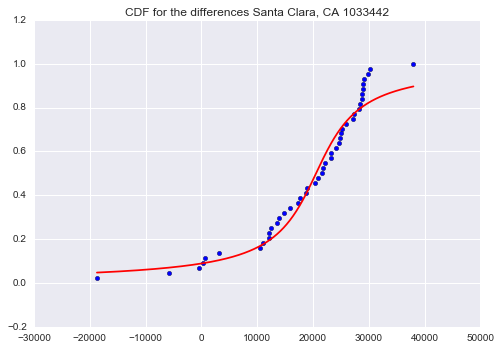

mu and sigma for the gaussian cdf [ 20533.23987908   5883.89607099] 
 

initial pop, median, mean,std 595651 29114.0 28311.7333333 14977.761845 Broward, FL


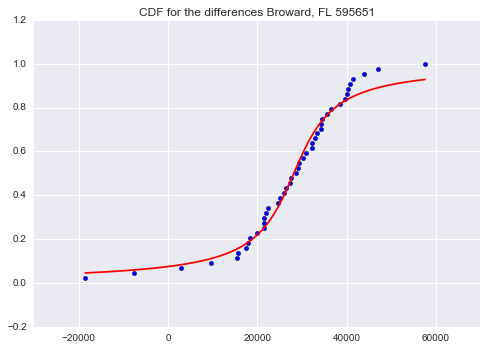

mu and sigma for the gaussian cdf [ 28181.113209     6745.19657075] 
 

initial pop, median, mean,std 1249884 29556.0 31533.7555556 14481.7130573 Miami-Dade, FL


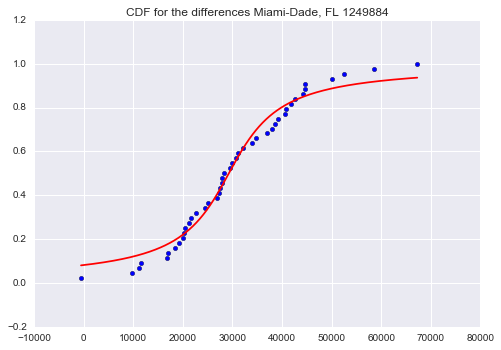

mu and sigma for the gaussian cdf [ 29266.94428138   7677.50600405] 
 

initial pop, median, mean,std 5473709 -11260.0 -5000.11111111 26433.0157536 Cook, IL


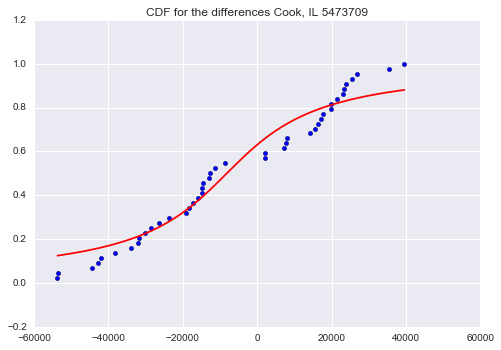

mu and sigma for the gaussian cdf [ -8190.49982754  18789.49854706] 
 

initial pop, median, mean,std 1386993 4456.0 4122.88888889 7783.21556291 Middlesex, MA


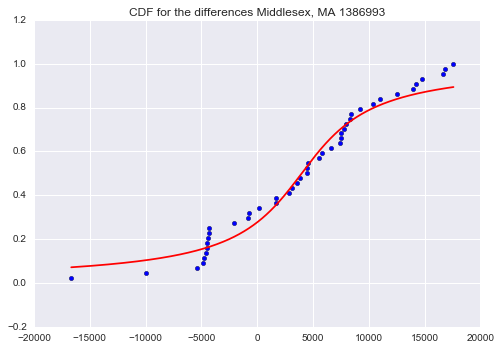

mu and sigma for the gaussian cdf [ 3979.20717528  4717.64669509] 
 

initial pop, median, mean,std 2685171 -16801.0 -20425.8444444 15337.7122689 Wayne, MI


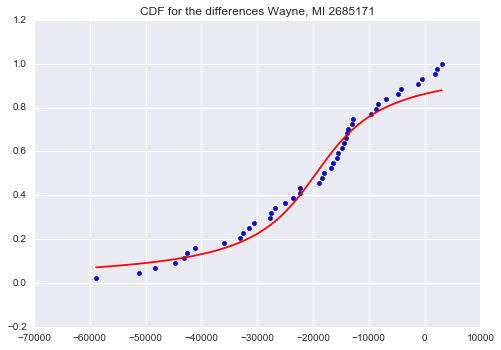

mu and sigma for the gaussian cdf [-19452.91521437   8983.15073281] 
 

initial pop, median, mean,std 267479 30988.0 40037.0444444 22803.4987656 Clark, NV


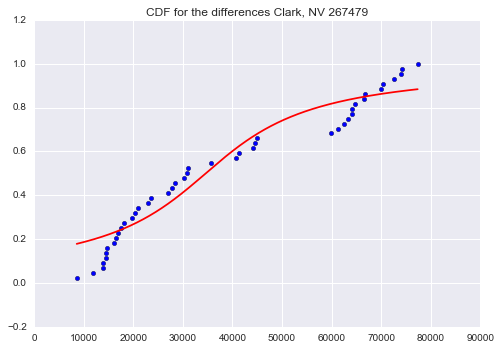

mu and sigma for the gaussian cdf [ 34605.91472207  16322.36288738] 
 

initial pop, median, mean,std 2596639 8839.0 535.133333333 25079.5045119 Kings, NY


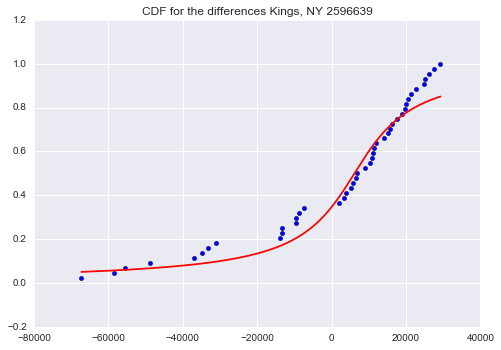

mu and sigma for the gaussian cdf [  6126.0392781   11729.40927856] 
 

initial pop, median, mean,std 1543762 3683.0 2071.2 9822.2568658 New York, NY


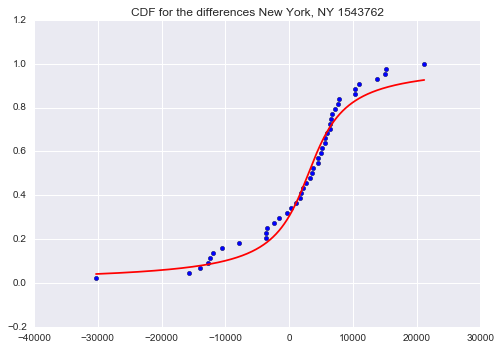

mu and sigma for the gaussian cdf [ 3029.78493033  4300.25647039] 
 

initial pop, median, mean,std 1966669 6856.0 7906.24444444 16030.6558127 Queens, NY


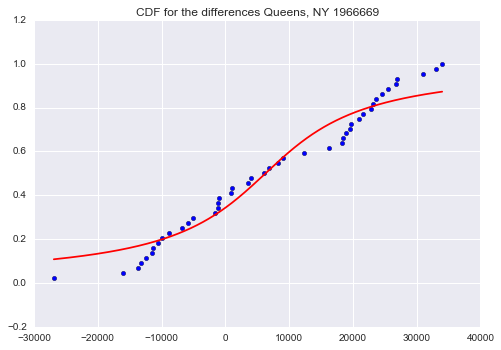

mu and sigma for the gaussian cdf [  6290.25585565  11714.06591301] 
 

initial pop, median, mean,std 1092090 7366.0 9116.71111111 8663.31238582 Suffolk, NY


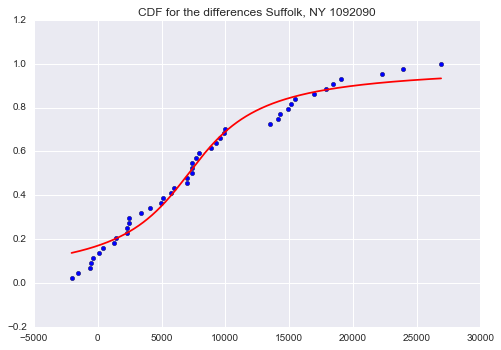

mu and sigma for the gaussian cdf [ 7121.71317961  4216.09632047] 
 

initial pop, median, mean,std 1953285 -6639.0 -8704.95555556 12785.8591958 Philadelphia, PA


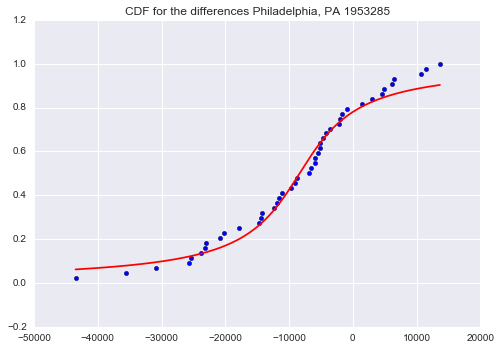

mu and sigma for the gaussian cdf [-8366.86882093  6904.11807518] 
 

initial pop, median, mean,std 821568 22997.0 23082.3555556 9722.79766358 Bexar, TX


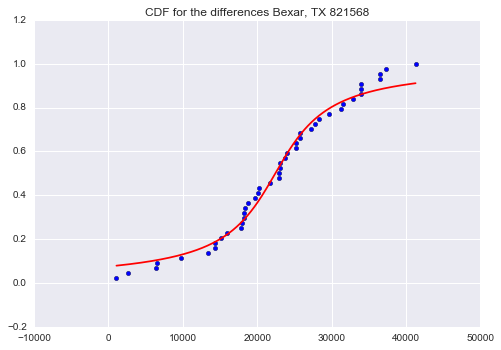

mu and sigma for the gaussian cdf [ 22424.4788708    5403.16075919] 
 

initial pop, median, mean,std 1282675 29359.0 27487.7777778 14014.1819389 Dallas, TX


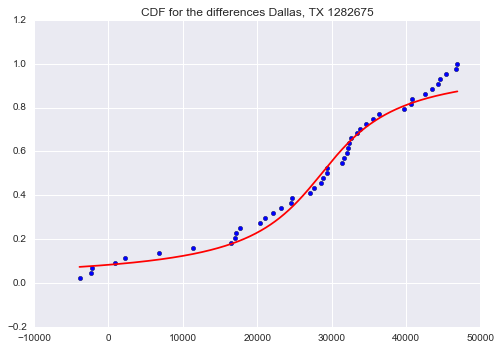

mu and sigma for the gaussian cdf [ 28663.27151962   7629.24234732] 
 

initial pop, median, mean,std 1709436 64621.0 60847.5777778 33486.5993645 Harris, TX


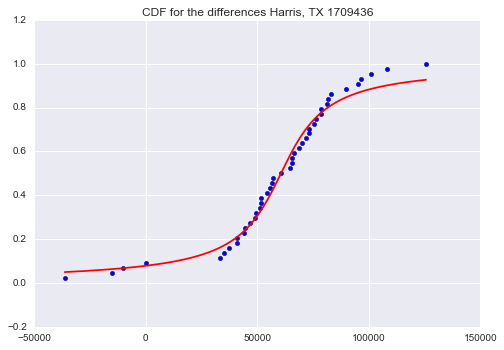

mu and sigma for the gaussian cdf [ 60626.24012636  15216.72809096] 
 

initial pop, median, mean,std 684887 31453.0 28032.4222222 10484.4028357 Tarrant, TX


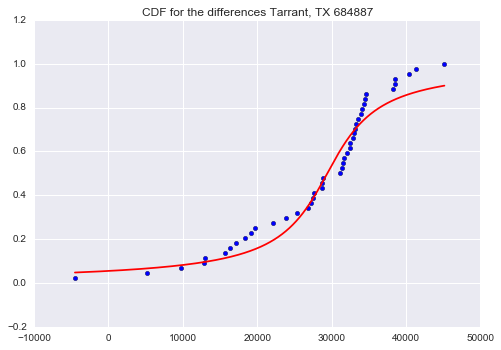

mu and sigma for the gaussian cdf [ 29407.11957376   5112.20801575] 
 

initial pop, median, mean,std 1142545 23865.0 20883.1777778 12382.958884 King, WA


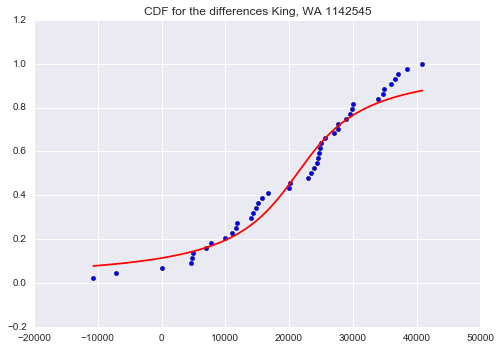

mu and sigma for the gaussian cdf [ 21269.98341008   7936.77304878] 
 



In [12]:
##CAUCHY
county=178
central=[]
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
print a[229][1]
for i in range(1,np.size(np.array(a).T[1,:]) ):
    
    #print i
    c= np.array([x for x in a[i][7:-2] if x!='(NA)' ] , dtype=np.int) #####key formatting thingy
    if (c[-2]>1500000):
        nearest=diff((np.array(c, dtype=np.int)))
        central.append([np.median(nearest), np.mean(nearest)])
        print 'initial pop, median, mean,std',c[0], np.median(nearest), np.mean(nearest),np.std(nearest),a[i][1]
        bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
        values, base = np.histogram(nearest, bins=bins, density=1)
        u, indices = np.unique(np.cumsum(values), return_index=True)
        init=bins[:-1]
        x=[init[j] for j in indices]
        scatter(x, u)
        
        xlin=np.linspace(min(x),max(x),1000)
        superior_params, extras = curve_fit(cauch, x, u,p0=[np.mean(nearest),np.std(nearest)])
        plot(xlin, cauch(xlin, *superior_params),'r')
        title('CDF for the differences '+a[i][1]+' '+str(c[0]))
        show()
        print 'mu and sigma for the gaussian cdf', superior_params, '\n \n'

# Los Angeles Is the biggest county in the time series and doesnt have the smooth behavior in the correlation function

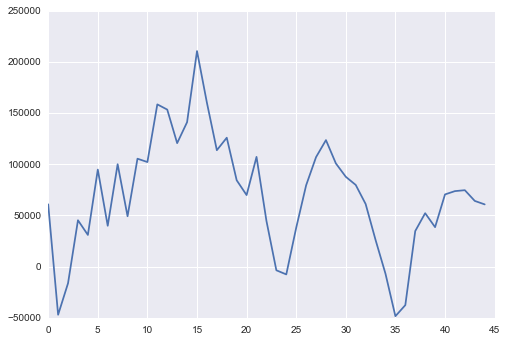

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  """


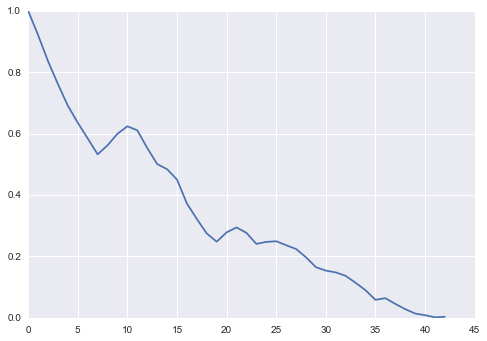

In [17]:
c=(a[229][8:-1])
plot(diff((np.array(c, dtype=np.int))))
show()
corr=correlate(diff((np.array(c, dtype=np.int))),diff((np.array(c, dtype=np.int))),'full');
corr=(corr[(floor(size(corr)+1)/2.0):-1])

plot(corr/float(corr[0]))
show()

# Two things for the total population

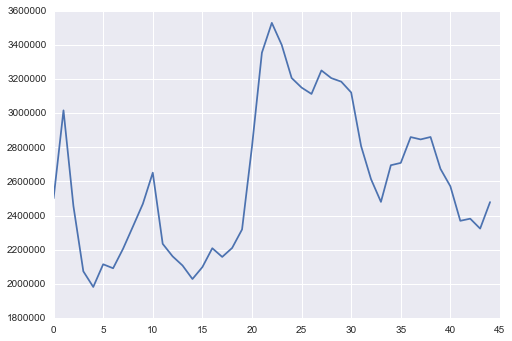

/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


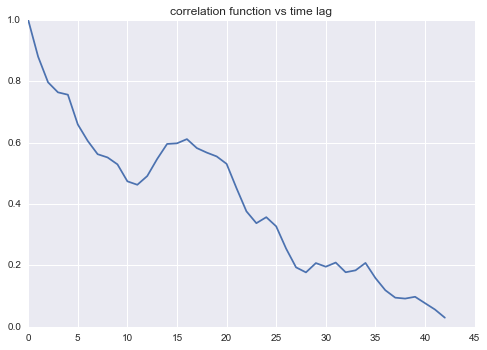

In [18]:


county=178
central=[]
Cumdis=[]
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
Total=np.zeros(46)
for county in range(1,3136):
    
    c= [x for x in a[county][7:-2] if x!='(NA)' ]  #####key formatting thingy

    if(len(c)>45):
        
        nearest=((np.array(c)).astype(int))
        Total+=nearest

diffs=np.diff(Total)   
#plot(Total)
plot(diffs)
show()
corr=correlate(diff((np.array(c, dtype=np.int))),diff((np.array(c, dtype=np.int))),'full');
corr=(corr[(floor(size(corr)+1)/2.0):-1])

title('correlation function vs time lag')
plot(corr/float(corr[0]))
show()

45 45
-1.27640097439 3.42210718226 0.637987590457


/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()
/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if sys.path[0] == '':


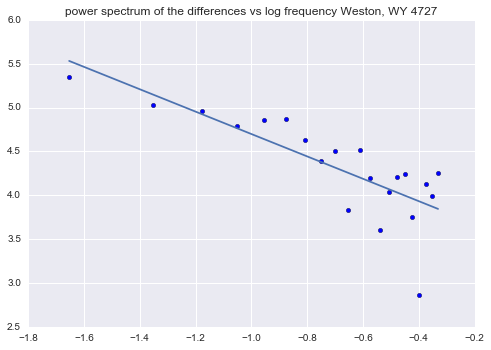

In [19]:
from scipy.fftpack import fft, fftfreq

n=len(diffs)
dt=1
fft_x = fft(diffs) / n # FFT Normalized
print np.size(fft_x),np.size(diffs)
freq = fftfreq(n, dt) # Recuperamos las frecuencias
fft_x_shifted = np.fft.fftshift(fft_x)
#print np.int((np.size(corr)-1)/2.0),np.size(corr),np.size(abs(fft_x_shifted))
freq_shifted = np.fft.fftshift(freq)
x=log10(freq_shifted[(np.floor(np.size(freq_shifted)-1)/2.0)+1:-1])
y=log10(abs(fft_x_shifted)[(np.floor(np.size(freq_shifted)-1)/2.0)+1:-1])
plt.scatter(x,y)
#plt.plot(freq_shifted[(np.floor(np.size(freq_shifted)-1)/2.0):-1],np.log10(abs(fft_x_shifted)[(np.floor(np.size(freq_shifted)-1)/2.0):-1]))
#plt.plot(freq_shifted,np.real(fft_x_shifted))
#plt.plot(freq_shifted,np.imag(fft_x_shifted))
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
plot(x,x*slope+intercept)
print slope, intercept, r_value**2
plt.title('power spectrum of the differences vs log frequency '+a[i][1]+' '+str(c[0]))
plt.show()



## Frequency analysis

Los Angeles, CA
45 45
-0.812693859608 2.67266973724 0.535694982796


/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Felipe/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


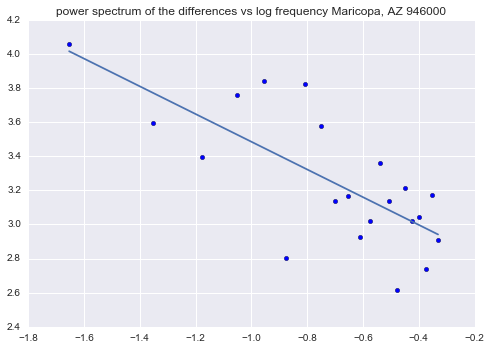

45 45
-0.663153343023 2.48098196997 0.384827673595


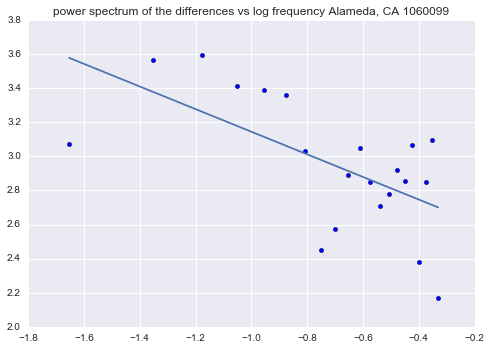

45 45
-0.700477401489 3.13754775213 0.466947723235


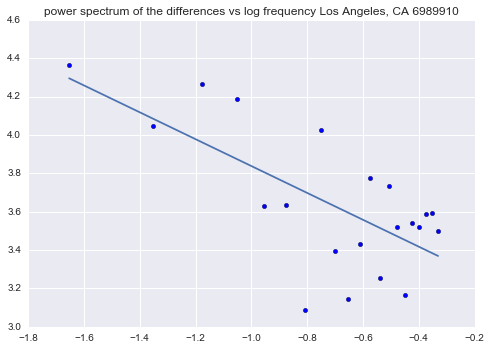

45 45
-0.882931122618 2.50073372557 0.723742805385


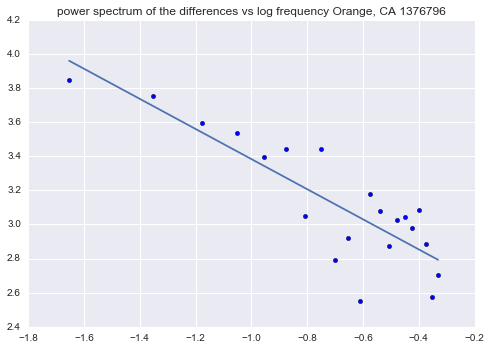

45 45
-0.930547226236 2.5786296673 0.821133893385


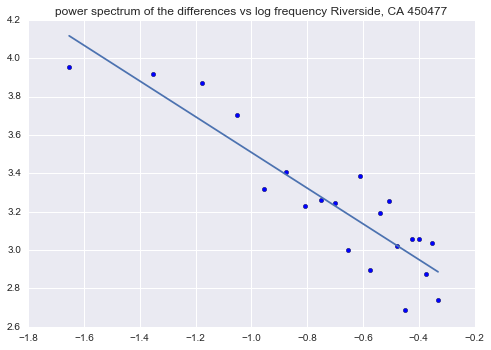

45 45
-1.14560966984 2.24733368172 0.578027840735


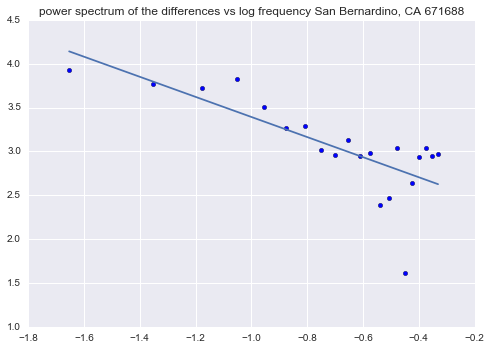

45 45
-0.560066622128 2.78678546212 0.317239716749


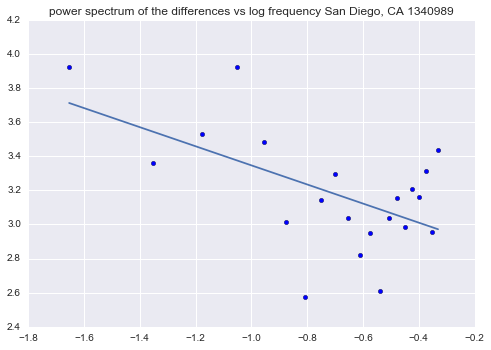

45 45
-0.662621565362 2.50873430902 0.278465672817


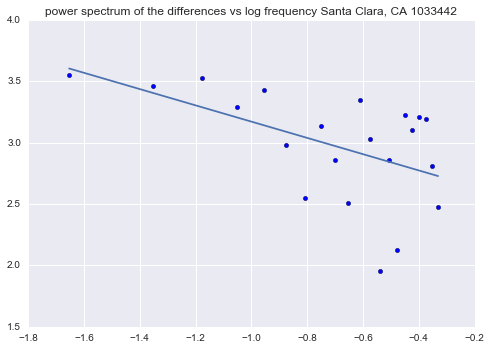

45 45
-0.767570425442 2.51733184949 0.482551233883


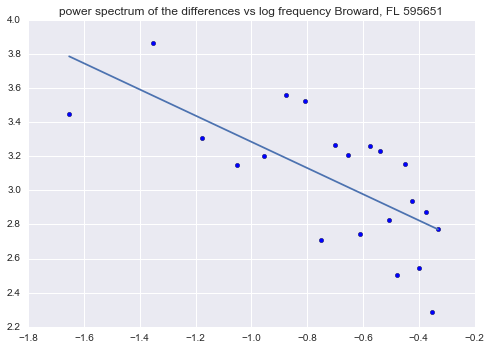

45 45
-0.258323761828 2.99497220985 0.103796861064


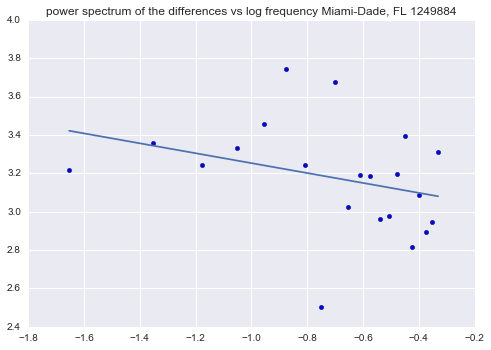

45 45
-0.759928139316 2.71298142455 0.359002669708


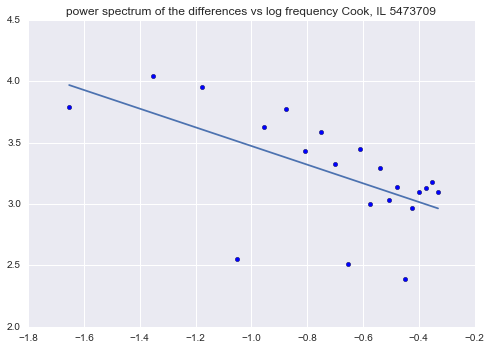

45 45
-0.781194518693 2.18481065127 0.581694842231


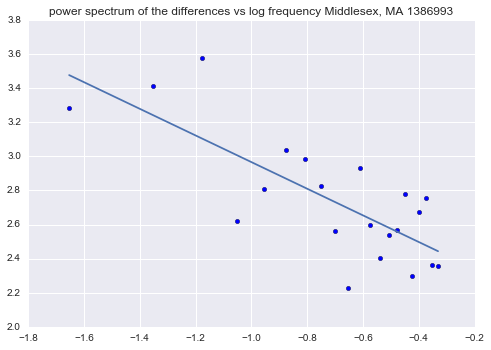

45 45
-0.760749037432 2.58932559718 0.657387754261


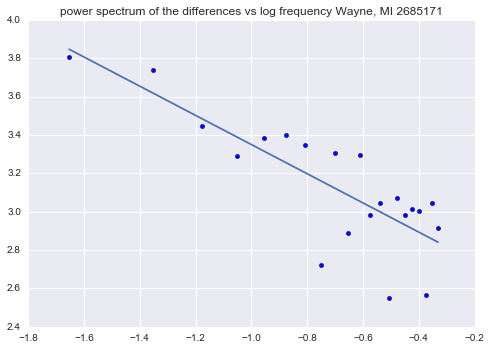

45 45
-0.92978644771 2.42482336061 0.717963323455


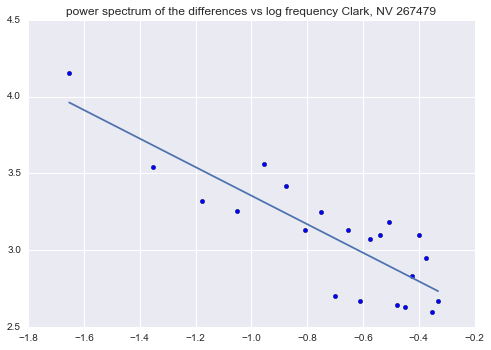

45 45
-1.0687296623 2.38584718163 0.596137804682


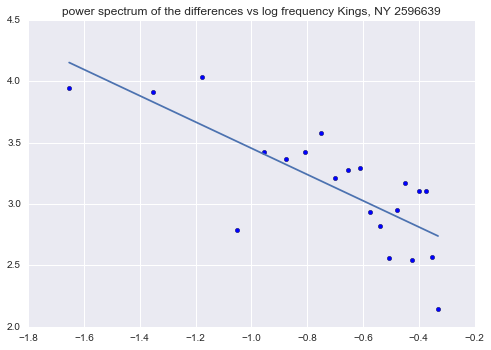

45 45
-0.453012153324 2.59801673068 0.158035169857


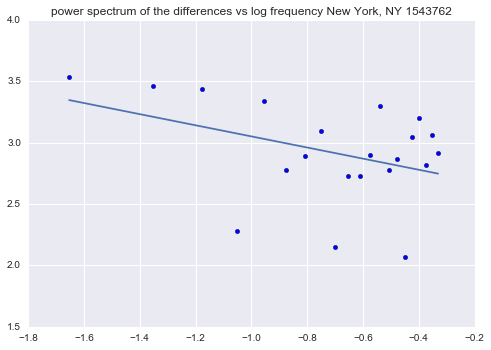

45 45
-1.16183086589 1.99240481558 0.506410813664


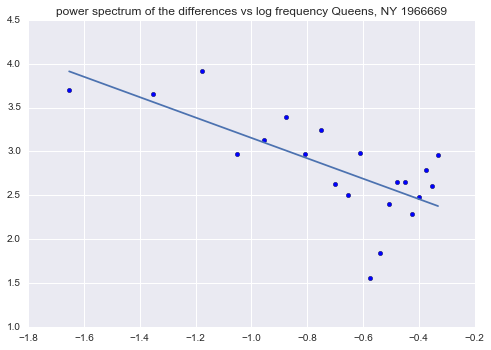

45 45
-0.384309211972 2.70400011334 0.313851982232


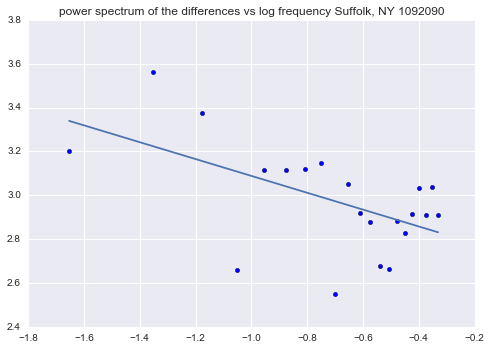

45 45
-1.01606120128 2.1736570738 0.639758053498


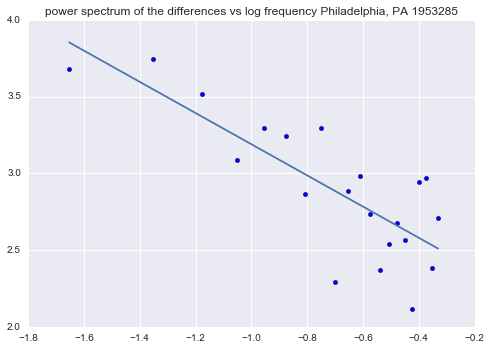

45 45
-0.787231078921 2.37434357772 0.599348497602


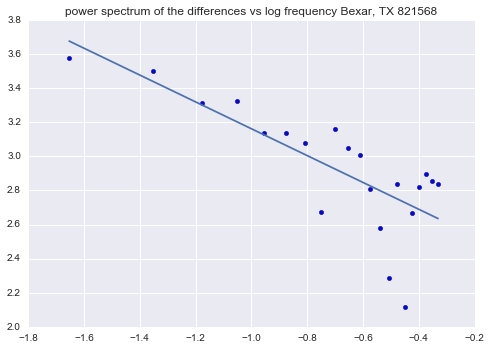

45 45
-0.509439101556 2.75885877656 0.374224099711


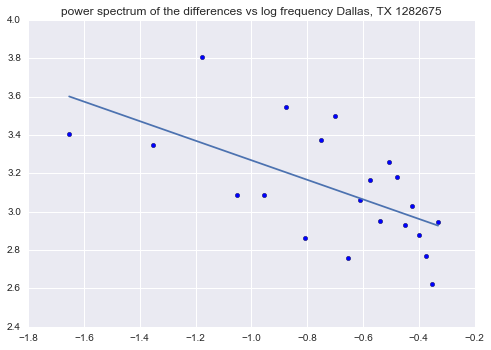

45 45
-0.586557450632 3.14579662317 0.648016842765


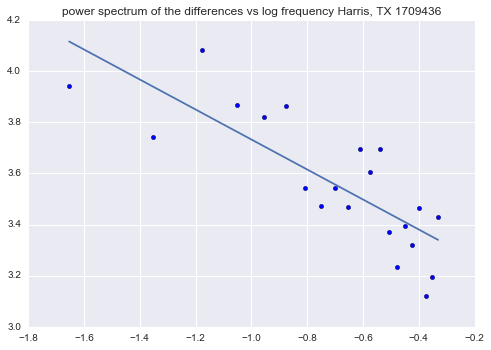

45 45
-0.770069319015 2.37121085242 0.558703360732


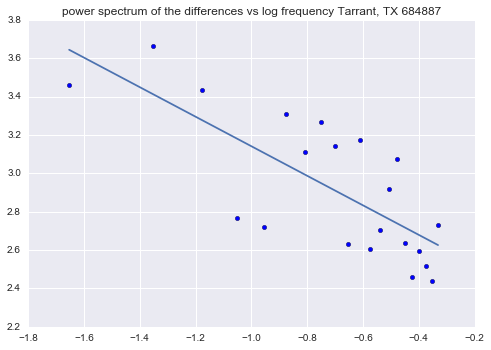

45 45
-0.968191910257 2.27569396098 0.605650657329


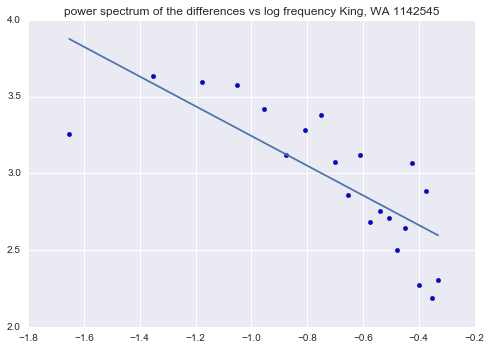

In [20]:
from scipy import stats
county=178
central=[]
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
print a[229][1]
for i in range(1,np.size(np.array(a).T[1,:]) ):
    
    #print i
    c= np.array([x for x in a[i][7:-2] if x!='(NA)' ] , dtype=np.int) #####key formatting thingy
    if (c[-2]>1500000):
        diffs=diff((np.array(c, dtype=np.int)))
        n=len(diffs)
        dt=1
        fft_x = fft(diffs) / n # FFT Normalized
        print np.size(fft_x),np.size(diffs)
        freq = fftfreq(n, dt) # Recuperamos las frecuencias
        fft_x_shifted = np.fft.fftshift(fft_x)
    #print np.int((np.size(corr)-1)/2.0),np.size(corr),np.size(abs(fft_x_shifted))
        freq_shifted = np.fft.fftshift(freq)
        x=log10(freq_shifted[(np.floor(np.size(freq_shifted)-1)/2.0)+1:-1])
        y=log10(abs(fft_x_shifted)[(np.floor(np.size(freq_shifted)-1)/2.0)+1:-1])
        plt.scatter(x,y)
    #plt.plot(freq_shifted[(np.floor(np.size(freq_shifted)-1)/2.0):-1],np.log10(abs(fft_x_shifted)[(np.floor(np.size(freq_shifted)-1)/2.0):-1]))
    #plt.plot(freq_shifted,np.real(fft_x_shifted))
    #plt.plot(freq_shifted,np.imag(fft_x_shifted))

        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        plot(x,x*slope+intercept)
        print slope, intercept, r_value**2
        plt.title('power spectrum of the differences vs log frequency '+a[i][1]+' '+str(c[0]))
        plt.show()

#real space correlation function


''' tk_image_slideshow3.py
create a Tkinter image repeating slide show
tested with Python27/33  by  vegaseat  03dec2013
'''
from itertools import cycle
try:
    # Python2
    import Tkinter as tk
except ImportError:
    # Python3
    import tkinter as tk
class App(tk.Tk):
    '''Tk window/label adjusts to size of image'''
    def __init__(self, image_files, x, y, delay):
        # the root will be self
        tk.Tk.__init__(self)
        # set x, y position only
        self.geometry('+{}+{}'.format(x, y))
        self.delay = delay
        # allows repeat cycling through the pictures
        # store as (img_object, img_name) tuple
        self.pictures = cycle((tk.PhotoImage(file=image), image)
                              for image in image_files)
        self.picture_display = tk.Label(self)
        self.picture_display.pack()
    def show_slides(self):
        '''cycle through the images and show them'''
        # next works with Python26 or higher
        img_object, img_name = next(self.pictures)
        self.picture_display.config(image=img_object)
        # shows the image filename, but could be expanded
        # to show an associated description of the image
        self.title(img_name)
        self.after(self.delay, self.show_slides)
    def run(self):
        self.mainloop()
# set milliseconds time between slides
delay = 350
# get a series of gif images you have in the working folder
# or use full path, or set directory to where the images are
image_files = [
'Slide_Farm.gif',
'Slide_House.gif',
'Slide_Sunset.gif',
'Slide_Pond.gif',
'Slide_Python.gif'
]
# upper left corner coordinates of app window
x = 100
y = 50
app = App(image_files, x, y, delay)
app.show_slides()
app.run()

idea para caracterizar y clasificar condados usando la media y la mediana para determinar la tendencia y el sesgo de las distribuciones de poblaciones.

Mirar fluctuaciones en las diferencias, claramente estan correlacionadas con la cantidad de gente en el condado.

intentar coarse graining temporal

intentar clasificar la distribucion de diferencias en poblaciones partiendo las muestras y viendo la ditribucion de maximos en ventanas de 10 años, comportamiento universal de los maximos?

otra idea.. hacer MLE para determinar la distribucion de pareto y el dominio de atraccion de la distribucion de maximos y la cola de las cumulativas, inspeccionar power law

no se pueden agrupar todos los condados de un estado por la presencia de ciudades grandes, se podrian agrupar datos por thresholds de densidad

In [21]:
county=178
central=[]
Cumdis=[]
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
means=[]
counties=[]
newest=[]
code=[]
indexcount=[]
for county in range(1,3136):
    
    c= [x for x in a[county][7:-2] if x!='(NA)' ]  #####key formatting thingy
    if(c[0]!='(NA)'):
        
        nearest=diff((np.array(c)).astype(int))
        central.append([np.median(nearest), np.mean(nearest)])
        means.append(np.mean((np.array(c)).astype(int)))
        newest.append(int(c[-1]))
        counties.append(a[county][1])
        code.append(a[county][0])
        indexcount.append(county)
        print county ,a[county][0],c[0], np.median(nearest), np.mean(nearest),a[county][1], np.size(nearest)
        

1 01001 25166 803.0 669.422222222 Autauga, AL 45
2 01003 56951 3111.0 3172.48888889 Baldwin, AL 45
3 01005 23818 25.0 66.6 Barbour, AL 45
4 01007 14994 200.0 167.888888889 Bibb, AL 45
5 01009 26411 682.0 694.377777778 Blount, AL 45
6 01011 12554 -40.0 -38.3333333333 Bullock, AL 45
7 01013 22726 -23.0 -54.4444444444 Butler, AL 45
8 01015 102946 359.0 289.933333333 Calhoun, AL 45
9 01017 37814 -101.0 -83.6 Chambers, AL 45
10 01019 15904 221.0 224.244444444 Cherokee, AL 45
11 01021 26594 396.0 385.044444444 Chilton, AL 45
12 01023 18432 -97.0 -114.288888889 Choctaw, AL 45
13 01025 28083 -100.0 -71.9111111111 Clarke, AL 45
14 01027 13075 30.0 10.2888888889 Clay, AL 45
15 01029 11115 75.0 87.9333333333 Cleburne, AL 45
16 01031 36137 305.0 326.533333333 Coffee, AL 45
17 01033 50891 29.0 79.7555555556 Colbert, AL 45
18 01035 16645 -98.0 -88.5111111111 Conecuh, AL 45
19 01037 11012 -2.0 -4.55555555556 Coosa, AL 45
20 01039 35074 66.0 62.5333333333 Covington, AL 45
21 01041 13866 4.0 1.82222222

301 08063 7447 23.0 8.13333333333 Kit Carson, CO 45
302 08065 8333 6.0 -21.4666666667 Lake, CO 45
303 08067 19451 799.0 764.422222222 La Plata, CO 45
304 08069 81438 5442.0 5404.86666667 Larimer, CO 45
305 08071 15667 5.0 -35.4666666667 Las Animas, CO 45
306 08073 4674 -8.0 18.5333333333 Lincoln, CO 45
307 08075 19331 32.0 58.2888888889 Logan, CO 45
308 08077 54219 2359.0 2081.57777778 Mesa, CO 45
309 08079 766 7.0 -1.57777777778 Mineral, CO 45
310 08081 6471 128.0 143.577777778 Moffat, CO 45
311 08083 12610 285.0 293.088888889 Montezuma, CO 45
312 08085 18538 636.0 495.422222222 Montrose, CO 45
313 08087 19463 154.0 195.177777778 Morgan, CO 45
314 08089 23114 -149.0 -104.088888889 Otero, CO 45
315 08091 1559 70.0 68.1333333333 Ouray, CO 45
316 08093 2126 193.0 314.088888889 Park, CO 45
317 08095 4171 -1.0 4.88888888889 Phillips, CO 45
318 08097 5876 274.0 260.511111111 Pitkin, CO 45
319 08099 12766 -56.0 -15.9333333333 Prowers, CO 45
320 08101 117657 940.0 980.044444444 Pueblo, CO 45


626 17015 19356 -132.0 -101.466666667 Carroll, IL 45
627 17017 14295 -29.0 -26.9555555556 Cass, IL 45
628 17019 160662 1399.0 1039.15555556 Champaign, IL 45
629 17021 36172 -59.0 -50.1111111111 Christian, IL 45
630 17023 16294 -17.0 -3.46666666667 Clark, IL 45
631 17025 14881 -34.0 -31.5111111111 Clay, IL 45
632 17027 27982 211.0 218.222222222 Clinton, IL 45
633 17029 47464 30.0 116.288888889 Coles, IL 45
634 17031 5473709 -11260.0 -5000.11111111 Cook, IL 45
635 17033 19946 -55.0 -12.6888888889 Crawford, IL 45
636 17035 9819 8.0 24.1555555556 Cumberland, IL 45
637 17037 69686 855.0 777.933333333 DeKalb, IL 45
638 17039 17003 -9.0 -16.8222222222 De Witt, IL 45
639 17041 19065 2.0 17.7555555556 Douglas, IL 45
640 17043 472417 11764.0 10252.2666667 DuPage, IL 45
641 17045 21752 -100.0 -87.8222222222 Edgar, IL 45
642 17047 7178 -23.0 -12.3777777778 Edwards, IL 45
643 17049 24537 150.0 217.422222222 Effingham, IL 45
644 17051 20936 37.0 23.4888888889 Fayette, IL 45
645 17053 16455 -43.0 -61

790 18139 20380 -89.0 -78.8 Rush, IN 45
791 18141 244521 549.0 514.622222222 St. Joseph, IN 45
792 18143 16922 100.0 150.133333333 Scott, IN 45
793 18145 37474 103.0 156.822222222 Shelby, IN 45
794 18147 17050 66.0 84.0222222222 Spencer, IN 45
795 18149 19171 14.0 85.9111111111 Starke, IN 45
796 18151 19892 349.0 322.533333333 Steuben, IN 45
797 18153 20094 -3.0 20.2 Sullivan, IN 45
798 18155 6385 116.0 91.2222222222 Switzerland, IN 45
799 18157 107325 1692.0 1696.55555556 Tippecanoe, IN 45
800 18159 16595 -28.0 -25.9111111111 Tipton, IN 45
801 18161 6578 25.0 14.3777777778 Union, IN 45
802 18163 168667 387.0 294.466666667 Vanderburgh, IN 45
803 18165 16856 -43.0 -25.8222222222 Vermillion, IN 45
804 18167 114885 -208.0 -148.533333333 Vigo, IN 45
805 18169 35304 -84.0 -67.1555555556 Wabash, IN 45
806 18171 8699 -8.0 -8.2 Warren, IN 45
807 18173 27576 681.0 748.688888889 Warrick, IN 45
808 18175 19160 183.0 194.311111111 Washington, IN 45
809 18177 78695 -277.0 -249.955555556 Wayne, IN 4

988 20153 4465 -44.0 -42.4444444444 Rawlins, KS 45
989 20155 60670 44.0 69.1333333333 Reno, KS 45
990 20157 8591 -79.0 -84.8444444444 Republic, KS 45
991 20159 12451 -48.0 -54.2888888889 Rice, KS 45
992 20161 51615 533.0 512.444444444 Riley, KS 45
993 20163 7738 -47.0 -57.0444444444 Rooks, KS 45
994 20165 5234 -50.0 -45.4888888889 Rush, KS 45
995 20167 9622 -27.0 -58.2444444444 Russell, KS 45
996 20169 46179 183.0 210.466666667 Saline, KS 45
997 20171 5602 -33.0 -13.9111111111 Scott, KS 45
998 20173 350792 3456.0 3522.26666667 Sedgwick, KS 45
999 20175 15741 163.0 167.888888889 Seward, KS 45
1000 20177 154234 572.0 540.066666667 Shawnee, KS 45
1001 20179 3925 -30.0 -30.7555555556 Sheridan, KS 45
1002 20181 7729 -29.0 -37.0222222222 Sherman, KS 45
1003 20183 6841 -65.0 -68.9333333333 Smith, KS 45
1004 20185 6078 -38.0 -39.6 Stafford, KS 45
1005 20187 2271 -7.0 -3.2 Stanton, KS 45
1006 20189 4225 34.0 36.0 Stevens, KS 45
1007 20191 23566 -22.0 -1.51111111111 Sumner, KS 45
1008 20193 7420

1167 22061 33528 302.0 308.911111111 Lincoln, LA 45
1168 22063 35919 2219.0 2217.73333333 Livingston, LA 45
1169 22065 15198 -127.0 -75.6666666667 Madison, LA 45
1170 22067 32507 -164.0 -128.066666667 Morehouse, LA 45
1171 22069 35151 97.0 90.9111111111 Natchitoches, LA 45
1172 22071 600566 -290.0 -4804.57777778 Orleans, LA 45
1173 22073 114301 788.0 929.777777778 Ouachita, LA 45
1174 22075 25297 98.0 -42.7111111111 Plaquemines, LA 45
1175 22077 22027 -48.0 6.62222222222 Pointe Coupee, LA 45
1176 22079 117764 310.0 325.6 Rapides, LA 45
1177 22081 9261 -31.0 -13.3333333333 Red River, LA 45
1178 22083 21848 1.0 -25.8666666667 Richland, LA 45
1179 22085 18693 75.0 120.511111111 Sabine, LA 45
1180 22087 49375 769.0 -109.177777778 St. Bernard, LA 45
1181 22089 29033 591.0 528.866666667 St. Charles, LA 45
1182 22091 9837 8.0 17.6 St. Helena, LA 45
1183 22093 19647 41.0 42.6888888889 St. James, LA 45
1184 22095 23469 329.0 451.2 St. John the Baptist, LA 45
1185 22097 80284 229.0 78.2 St. Land

1351 27027 42270 259.0 422.466666667 Clay, MN 45
1352 27029 7959 8.0 18.6 Clearwater, MN 45
1353 27031 3167 32.0 45.6888888889 Cook, MN 45
1354 27033 14376 -48.0 -61.9333333333 Cottonwood, MN 45
1355 27035 33692 698.0 656.177777778 Crow Wing, MN 45
1356 27037 128666 5754.0 6300.35555556 Dakota, MN 45
1357 27039 13540 185.0 151.266666667 Dodge, MN 45
1358 27041 22514 346.0 317.422222222 Douglas, MN 45
1359 27043 21186 -153.0 -156.222222222 Faribault, MN 45
1360 27045 21864 -40.0 -23.3777777778 Fillmore, MN 45
1361 27047 37365 -111.0 -146.133333333 Freeborn, MN 45
1362 27049 34579 243.0 262.133333333 Goodhue, MN 45
1363 27051 7643 -26.0 -37.2 Grant, MN 45
1364 27053 967826 7529.0 5428.24444444 Hennepin, MN 45
1365 27055 17634 5.0 24.6444444444 Houston, MN 45
1366 27057 10298 255.0 228.622222222 Hubbard, MN 45
1367 27059 18333 407.0 445.8 Isanti, MN 45
1368 27061 35853 117.0 214.733333333 Itasca, MN 45
1369 27063 13994 -98.0 -83.2666666667 Jackson, MN 45
1370 27065 10020 136.0 131.5333333

1551 29089 10726 -9.0 -13.0 Howard, MO 45
1552 29091 23690 324.0 365.022222222 Howell, MO 45
1553 29093 9526 16.0 15.8666666667 Iron, MO 45
1554 29095 652604 1492.0 690.644444444 Jackson, MO 45
1555 29097 80799 982.0 817.044444444 Jasper, MO 45
1556 29099 103123 2461.0 2656.02222222 Jefferson, MO 45
1557 29101 33777 482.0 458.511111111 Johnson, MO 45
1558 29103 5860 -26.0 -41.4222222222 Knox, MO 45
1559 29105 20019 345.0 343.377777778 Laclede, MO 45
1560 29107 26877 128.0 128.755555556 Lafayette, MO 45
1561 29109 24849 329.0 292.822222222 Lawrence, MO 45
1562 29111 11102 -12.0 -21.6888888889 Lewis, MO 45
1563 29113 18013 735.0 805.4 Lincoln, MO 45
1564 29115 15540 -105.0 -71.4222222222 Linn, MO 45
1565 29117 15667 -14.0 -12.7777777778 Livingston, MO 45
1566 29119 12433 225.0 230.2 McDonald, MO 45
1567 29121 15783 -21.0 -6.97777777778 Macon, MO 45
1568 29123 8841 72.0 78.7555555556 Madison, MO 45
1569 29125 6906 46.0 46.6666666667 Maries, MO 45
1570 29127 28337 21.0 11.9555555556 Marion

1759 31163 4757 -36.0 -37.4444444444 Sherman, NE 45
1760 31165 2086 -5.0 -17.2666666667 Sioux, NE 45
1761 31167 6345 -11.0 -5.86666666667 Stanton, NE 45
1762 31169 7967 -48.0 -60.8666666667 Thayer, NE 45
1763 31171 905 -7.0 -4.84444444444 Thomas, NE 45
1764 31173 7010 -26.0 -1.08888888889 Thurston, NE 45
1765 31175 5899 -35.0 -37.5111111111 Valley, NE 45
1766 31177 13038 147.0 160.6 Washington, NE 45
1767 31179 10488 -25.0 -24.3777777778 Wayne, NE 45
1768 31181 5451 -37.0 -39.6222222222 Webster, NE 45
1769 31183 1067 -6.0 -6.71111111111 Wheeler, NE 45
1770 31185 13403 24.0 11.2444444444 York, NE 45
1771 32001 10498 282.0 301.066666667 Churchill, NV 45
1772 32003 267479 30988.0 40037.0444444 Clark, NV 45
1773 32005 6674 1024.0 907.666666667 Douglas, NV 45
1774 32007 13979 811.0 861.155555556 Elko, NV 45
1775 32009 585 -1.0 5.33333333333 Esmeralda, NV 45
1776 32011 931 24.0 23.5111111111 Eureka, NV 45
1777 32013 6452 282.0 239.466666667 Humboldt, NV 45
1778 32015 2648 69.0 74.2 Lander, N

2052 38077 18237 -64.0 -40.9111111111 Richland, ND 45
2053 38079 11499 54.0 70.5333333333 Rolette, ND 45
2054 38081 6049 -70.0 -47.2666666667 Sargent, ND 45
2055 38083 3325 -40.0 -44.4888888889 Sheridan, ND 45
2056 38085 3653 19.0 18.0666666667 Sioux, ND 45
2057 38087 1514 -12.0 -16.6 Slope, ND 45
2058 38089 19611 108.0 241.755555556 Stark, ND 45
2059 38091 3854 -39.0 -42.2444444444 Steele, ND 45
2060 38093 23814 -60.0 -58.6666666667 Stutsman, ND 45
2061 38095 4746 -70.0 -54.4 Towner, ND 45
2062 38097 9714 -35.0 -36.6888888889 Traill, ND 45
2063 38099 16491 -138.0 -122.933333333 Walsh, ND 45
2064 38101 57559 112.0 266.155555556 Ward, ND 45
2065 38103 8005 -73.0 -84.9111111111 Wells, ND 45
2066 38105 19599 -8.0 278.444444444 Williams, ND 45
2067 39001 18895 205.0 205.088888889 Adams, OH 45
2068 39003 110340 -113.0 -117.6 Allen, OH 45
2069 39005 42746 183.0 229.755555556 Ashland, OH 45
2070 39007 97679 -19.0 32.4222222222 Ashtabula, OH 45
2071 39009 49183 241.0 345.311111111 Athens, OH 4

2217 40125 42350 675.0 654.488888889 Pottawatomie, OK 45
2218 40127 9682 25.0 32.1333333333 Pushmataha, OK 45
2219 40129 4884 -35.0 -24.6222222222 Roger Mills, OK 45
2220 40131 25902 1589.0 1421.33333333 Rogers, OK 45
2221 40133 26223 25.0 -17.7777777778 Seminole, OK 45
2222 40135 22318 383.0 422.955555556 Sequoyah, OK 45
2223 40137 36975 238.0 167.244444444 Stephens, OK 45
2224 40139 15889 87.0 130.4 Texas, OK 45
2225 40141 13187 -123.0 -123.866666667 Tillman, OK 45
2226 40143 396522 5207.0 5197.91111111 Tulsa, OK 45
2227 40145 21374 1173.0 1205.28888889 Wagoner, OK 45
2228 40147 41620 166.0 229.933333333 Washington, OK 45
2229 40149 12826 12.0 -27.9111111111 Washita, OK 45
2230 40151 12249 -30.0 -66.3333333333 Woods, OK 45
2231 40153 15188 101.0 139.933333333 Woodward, OK 45
2232 41001 15219 -41.0 19.1777777778 Baker, OR 45
2233 41003 51491 650.0 776.066666667 Benton, OR 45
2234 41005 156015 5151.0 5299.75555556 Clackamas, OR 45
2235 41007 27905 215.0 211.555555556 Clatsop, OR 45
223

2388 46007 3121 -3.0 6.91111111111 Bennett, SD 45
2389 46009 8658 -28.0 -36.6666666667 Bon Homme, SD 45
2390 46011 22155 237.0 249.755555556 Brookings, SD 45
2391 46013 36507 45.0 46.5555555556 Brown, SD 45
2392 46015 5857 -13.0 -11.7333333333 Brule, SD 45
2393 46017 1768 11.0 7.02222222222 Buffalo, SD 45
2394 46019 7830 47.0 55.0444444444 Butte, SD 45
2395 46021 2899 -34.0 -33.8666666667 Campbell, SD 45
2396 46023 10286 -21.0 -23.0666666667 Charles Mix, SD 45
2397 46025 5652 -40.0 -44.2222222222 Clark, SD 45
2398 46027 13202 41.0 17.5333333333 Clay, SD 45
2399 46029 18992 169.0 199.288888889 Codington, SD 45
2400 46031 5109 -20.0 -20.3111111111 Corson, SD 45
2401 46033 4644 80.0 84.4666666667 Custer, SD 45
2402 46035 17202 55.0 59.0888888889 Davison, SD 45
2403 46037 8934 -78.0 -75.0222222222 Day, SD 45
2404 46039 5744 -20.0 -31.6444444444 Deuel, SD 45
2405 46041 5160 14.0 11.4888888889 Dewey, SD 45
2406 46043 4560 -31.0 -35.8222222222 Douglas, SD 45
2407 46045 5557 -23.0 -35.06666666

2706 48319 3567 17.0 11.2444444444 Mason, TX 45
2707 48321 29242 -1.0 160.6 Matagorda, TX 45
2708 48323 19022 851.0 848.133333333 Maverick, TX 45
2709 48325 19416 554.0 632.444444444 Medina, TX 45
2710 48327 2755 -12.0 -13.4444444444 Menard, TX 45
2711 48329 63268 1805.0 2060.48888889 Midland, TX 45
2712 48331 19649 119.0 102.333333333 Milam, TX 45
2713 48333 4058 17.0 18.4 Mills, TX 45
2714 48335 9482 -34.0 -8.91111111111 Mitchell, TX 45
2715 48337 14583 67.0 107.666666667 Montague, TX 45
2716 48339 50004 10563.0 10423.3333333 Montgomery, TX 45
2717 48341 13192 193.0 202.244444444 Moore, TX 45
2718 48343 11785 0.0 20.1333333333 Morris, TX 45
2719 48345 2120 -22.0 -21.4888888889 Motley, TX 45
2720 48347 34715 655.0 679.022222222 Nacogdoches, TX 45
2721 48349 30727 351.0 384.6 Navarro, TX 45
2722 48351 11244 51.0 64.4888888889 Newton, TX 45
2723 48353 15858 -22.0 -16.7333333333 Nolan, TX 45
2724 48355 239376 2903.0 2602.62222222 Nueces, TX 45
2725 48357 9982 21.0 16.4 Ochiltree, TX 45
2

2901 51147 14404 165.0 191.6 Prince Edward, VA 45
2902 51155 29608 17.0 104.533333333 Pulaski, VA 45
2903 51157 5201 39.0 47.9777777778 Rappahannock, VA 45
2904 51159 6502 68.0 52.6444444444 Richmond, VA 45
2905 51167 24807 25.0 71.2222222222 Russell, VA 45
2906 51169 24607 -59.0 -49.9333333333 Scott, VA 45
2907 51171 22906 340.0 444.6 Shenandoah, VA 45
2908 51173 31509 -63.0 1.4 Smyth, VA 45
2909 51179 24107 2417.0 2576.44444444 Stafford, VA 45
2910 51181 5902 11.0 20.0444444444 Surry, VA 45
2911 51183 11603 -40.0 3.55555555556 Sussex, VA 45
2912 51185 40411 -25.0 67.2222222222 Tazewell, VA 45
2913 51187 15304 574.0 527.2 Warren, VA 45
2914 51193 12103 110.0 119.088888889 Westmoreland, VA 45
2915 51197 22306 122.0 150.088888889 Wythe, VA 45
2916 51510 110100 923.0 918.666666667 Alexandria (Independent City), VA 45
2917 51550 87641 2964.0 3240.84444444 Chesapeake (Independent City), VA 45
2918 51650 118900 516.0 420.288888889 Hampton (Independent City), VA 45
2919 51700 140100 1003.0 9

3073 55061 19211 37.0 26.6888888889 Kewaunee, WI 45
3074 55063 80177 804.0 837.222222222 La Crosse, WI 45
3075 55065 17947 6.0 -24.9111111111 Lafayette, WI 45
3076 55067 19817 -37.0 -9.95555555556 Langlade, WI 45
3077 55069 23816 30.0 96.3555555556 Lincoln, WI 45
3078 55071 82443 -99.0 -50.7111111111 Manitowoc, WI 45
3079 55073 96774 889.0 863.222222222 Marathon, WI 45
3080 55075 35695 115.0 122.911111111 Marinette, WI 45
3081 55077 8841 153.0 137.0 Marquette, WI 45
3082 55078 3861 10.0 26.84 Menominee, WI* 25
3083 55079 1056587 -1380.0 -2192.75555556 Milwaukee, WI 45
3084 55081 32130 337.0 293.911111111 Monroe, WI 45
3085 55083 25852 209.0 258.8 Oconto, WI 45
3086 55085 24304 262.0 248.622222222 Oneida, WI 45
3087 55087 116606 1476.0 1452.73333333 Outagamie, WI 45
3088 55089 52505 663.0 779.133333333 Ozaukee, WI 45
3089 55091 7477 -15.0 -2.75555555556 Pepin, WI 45
3090 55093 26277 343.0 325.4 Pierce, WI 45
3091 55095 27111 430.0 363.644444444 Polk, WI 45
3092 55097 45662 436.0 551.955

In [22]:
def find_first(item, vec):
	"""return the index of the first occurence of item in vec"""
	for i in range(np.size(vec)):
		if vec[i]== item:
			return i
	return -1

a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
#a=filter(lambda l: l != '(NA)', a)
print ['100000000' for x in a if x=='(NA)' ]
lag=46
for i in range(2,3138):
    c= [x for x in a[i][7:-2] if x!='(NA)' ]
    dats=(np.array(c)).astype(int)
    b=dats
    ubound=11000000 ##to avoid overflow values

    print np.size(b)
    for j in range(np.size(dats)):
        if (dats[j]>ubound):
            b=np.delete(b,find_first(dats[j], b))
            print np.size(b)

[]
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
9
27
27
46
36
46
24
36
46
36
7
46
36
46
46
46
24
46
46
36
46
6
6
30
36
7
14
15
36
36
6
30
22
36
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
46
46
46
46
46
46
32
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
13
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
4

dats


# These are the largest 400 counties on which we'll probably focus

In [23]:


top=[countiesS for (meansS,countiesS) in sorted(zip(means,counties))]
top=top[::-1]
top[:400]


['Los Angeles, CA',
 'Cook, IL',
 'Harris, TX',
 'Maricopa, AZ',
 'Kings, NY',
 'Orange, CA',
 'San Diego, CA',
 'Wayne, MI',
 'Queens, NY',
 'Miami-Dade, FL',
 'Dallas, TX',
 'Philadelphia, PA',
 'King, WA',
 'New York, NY',
 'Santa Clara, CA',
 'Cuyahoga, OH',
 'Middlesex, MA',
 'San Bernardino, CA',
 'Allegheny, PA',
 'Suffolk, NY',
 'Nassau, NY',
 'Broward, FL',
 'Bronx, NY',
 'Alameda, CA',
 'Bexar, TX',
 'Riverside, CA',
 'Tarrant, TX',
 'Oakland, MI',
 'Sacramento, CA',
 'Hennepin, MN',
 'Clark, NV',
 'Franklin, OH',
 'St. Louis, MO',
 'Erie, NY',
 'Milwaukee, WI',
 'Westchester, NY',
 'Palm Beach, FL',
 'Hillsborough, FL',
 'Bergen, NJ',
 'Hamilton, OH',
 'Fairfield, CT',
 'Hartford, CT',
 'Fairfax, Fairfax City + Falls Church, VA*',
 'Shelby, TN',
 'Honolulu, HI',
 'Marion, IN',
 'Essex, NJ',
 'Contra Costa, CA',
 'Pinellas, FL',
 'New Haven, CT',
 'Salt Lake, UT',
 'DuPage, IL',
 'Montgomery, MD',
 "Prince George's, MD",
 'San Francisco, CA',
 'Macomb, MI',
 'Orange, FL',
 'B

In [24]:

top=[countiesS for (newestS,countiesS) in sorted(zip(newest,counties))]
top=top[::-1]
top[:400]

['Los Angeles, CA',
 'Cook, IL',
 'Harris, TX',
 'Maricopa, AZ',
 'San Diego, CA',
 'Orange, CA',
 'Miami-Dade, FL',
 'Kings, NY',
 'Dallas, TX',
 'Riverside, CA',
 'Queens, NY',
 'San Bernardino, CA',
 'King, WA',
 'Clark, NV',
 'Tarrant, TX',
 'Santa Clara, CA',
 'Broward, FL',
 'Bexar, TX',
 'Wayne, MI',
 'New York, NY',
 'Alameda, CA',
 'Middlesex, MA',
 'Philadelphia, PA',
 'Suffolk, NY',
 'Sacramento, CA',
 'Bronx, NY',
 'Palm Beach, FL',
 'Nassau, NY',
 'Hillsborough, FL',
 'Cuyahoga, OH',
 'Orange, FL',
 'Oakland, MI',
 'Franklin, OH',
 'Allegheny, PA',
 'Hennepin, MN',
 'Fairfax, Fairfax City + Falls Church, VA*',
 'Travis, TX',
 'Contra Costa, CA',
 'Salt Lake, UT',
 'Montgomery, MD',
 'Mecklenburg, NC',
 'Pima, AZ',
 'St. Louis, MO',
 'Wake, NC',
 'Fulton, GA',
 'Honolulu, HI',
 'Westchester, NY',
 'Fresno, CA',
 'Milwaukee, WI',
 'Fairfield, CT',
 'Shelby, TN',
 'Pinellas, FL',
 'Marion, IN',
 'DuPage, IL',
 'Bergen, NJ',
 'Erie, NY',
 "Prince George's, MD",
 'Duval, FL',
 

In [25]:
#50 is an arbitrary cuttoff
topCode=[codeS for (newestS,codeS) in sorted(zip(newest,code))]
topCode=topCode[::-1]
topCode=topCode[:50]
print topCode

topInd=[indexcountS for (newestS,indexcountS) in sorted(zip(newest,indexcount))]
topInd=topInd[::-1]
topInd=topInd[:50]
print topInd

['06037', '17031', '48201', '04013', '06073', '06059', '12086', '36047', '48113', '06065', '36081', '06071', '53033', '32003', '48439', '06085', '12011', '48029', '26163', '36061', '06001', '25017', '42101', '36103', '06067', '36005', '12099', '36059', '12057', '39035', '12095', '26125', '39049', '42003', '27053', '51919', '48453', '06013', '49035', '24031', '37119', '04019', '29189', '37183', '13121', '15003', '36119', '06019', '55079', '09001']
[229, 634, 2647, 128, 247, 240, 387, 1875, 2603, 243, 1892, 246, 2965, 1772, 2766, 253, 350, 2561, 1336, 1882, 211, 1249, 2318, 1903, 244, 1854, 394, 1881, 372, 2084, 392, 1317, 2091, 2269, 1364, 2932, 2773, 217, 2818, 1231, 1973, 131, 1602, 2005, 471, 572, 1911, 220, 3083, 333]


In [26]:
mig=list(csv.reader(open('county_migration_data.csv'), delimiter='\t'))


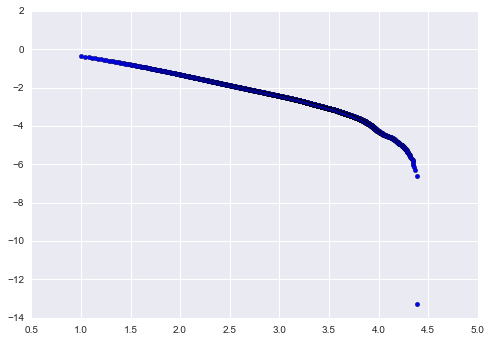

In [27]:
nearest=(array(mig[1:], dtype=np.int)[:,2:]).flatten()

bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))


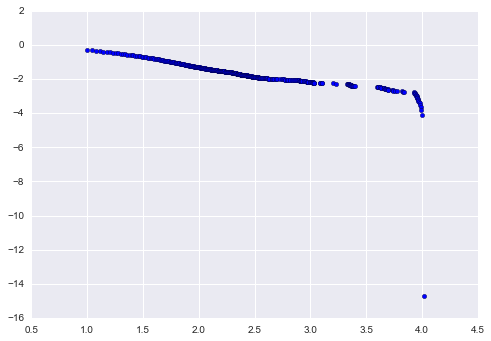

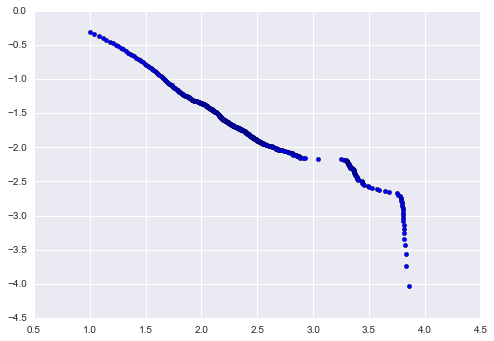

In [28]:
detroitIN=[]
for element in mig:
    if ((element[1])=='26163'):
        detroitIN.append(np.array(element,dtype=np.int))

        
detroitOUT=[]
for element in mig:
    if ((element[0])=='26163'):
        detroitOUT.append(np.array(element,dtype=np.int))
        
        
        
nearest=(array(detroitOUT, dtype=np.int)[:,2:]).flatten()

bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()

nearest=(array(detroitIN, dtype=np.int)[:,2:]).flatten()

bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()

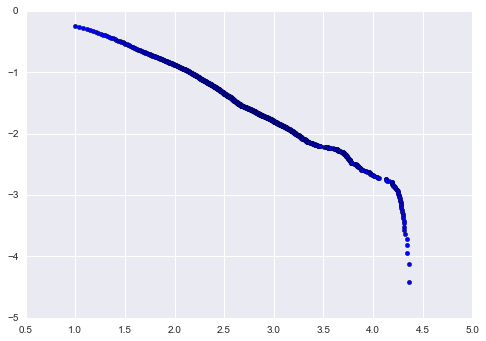

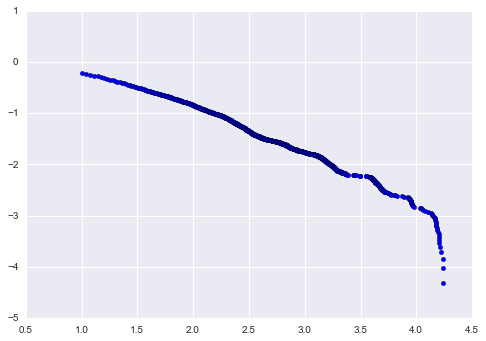

In [29]:
LaIN=[]
for element in mig:
    if ((element[1])=='06037'):
        LaIN.append(np.array(element,dtype=np.int))

        
LaOUT=[]
for element in mig:
    if ((element[0])=='06037'):
        LaOUT.append(np.array(element,dtype=np.int))
        
        
        
nearest=(array(LaOUT, dtype=np.int)[:,2:]).flatten()

bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()

nearest=(array(LaIN, dtype=np.int)[:,2:]).flatten()
#print size(nearest)
bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()


STD out  933.072750114 122.594521073


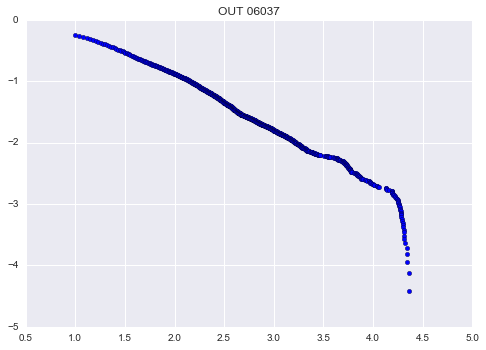

STD in  720.190232796 113.014519573


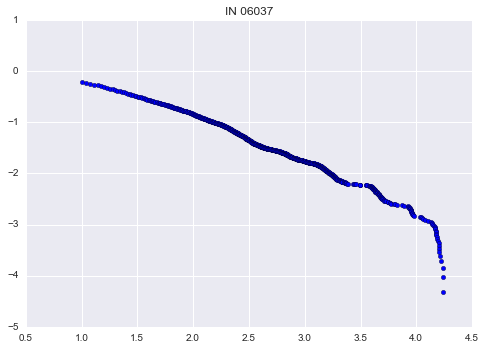

STD out  555.722702527 85.4051789474


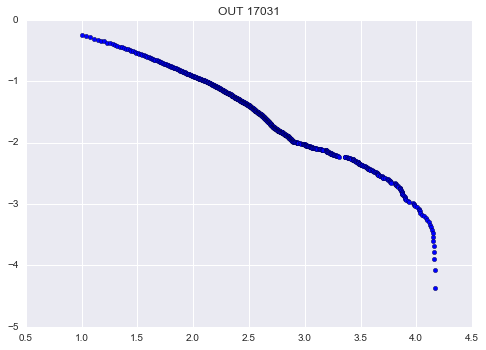

STD in  402.127214347 73.2662396204


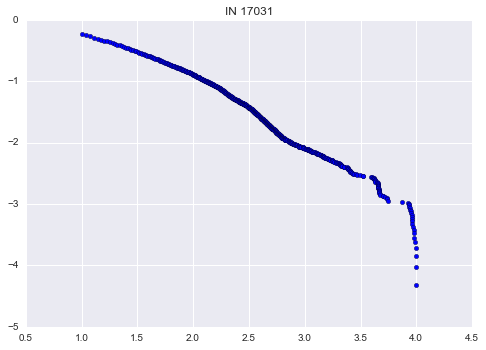

STD out  422.95170952 67.8212939841


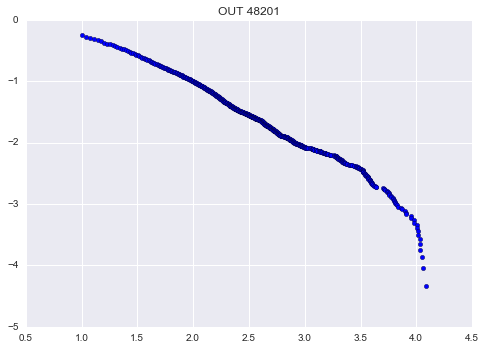

STD in  320.302215751 64.1257451404


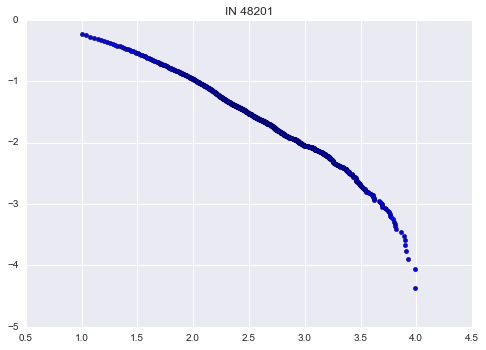

STD out  200.625193898 45.9406776379


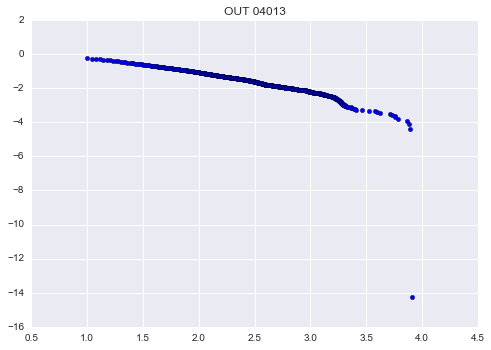

STD in  197.41871282 53.3536678201


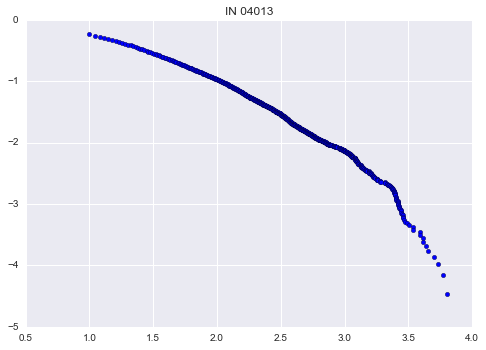

STD out  283.872840118 56.8271129707


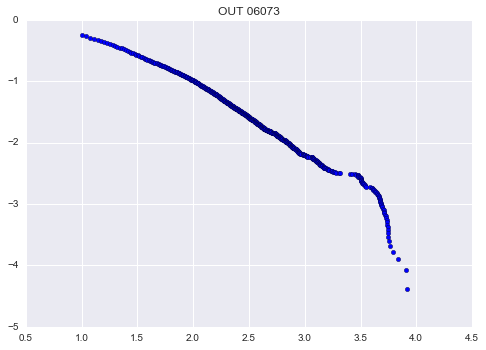

STD in  297.073653657 62.8179294118


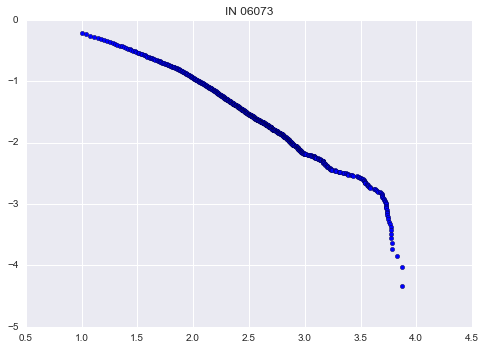

STD out  713.447696117 81.9524517088


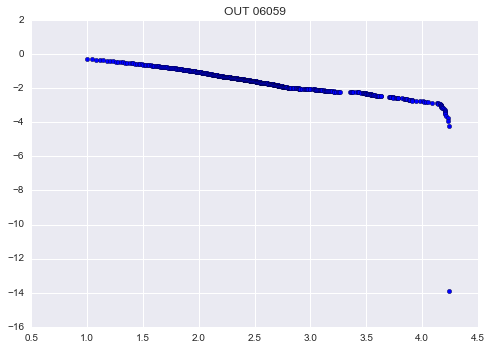

STD in  921.408665841 93.1552238806


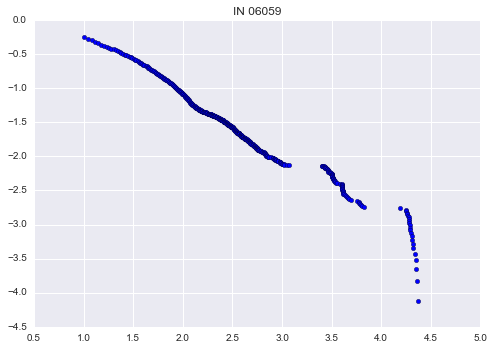

STD out  483.699420761 36.9054862119


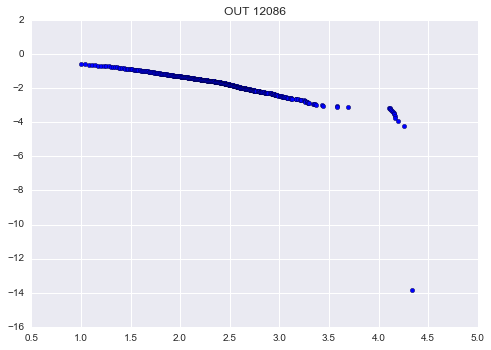

STD in  359.343720195 32.1205872757


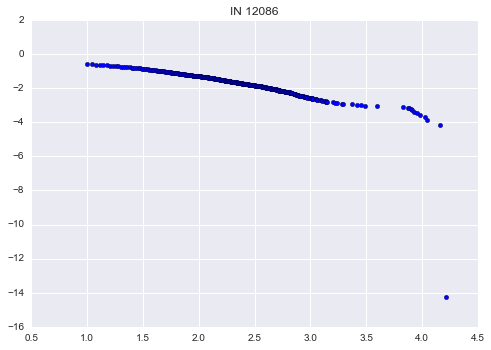

STD out  605.563448744 100.42973913


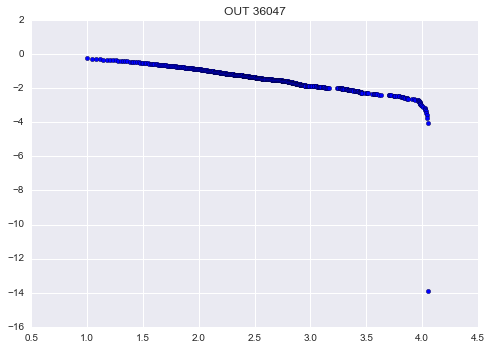

STD in  569.84708075 82.3609456265


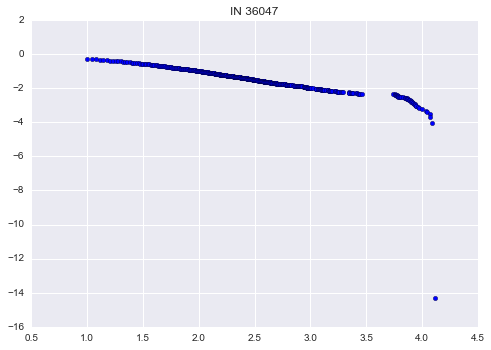

STD out  548.600496406 71.9583833116


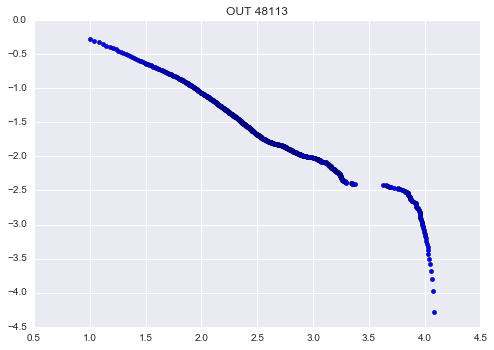

STD in  411.334266749 61.9762605549


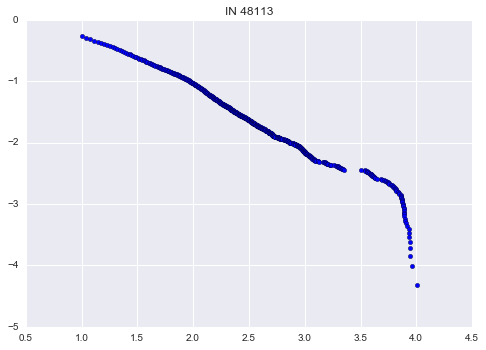

STD out  444.132210969 58.7235404896


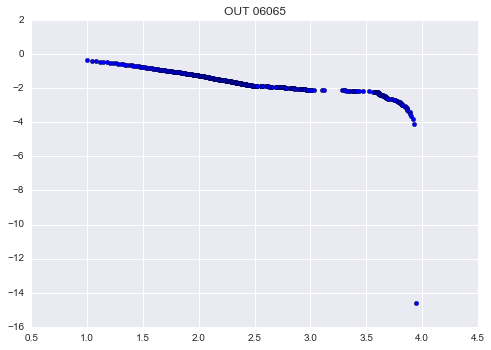

STD in  743.360450013 90.8771818182


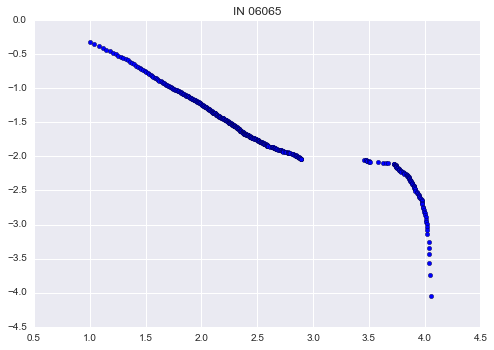

STD out  611.059692887 113.27755102


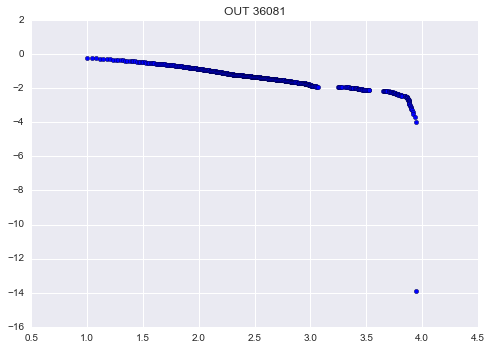

STD in  665.258628459 96.6494857143


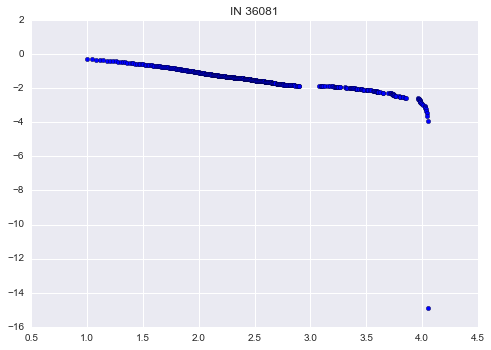

STD out  541.958973622 59.8172954925


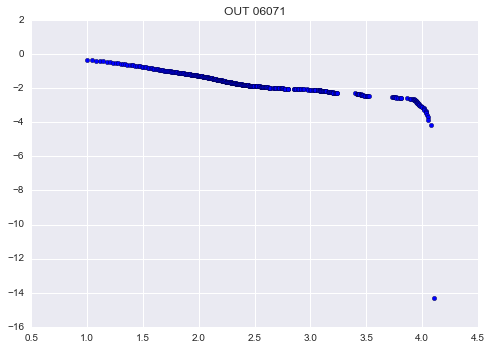

STD in  863.729972186 80.6671615721


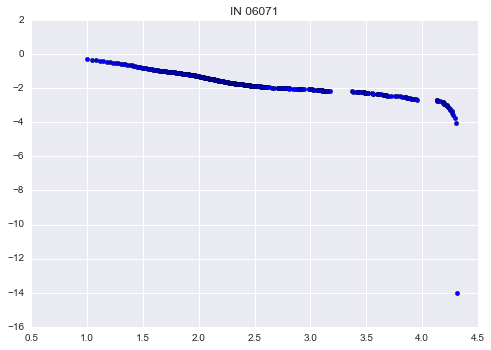

STD out  460.169603776 73.0544876325


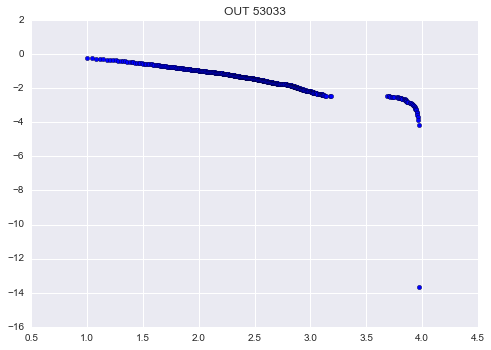

STD in  345.872696342 68.0730903328


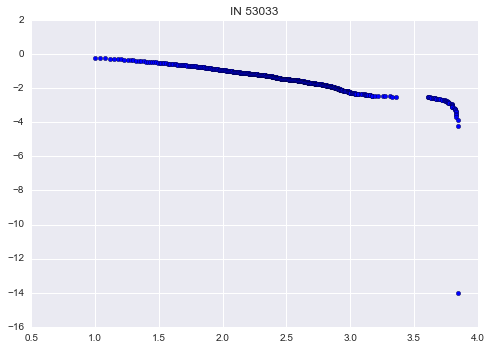

STD out  115.455968061 32.3636410923


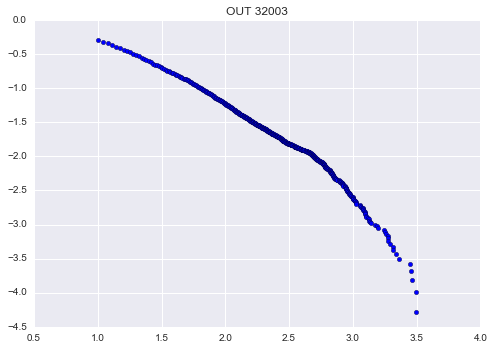

STD in  206.461185965 45.5543893591


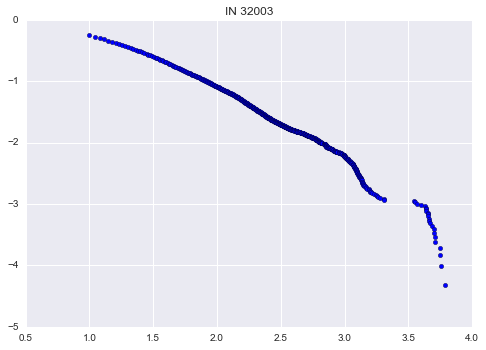

STD out  343.04570095 46.5996033994


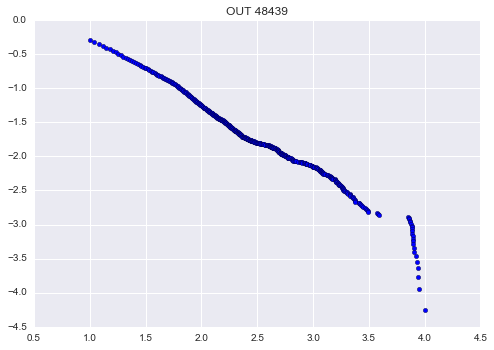

STD in  355.172312377 47.1837483617


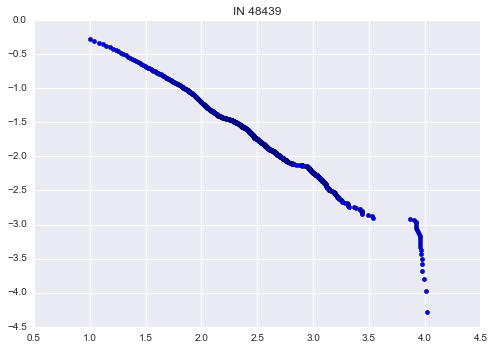

STD out  361.457086887 86.8942583732


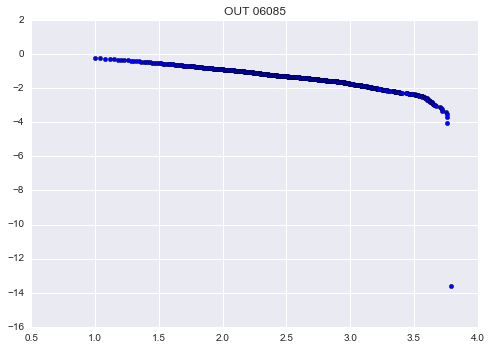

STD in  299.356783559 70.8949074074


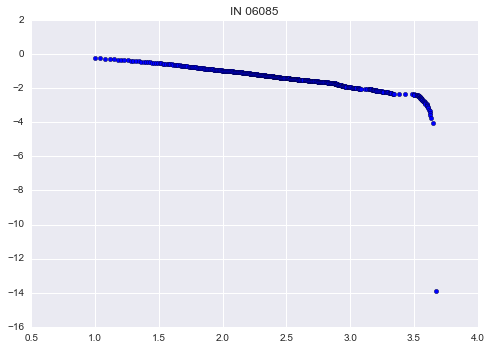

STD out  442.560271871 56.3544624448


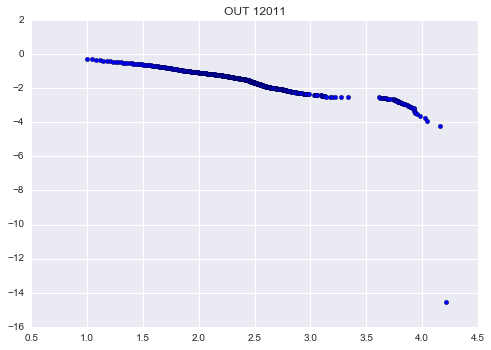

STD in  627.009064718 68.9597355372


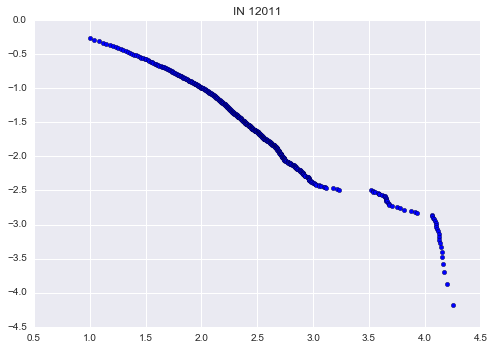

STD out  131.754403388 41.920071048


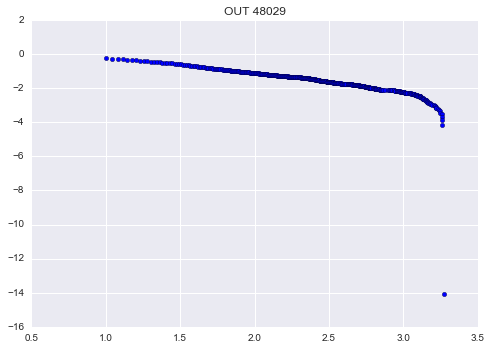

STD in  113.287914555 40.419125


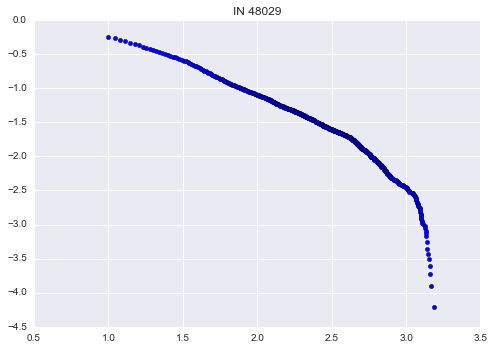

STD out  465.323116164 56.153220339


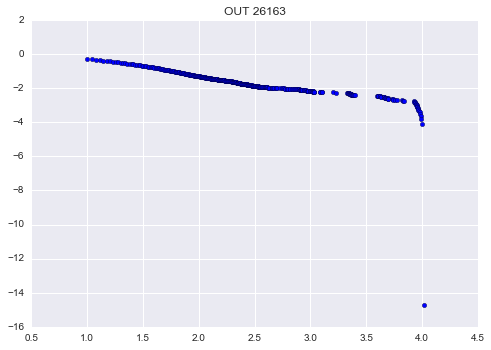

STD in  360.394678159 47.1031192661


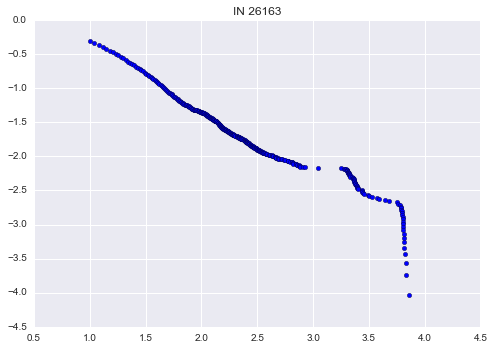

STD out  637.907629406 122.183492063


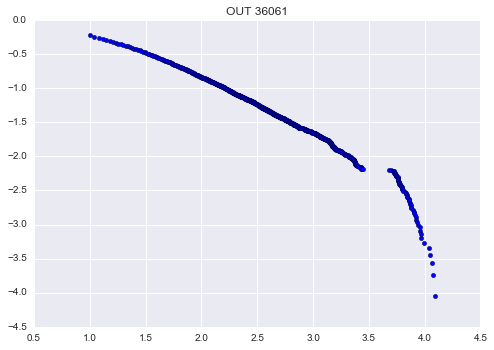

STD in  500.180149168 109.490556701


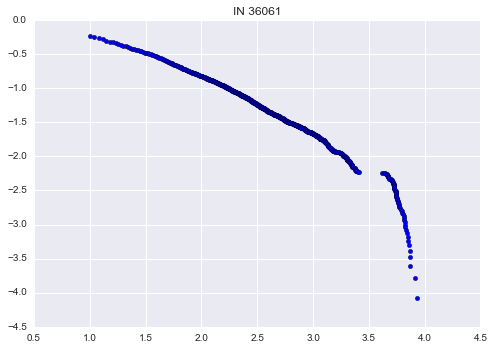

STD out  458.07168667 87.6217475728


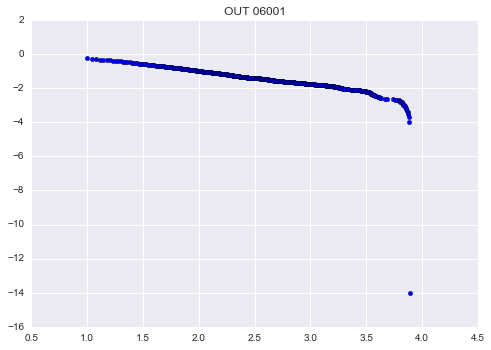

STD in  459.227302552 86.9307614213


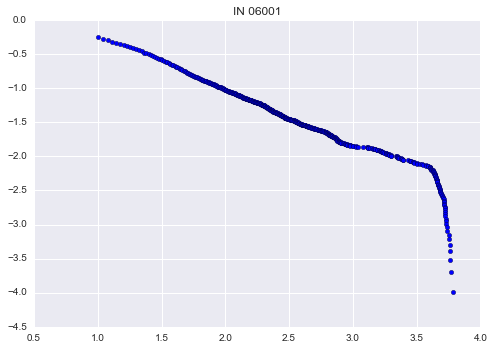

STD out  457.136321079 86.949266055


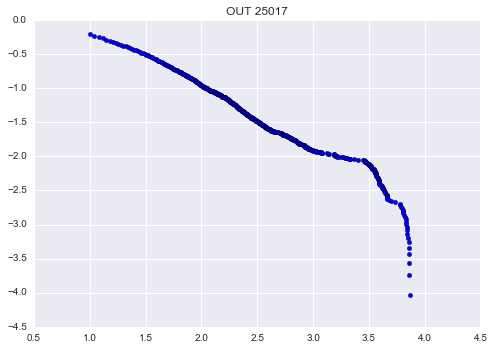

STD in  479.176415218 81.304


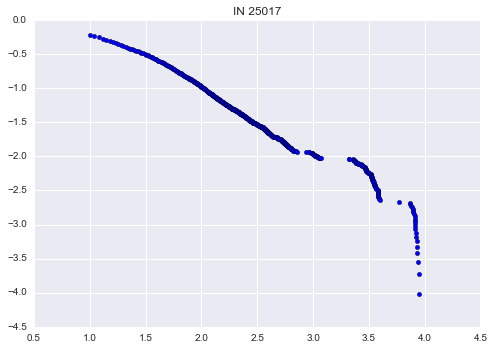

STD out  352.500765446 68.3725773196


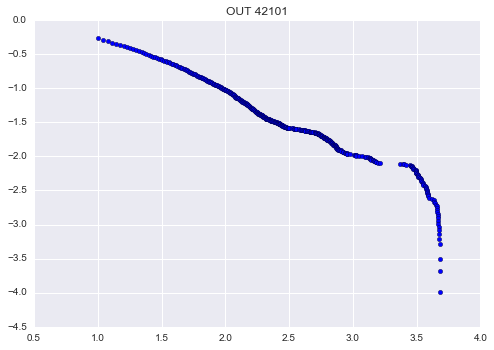

STD in  205.339331642 42.0740357853


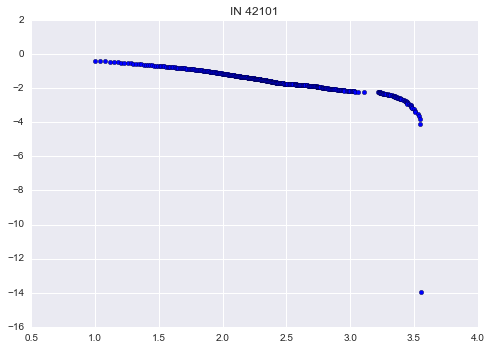

STD out  208.562144707 42.9201735358


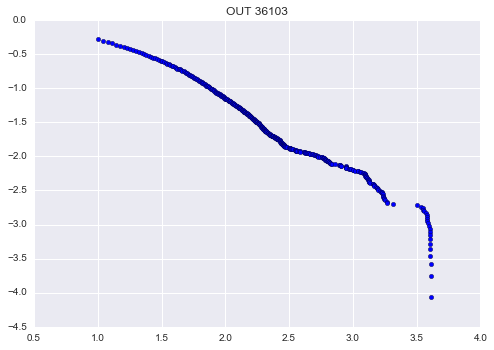

STD in  406.22386151 58.0593150685


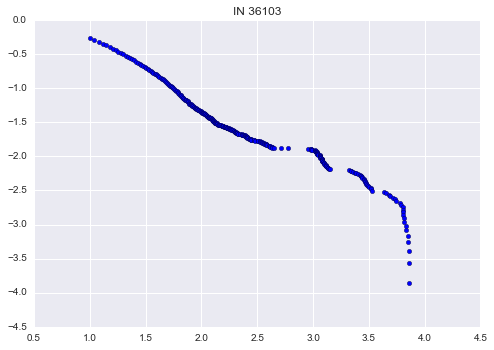

STD out  231.823142809 53.3615740741


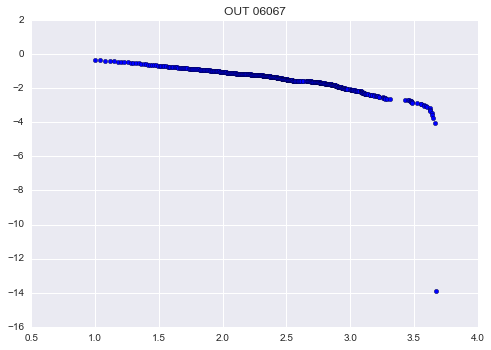

STD in  248.647607545 66.260704607


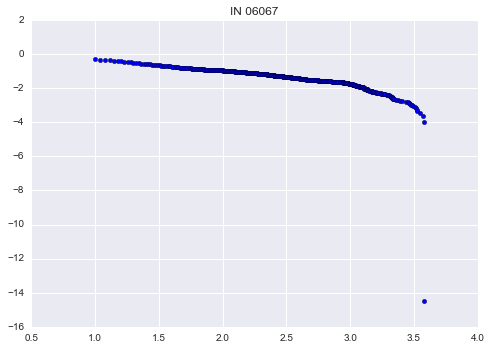

STD out  422.402874981 85.773105802


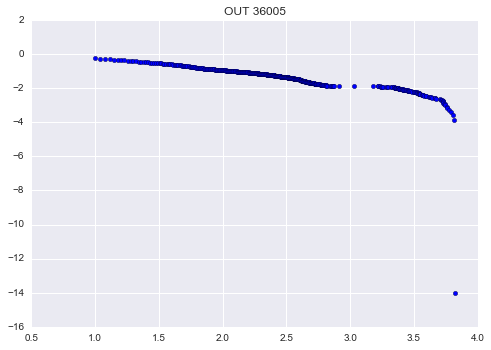

STD in  520.919355725 81.4982758621


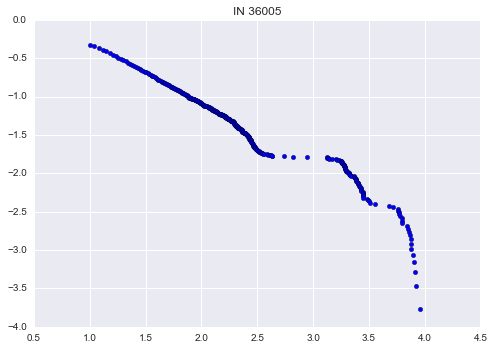

STD out  219.679001608 40.2495667244


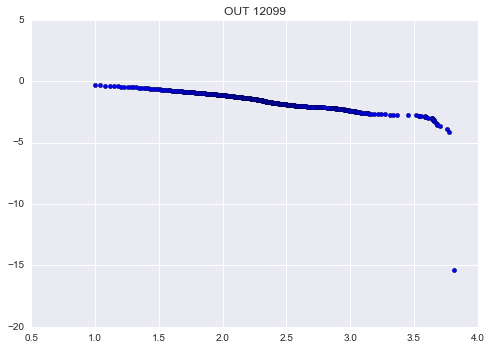

STD in  309.555840032 52.2859259259


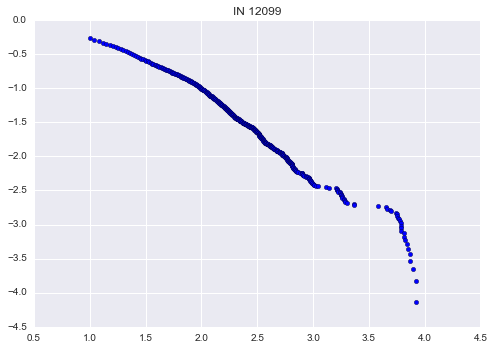

STD out  415.764826472 69.738879056


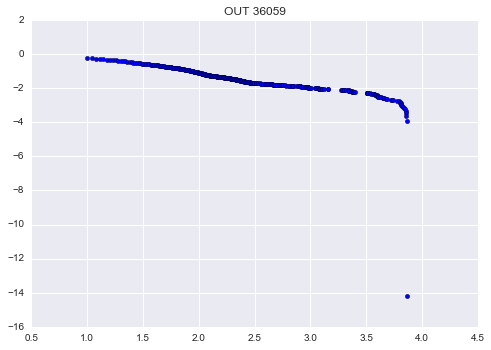

STD in  566.603025244 85.3488495575


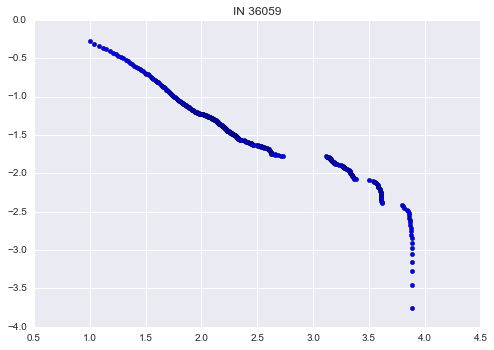

STD out  213.350263627 35.5848010974


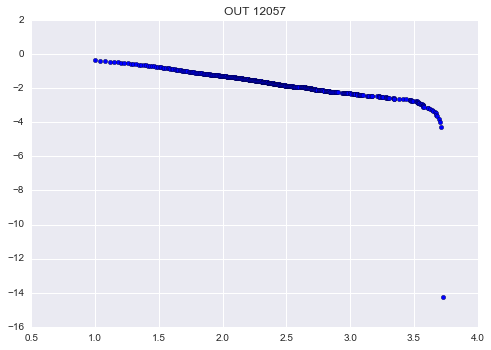

STD in  176.64062595 36.4359796438


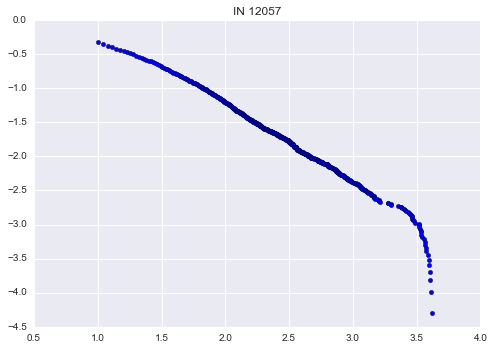

STD out  202.047535848 46.2866666667


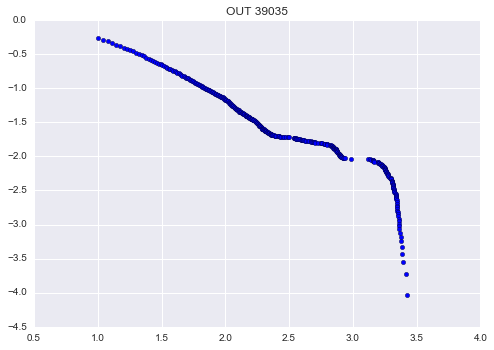

STD in  153.763660631 38.8766666667


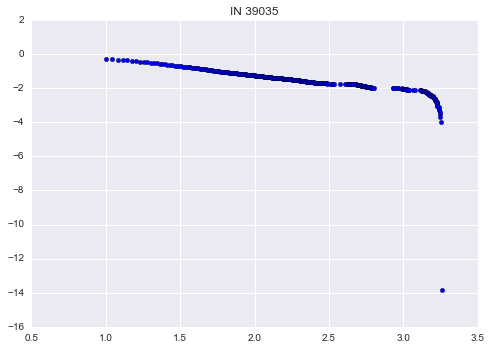

STD out  317.327011556 51.4843389831


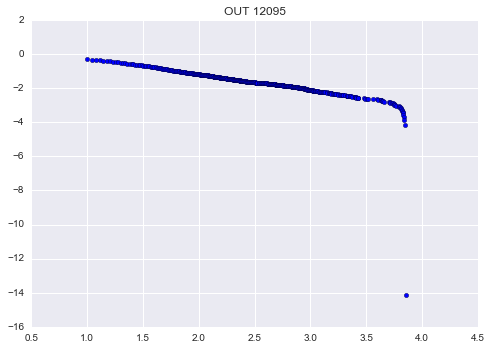

STD in  294.690744398 54.3134557596


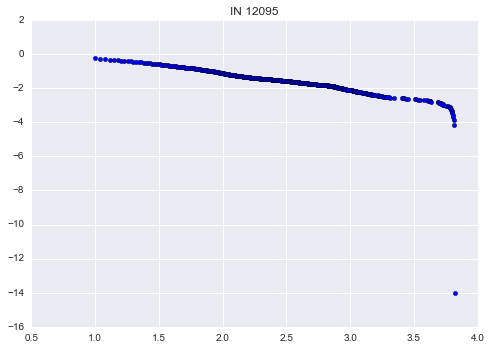

STD out  384.872586694 55.3488888889


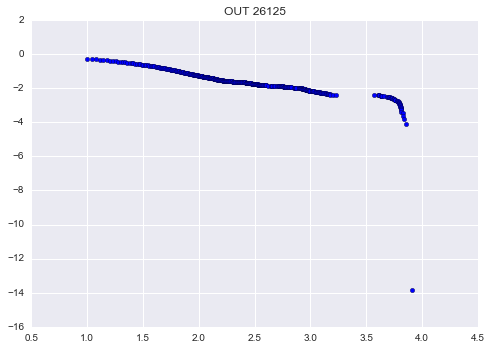

STD in  531.812052151 60.8512962963


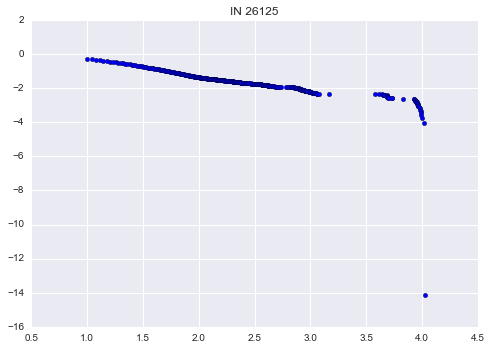

STD out  195.445778659 41.9283636364


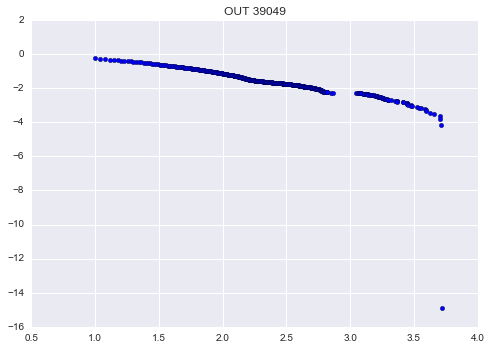

STD in  143.510766137 42.3499449541


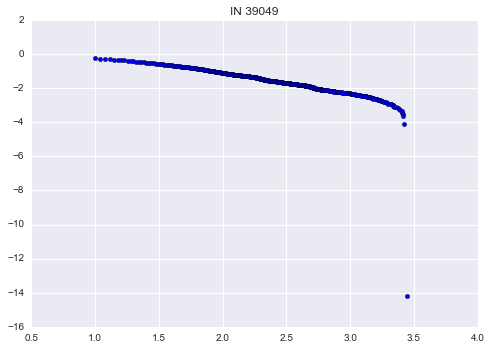

STD out  138.292103016 38.291754386


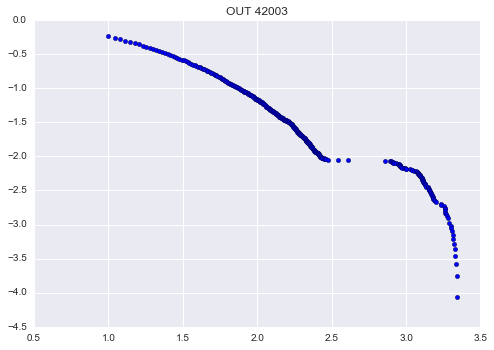

STD in  119.001509469 34.5018518519


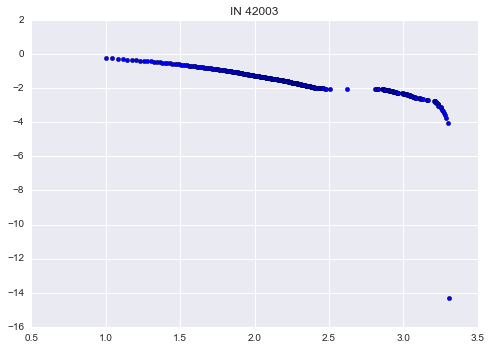

STD out  326.618638136 60.2885311871


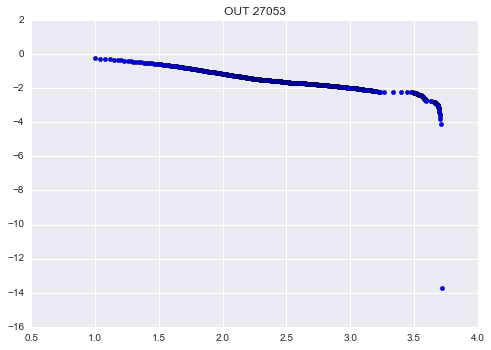

STD in  277.475742774 51.9042490842


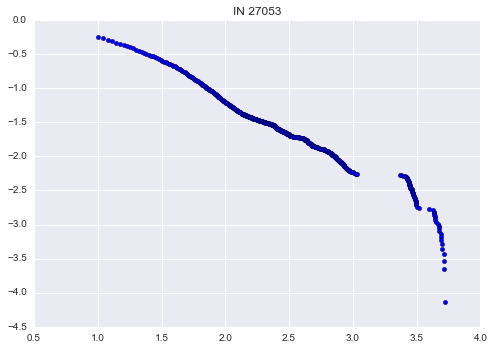

IndexError: too many indices for array

In [30]:
for element2 in topCode:
    IN=[]
    for element in mig:
        if ((element[1])==element2):
            IN.append(np.array(element,dtype=np.int))

        
    OUT=[]
    for element in mig:
        if ((element[0])==element2):
            OUT.append(np.array(element,dtype=np.int))
        
        
        
    nearest=(array(OUT, dtype=np.int)[:,2:]).flatten()
    print "STD out ",std(nearest),mean(nearest)
    
    bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
    values, base = np.histogram(nearest, bins=bins, density=1)
    u, indices = np.unique(np.cumsum(values), return_index=True)
    init=bins[:-1]
    x=[init[j] for j in indices]
    #scatter(log10(init),log10(1-np.cumsum(values)))
    scatter(log10(x),log10(1-u))
    title('OUT '+(element2))
    show()

    nearest=(array(IN, dtype=np.int)[:,2:]).flatten()
    print "STD in ",std(nearest),mean(nearest)
    
    bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
    values, base = np.histogram(nearest, bins=bins, density=1)
    u, indices = np.unique(np.cumsum(values), return_index=True)
    init=bins[:-1]
    x=[init[j] for j in indices]
    #scatter(log10(init),log10(1-np.cumsum(values)))
    scatter(log10(x),log10(1-u))
    title('IN '+(element2))
    show()
     

-0.879952988623 0.846264782184 0.991969784707


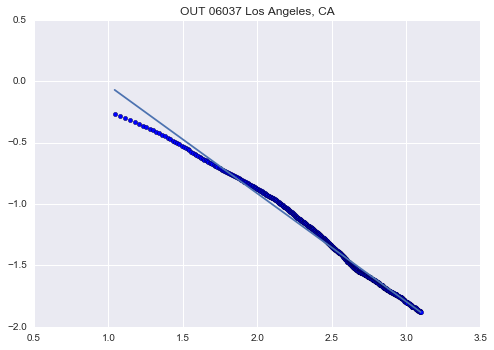

-0.883899820863 0.880037652428 0.989242715585


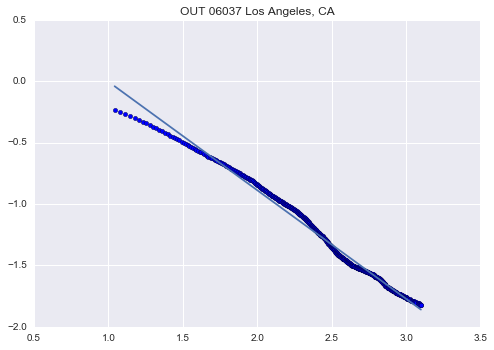

-1.04486433161 1.1482079046 0.973125664285


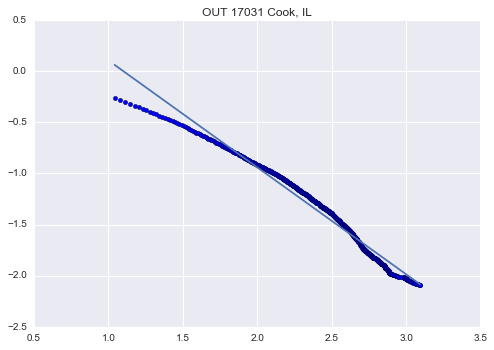

-1.10141512862 1.26226040163 0.971634934832


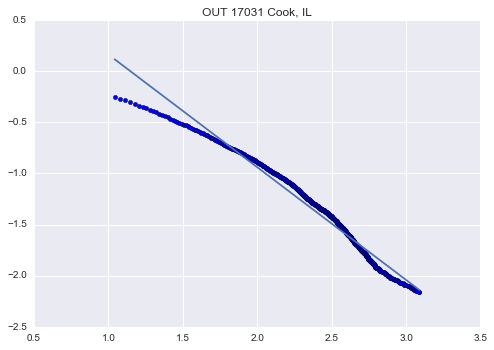

-1.01439642351 0.979836364161 0.994696855129


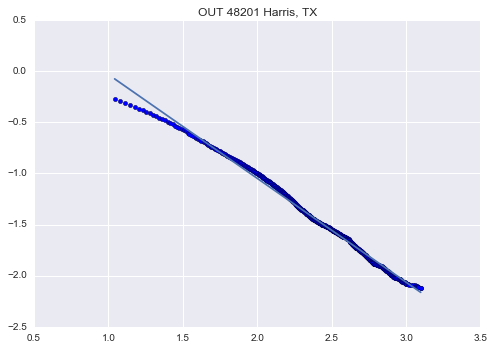

-1.01510226958 1.01630527375 0.995231683827


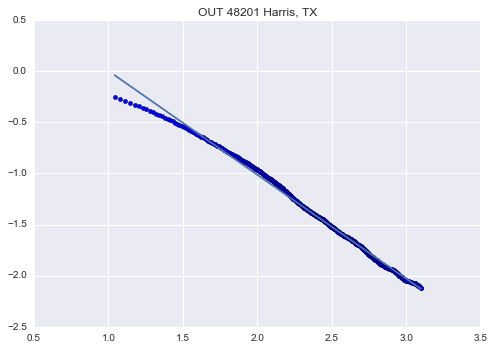

-1.08523413731 1.06460088993 0.993919988593


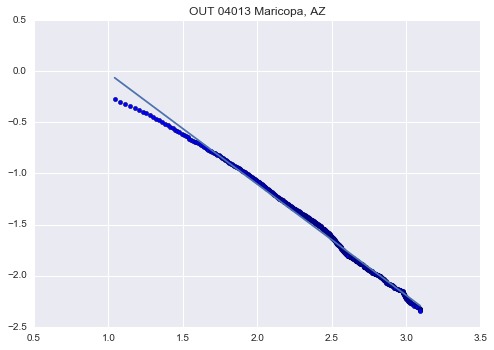

-1.11462874393 1.21122014987 0.989585062279


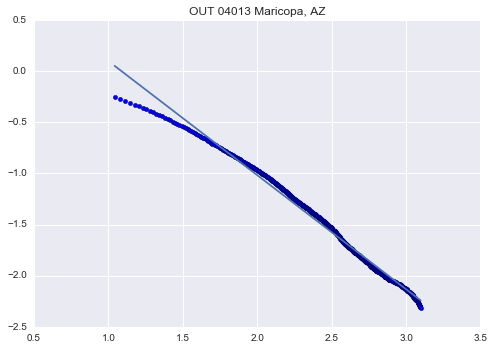

-1.10687084861 1.16894643565 0.990009881003


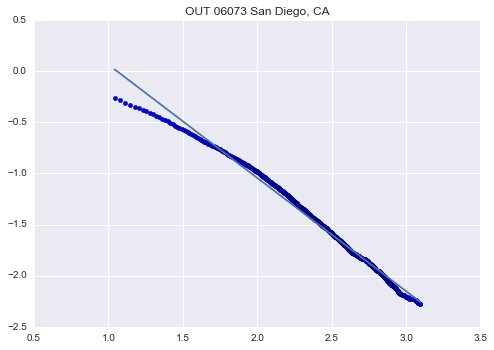

-1.10440904057 1.2149394821 0.988857945619


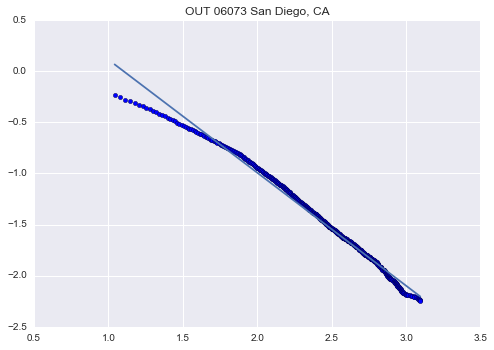

-1.01183078322 0.924467078404 0.99298203086


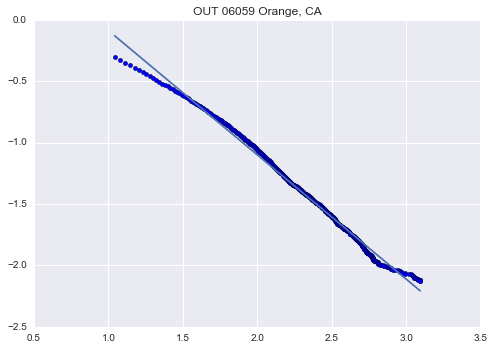

-1.01810820868 0.93930305282 0.99441218955


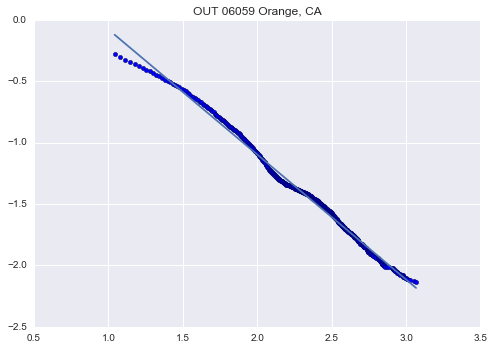

-1.01655588648 0.700969307877 0.981574347995


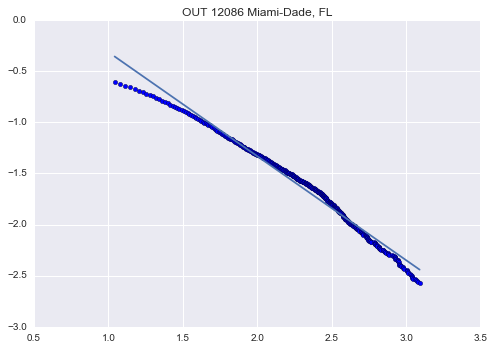

-1.08304739355 0.822896627606 0.979385112608


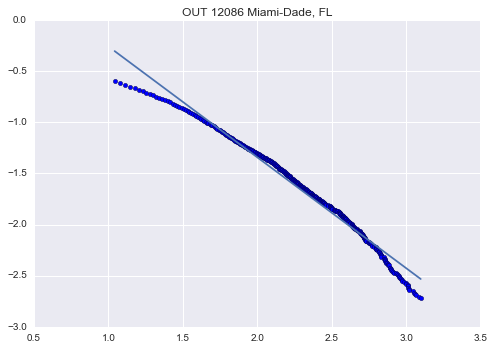

-0.885167597184 0.83857211852 0.992367082593


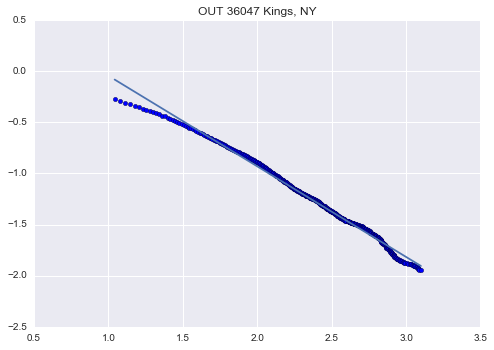

-0.952849561568 0.871868385673 0.995644814236


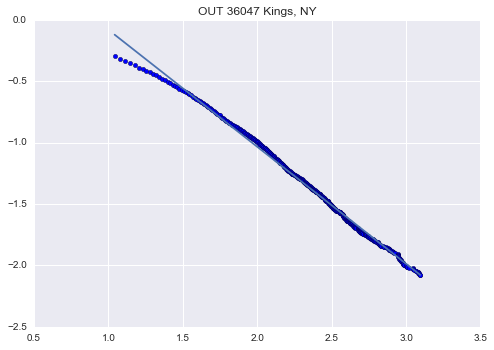

-0.98770473809 0.853775416641 0.985616050458


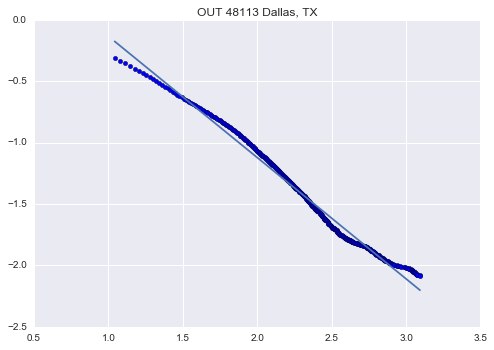

-1.04947195734 0.999539375617 0.994127313377


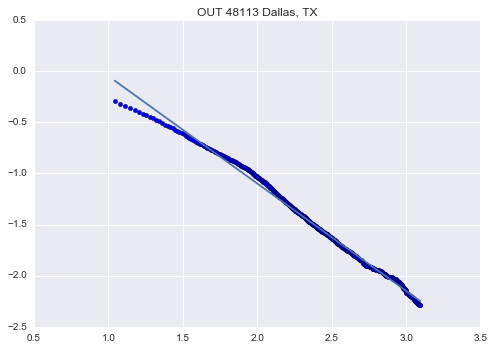

-0.950217684508 0.608131934687 0.977209707769


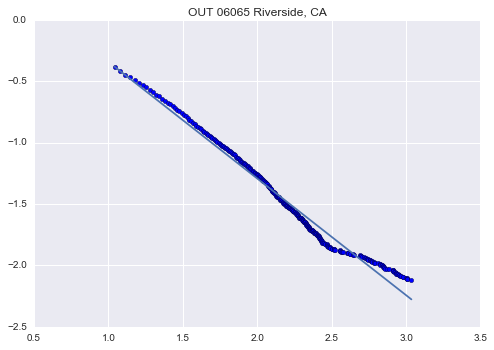

-0.956855932275 0.658064022971 0.994402397414


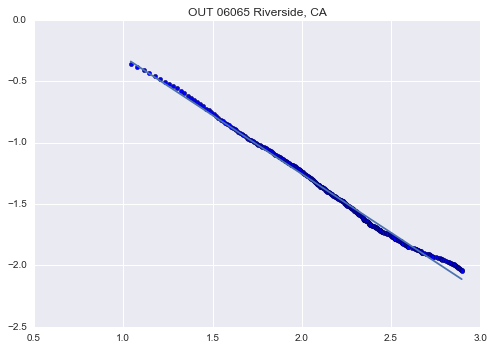

-0.87600375138 0.84739233447 0.993765877996


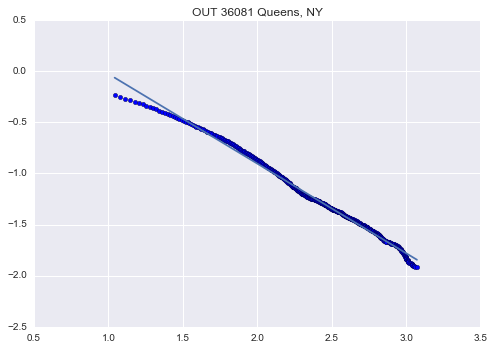

-0.90692414434 0.733183422189 0.994911529261


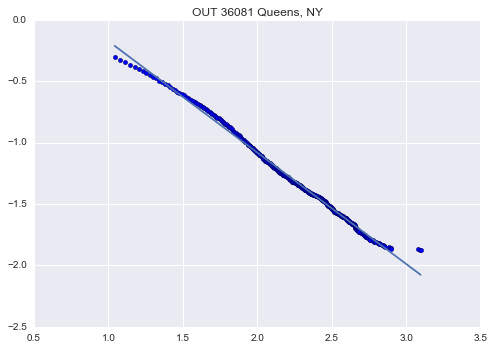

-0.969532654456 0.623982264433 0.963980717359


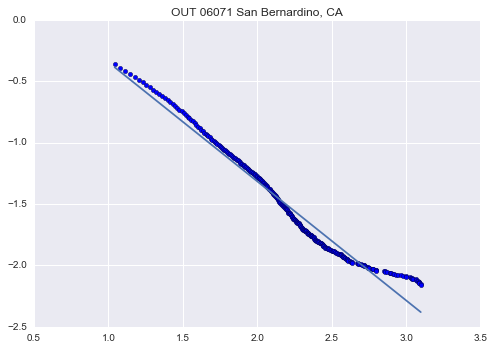

-0.952011858099 0.570766840039 0.964293425251


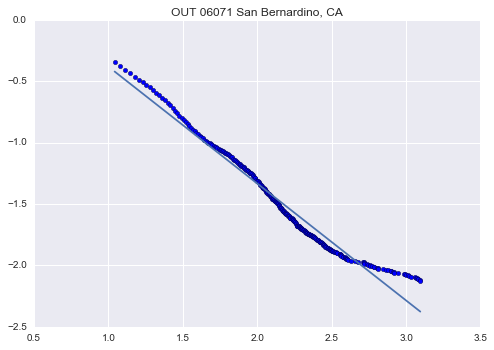

-1.07049057381 1.1583296255 0.973748223658


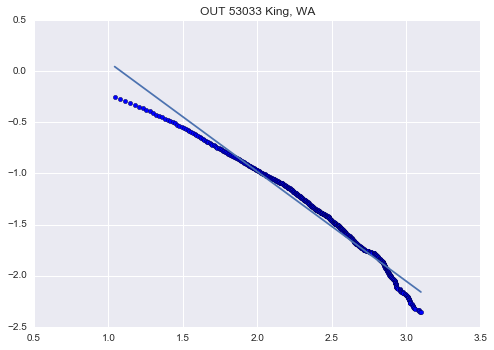

-1.10595858833 1.25239997727 0.973786592654


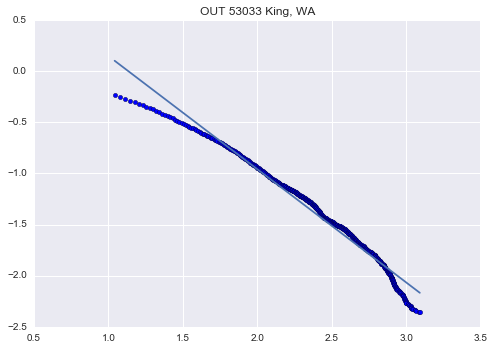

-1.20110958965 1.15773398562 0.98319883843


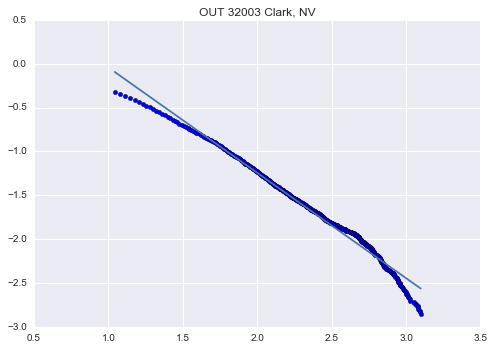

-1.10150387264 1.07681275851 0.993922508291


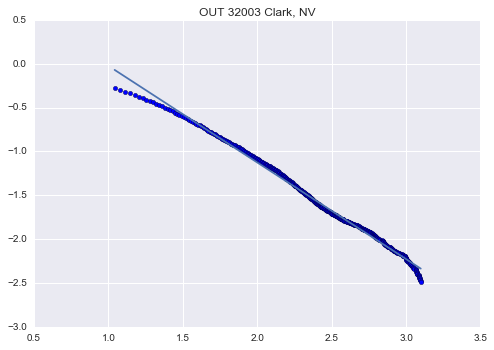

-0.977518729633 0.693492086565 0.984805601024


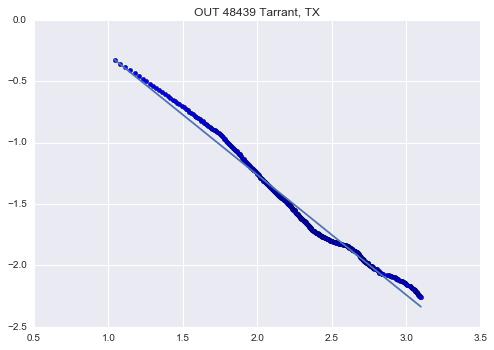

-1.06330804841 0.91722572918 0.994878246853


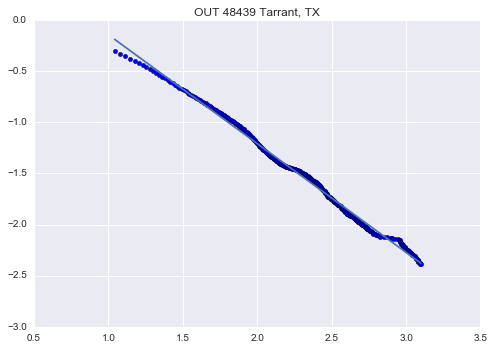

-0.797412826191 0.680824488745 0.995210673645


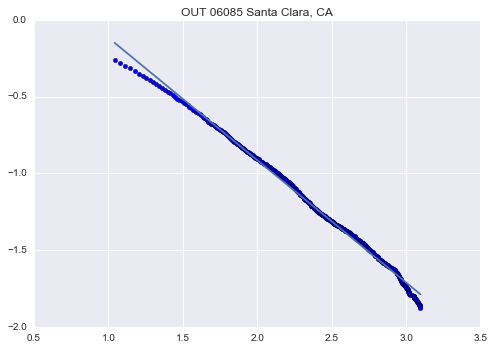

-0.893918480343 0.814303770779 0.992906205086


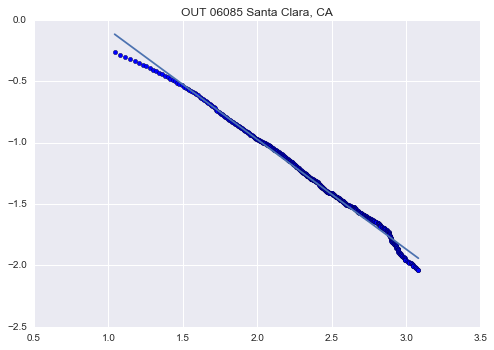

-1.19219410797 1.27185019029 0.965818790958


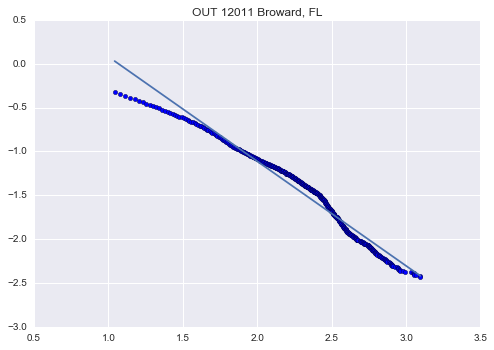

-1.21011864063 1.35266287287 0.977422460135


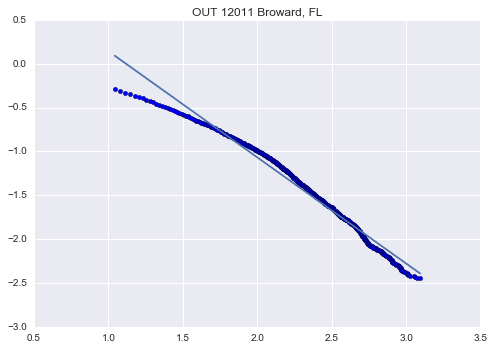

-1.0744512426 1.03494849486 0.989996393834


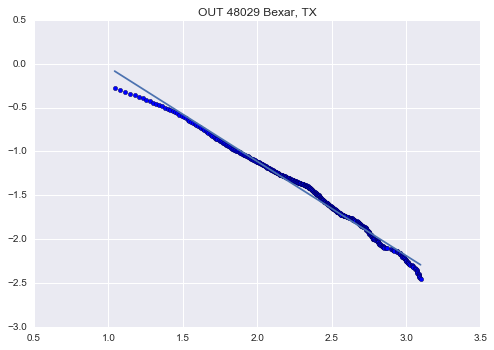

-1.20104871931 1.31082283077 0.957310731444


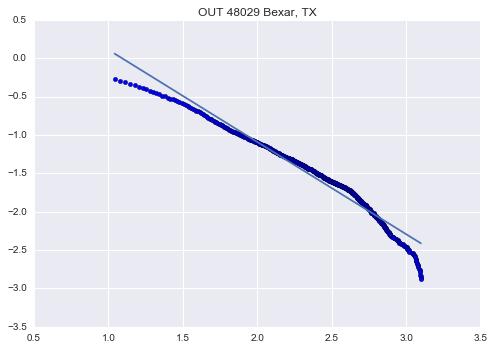

-1.01665086161 0.743340512561 0.980147113877


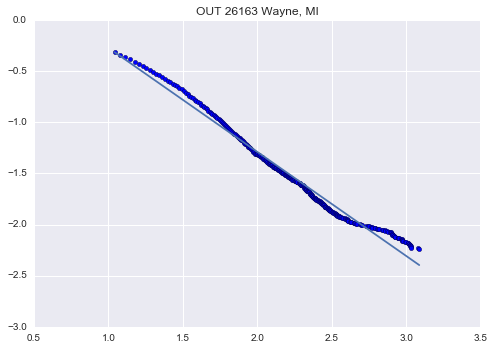

-1.02457091768 0.693182582938 0.988753949976


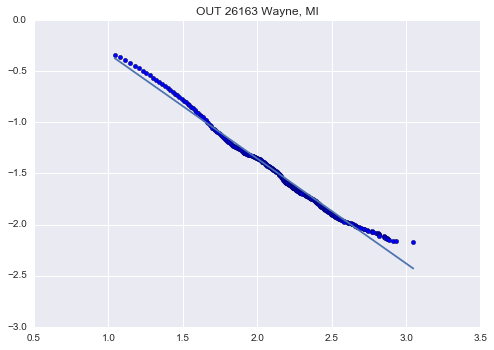

-0.794584077646 0.734233673865 0.996108915803


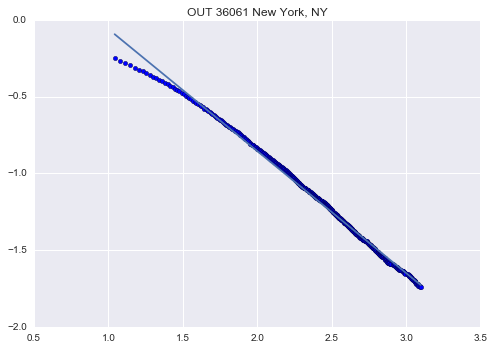

-0.810141553597 0.774624079432 0.992792673788


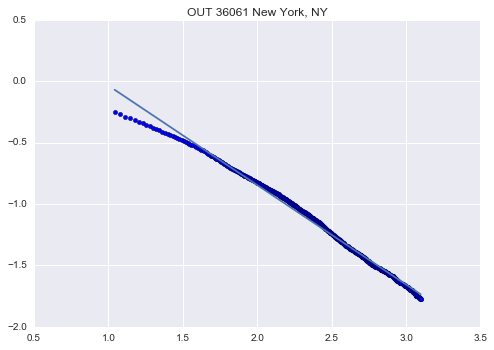

-0.794583138837 0.589419173563 0.996736772738


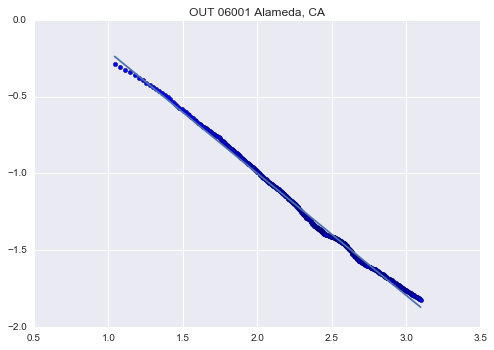

-0.831625964182 0.642088876889 0.998438752883


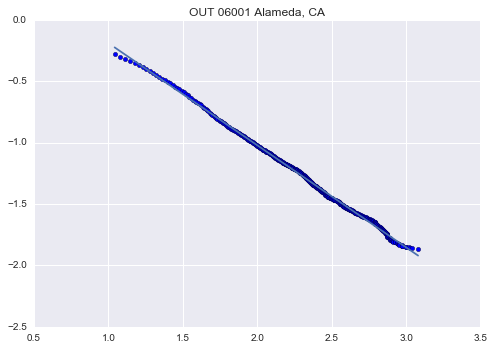

-0.953115432397 0.926229974128 0.993819140793


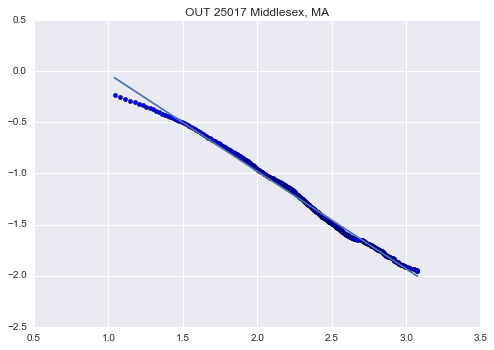

-1.01857147685 1.0181748153 0.992748147032


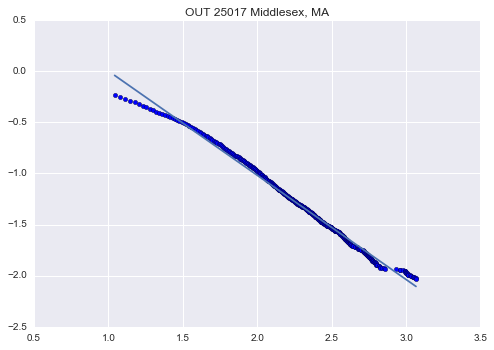

-0.916398765943 0.760744429711 0.985106389868


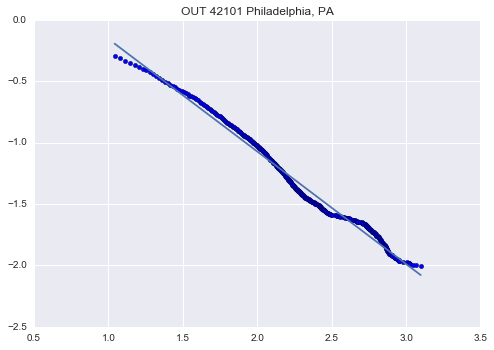

-1.00123835408 0.809949476569 0.991815954612


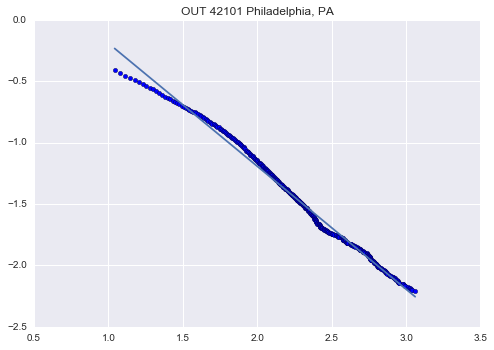

-1.12295896553 1.04279580796 0.977324210148


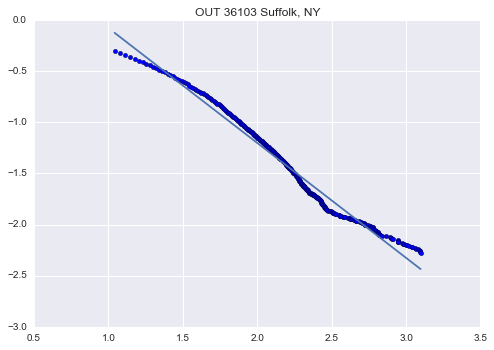

-0.850330319154 0.420106214664 0.927977868574


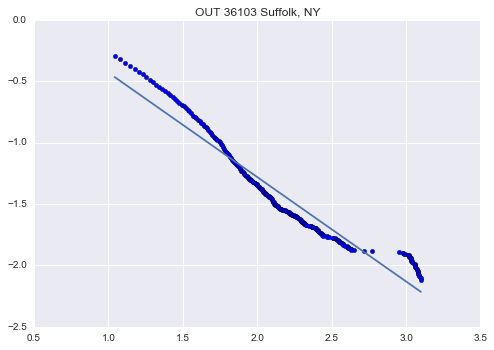

-0.901621358144 0.751445109718 0.971597321325


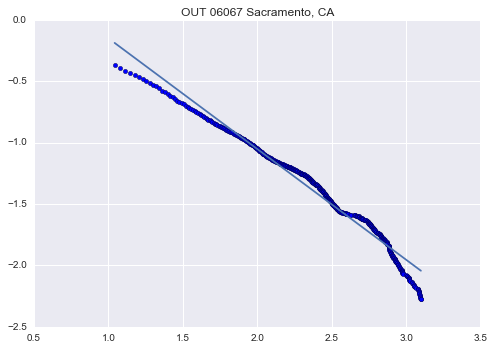

-0.753875295919 0.522673520381 0.986507480165


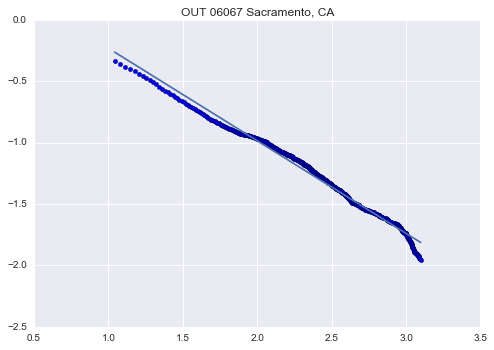

-0.917990475183 0.879460581655 0.965949998264


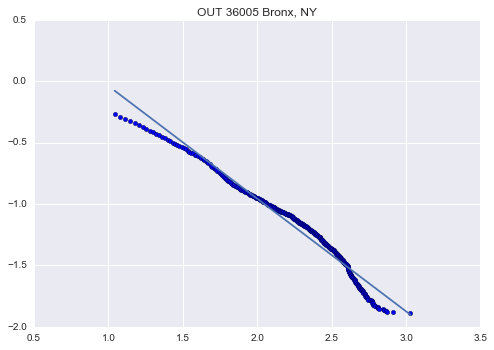

-0.920924421978 0.722623972904 0.97651481698


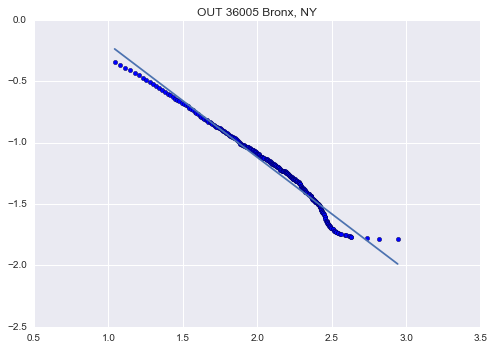

-1.19038758683 1.16703228982 0.983612977867


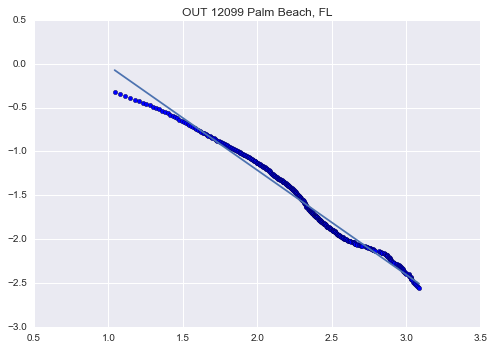

-1.20052821297 1.31311320517 0.979947820957


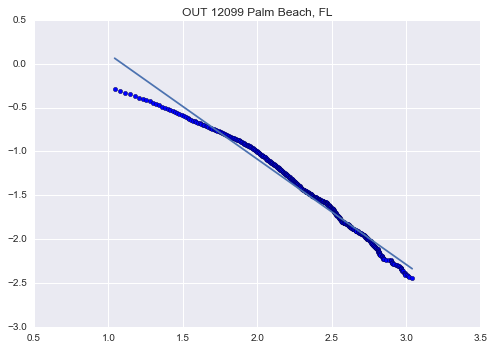

-0.981844303609 0.845761949127 0.972623376276


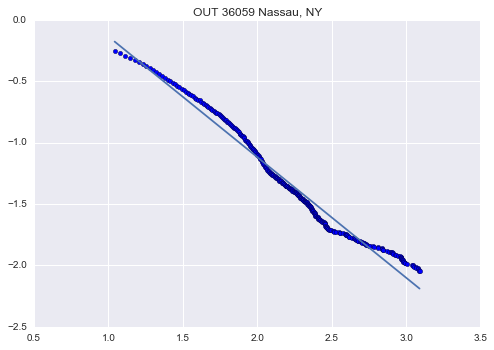

-0.920962286488 0.639249164004 0.990186642083


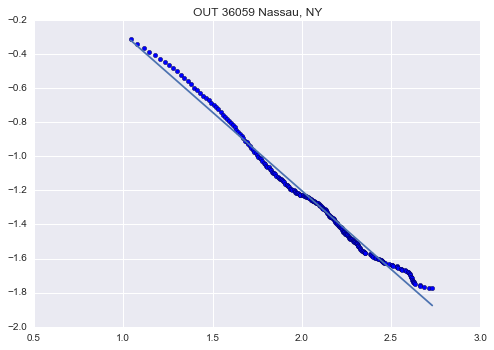

-1.04297712351 0.782421768291 0.997922317531


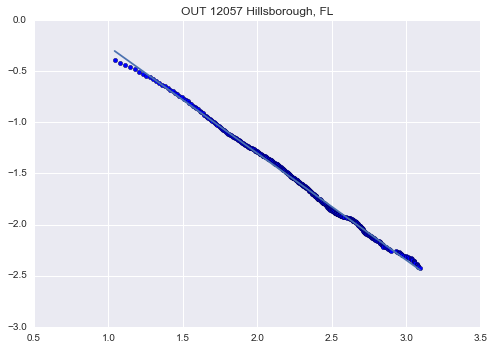

-1.12476273898 1.0114164811 0.996817746745


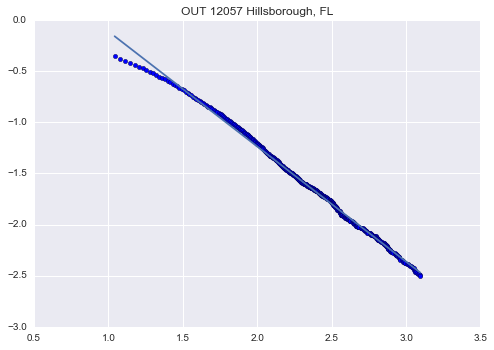

-0.93199456437 0.66613415154 0.965082942921


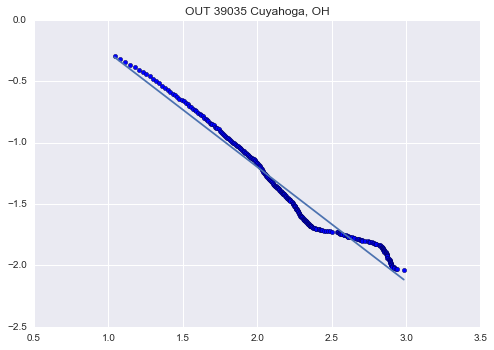

-0.906746341074 0.575961602798 0.984830384493


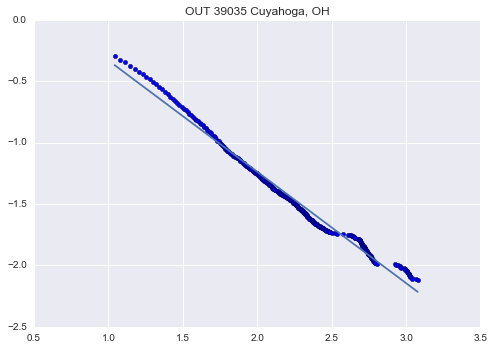

In [31]:
SlopesIN=[]
SlopesOUT=[]

topCode=[codeS for (newestS,codeS) in sorted(zip(newest,code))]
topCode=topCode[::-1]
topCode=topCode[:30]


for element2 in topCode:
    
    IN=[]
    for element in mig:
        if ((element[1])==element2):
            IN.append(np.array(element,dtype=np.int))

        
    OUT=[]
    for element in mig:
        if ((element[0])==element2):
            OUT.append(np.array(element,dtype=np.int))
        
        
        
    nearest=(array(OUT, dtype=np.int)[:,2:]).flatten()

    bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
    values, base = np.histogram(nearest, bins=bins, density=1)
    u, indices = np.unique(np.cumsum(values), return_index=True)
    init=bins[:-1]
    x=[init[j] for j in indices]
    #xx=log10(init)[np.argmax(log10(init)>1):np.argmax(log10(init)>3.2)]
    #yy=log10(1-np.cumsum(values))[np.argmax(log10(init)>1):np.argmax(log10(init)>3.2)]
    xx=log10(x)[np.argmax(log10(x)>1):np.argmax(log10(x)>3.1)]
    yy=log10(1-u)[np.argmax(log10(x)>1):np.argmax(log10(x)>3.1)]
    scatter(xx,yy)
    slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
    plot(xx,xx*slope+intercept)
    print slope, intercept, r_value**2
    title('OUT '+(element2)+' '+top[topCode.index(element2)])
    show()
    SlopesOUT.append(slope)

    nearest=(array(IN, dtype=np.int)[:,2:]).flatten()

    bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
    values, base = np.histogram(nearest, bins=bins, density=1)
    u, indices = np.unique(np.cumsum(values), return_index=True)
    init=bins[:-1]
    x=[init[j] for j in indices]
    #xx=log10(init)[np.argmax(log10(init)>1):np.argmax(log10(init)>3.2)]
    #yy=log10(1-np.cumsum(values))[np.argmax(log10(init)>1):np.argmax(log10(init)>3.2)]
    xx=log10(x)[np.argmax(log10(x)>1):np.argmax(log10(x)>3.1)]
    yy=log10(1-u)[np.argmax(log10(x)>1):np.argmax(log10(x)>3.1)]
    scatter(xx,yy)
    slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
    plot(xx,xx*slope+intercept)
    print slope, intercept, r_value**2
    title('OUT '+(element2)+' '+top[topCode.index(element2)])
    show()
    SlopesIN.append(slope)

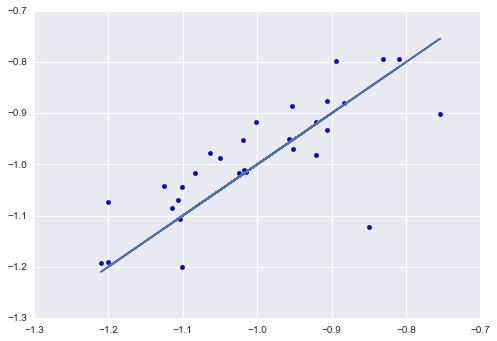

In [32]:
scatter(SlopesIN,SlopesOUT)
plot(SlopesIN,SlopesIN)
#there are more outflows than inflows, consistent with urban expansion, bigger migration to neighbouring counties
#there is no way this things have well defined variances, exponent is even too low for mean in some cases

In [33]:
bottCode=[codeS for (newestS,codeS) in sorted(zip(newest,code))]
bottCode=bottCode[100:110]
bottCode

['29227',
 '48359',
 '46017',
 '02105',
 '30107',
 '46095',
 '20025',
 '20187',
 '48327',
 '20203']

29227


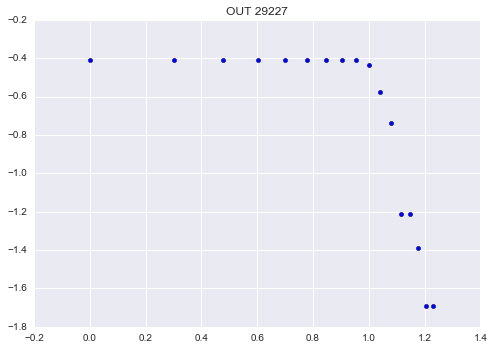

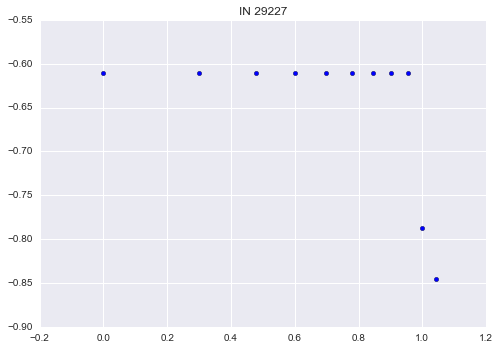

48359


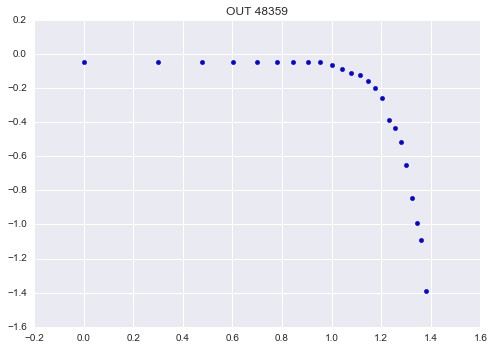

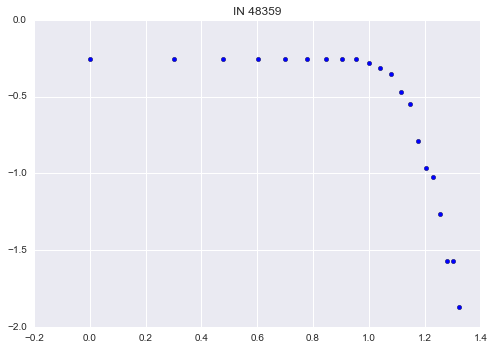

46017


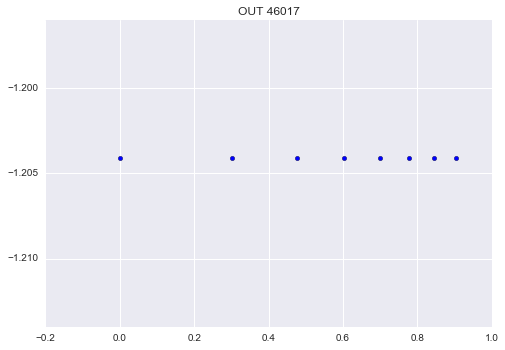

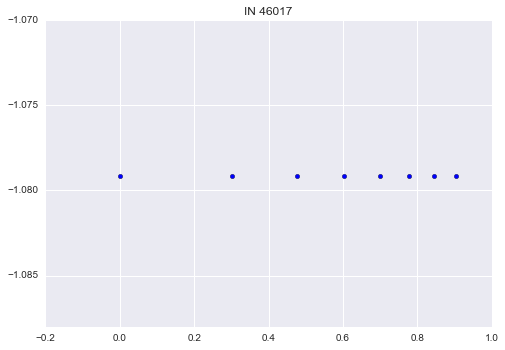

02105


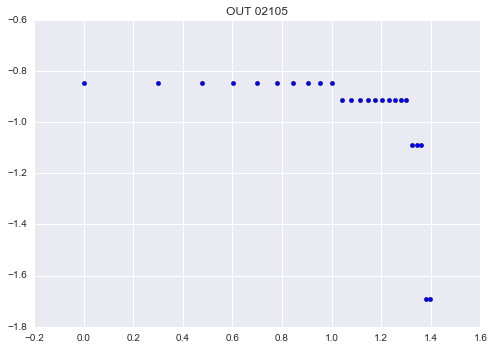

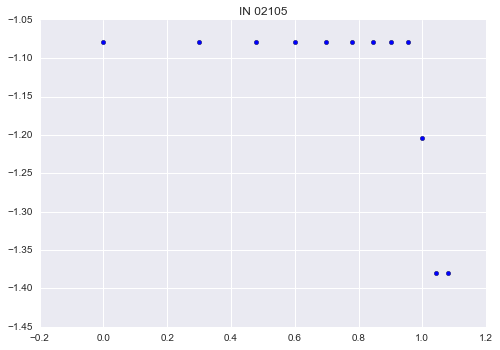

30107


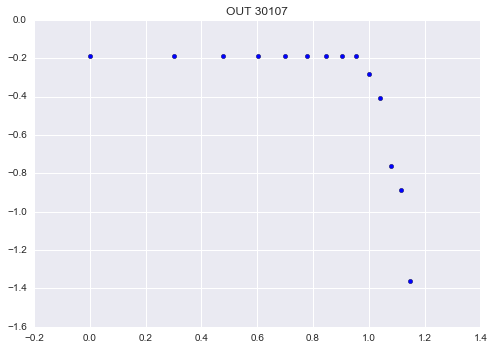

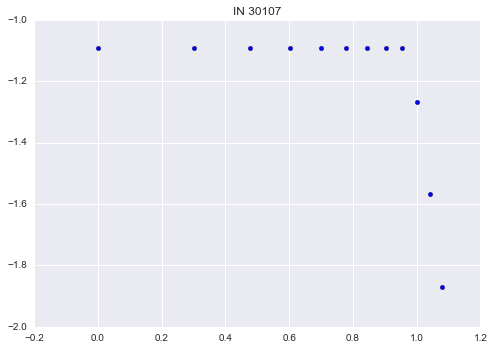

46095


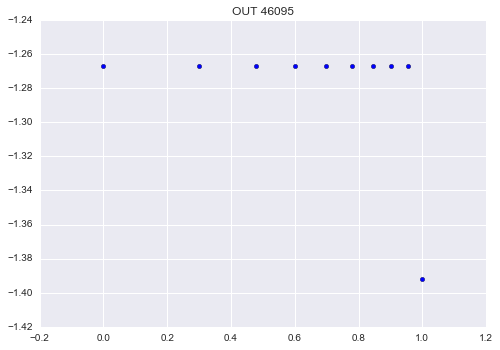

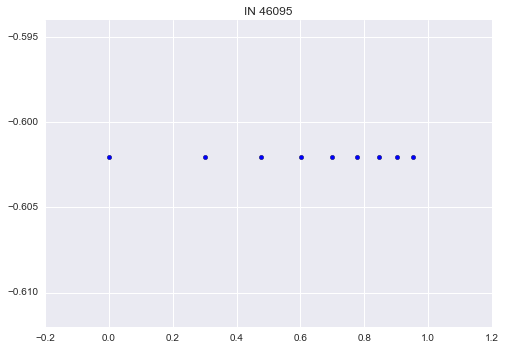

20025


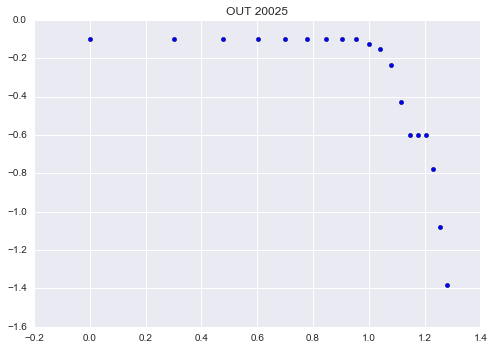

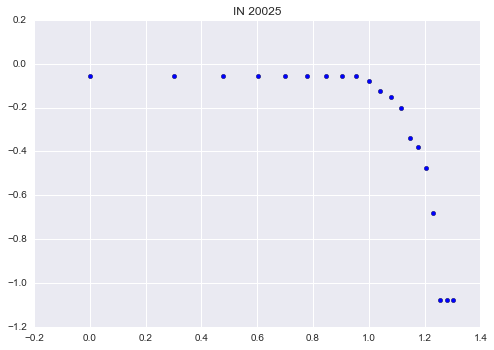

20187


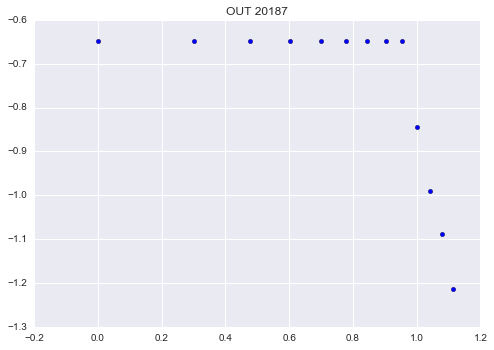

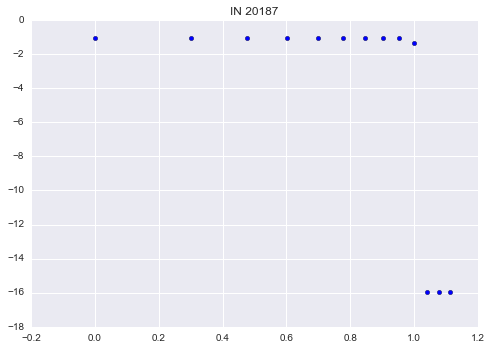

48327


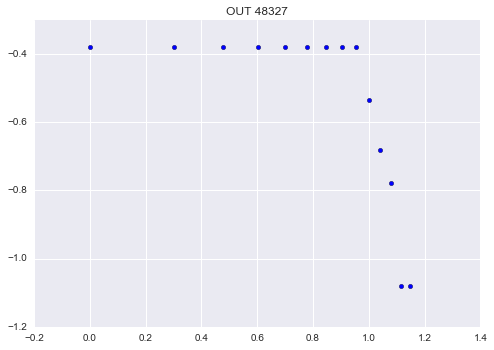

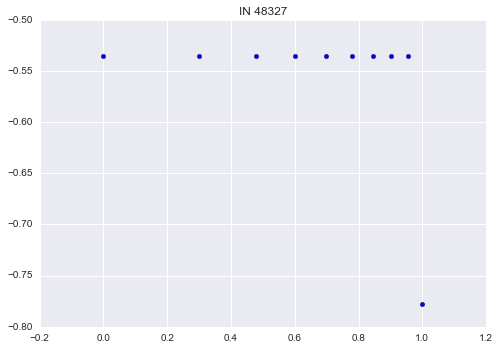

20203


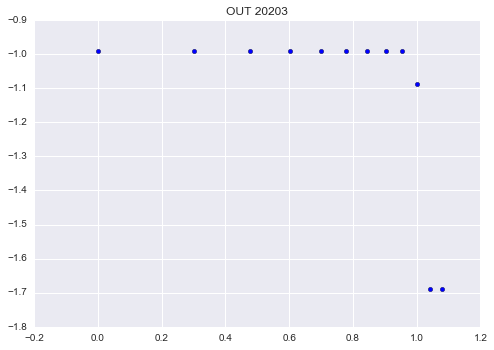

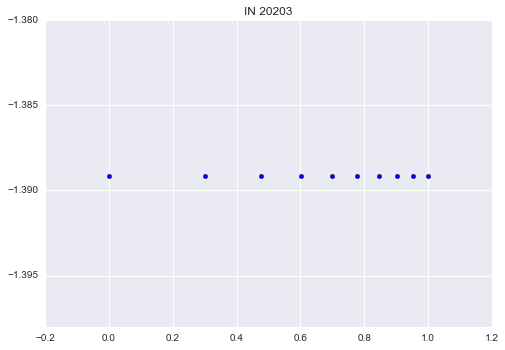

In [34]:
#top ten above dont have data on transitions
for element3 in bottCode:
    print element3
    IN=[]
    for element in mig:
        if ((element[1])==element3):
            IN.append(np.array(element,dtype=np.int))

        
    OUT=[]
    for element in mig:
        if ((element[0])==element3):
            OUT.append(np.array(element,dtype=np.int))
        
        
    #print IN , OUT  
    nearest=(array(OUT, dtype=np.int)[:,2:]).flatten()

    bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
    values, base = np.histogram(nearest, bins=bins, density=1)
    u, indices = np.unique(np.cumsum(values), return_index=True)
    init=bins[:-1]
    x=[init[j] for j in indices]
    scatter(log10(init),log10(1-np.cumsum(values)))
    title('OUT '+(element3))
    show()
    
    
    nearest=(array(IN, dtype=np.int)[:,2:]).flatten()

    bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
    values, base = np.histogram(nearest, bins=bins, density=1)
    u, indices = np.unique(np.cumsum(values), return_index=True)
    init=bins[:-1]
    x=[init[j] for j in indices]
    scatter(log10(init),log10(1-np.cumsum(values)))
    title('IN '+(element3))
    show()

In [35]:
#calculate variance of gaussian from power law in each county.
#calculate total in and outflows and relate variance to the total population.
#How closely is IN-OUT vs IN and OUT.
#Stick and slip conditions
#literature search


In [36]:
#mig has data fro 1990 to 2014

In [ ]:
#variance from power law
#literature
#exponent consistent with CTL?
#total inflows vs outflows in one year
#In -Out vs In and OUT separately... same order of magnitude???


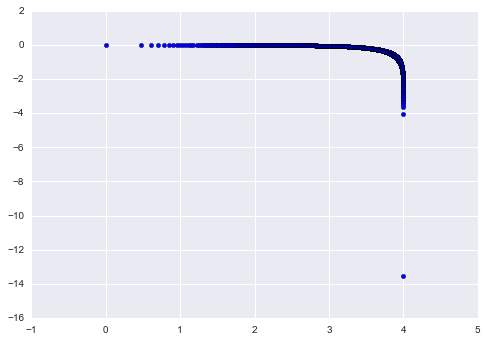

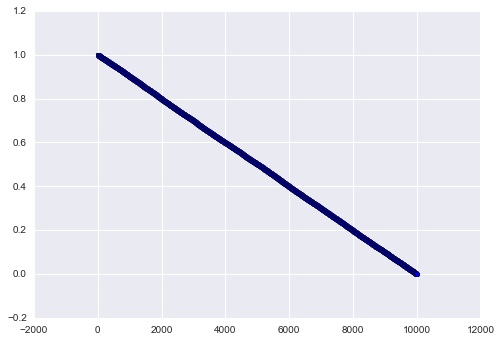

In [37]:
##checking if I can reproduce the behavior just by using random integers

import random
nearest=np.array([random.randint(0,10000) for i in range(21075)],dtype=np.int)

bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
#scatter(log10(init),log10(1-np.cumsum(values)))
scatter(log10(x),log10(1-u))
show()

scatter((x),(1-u))
show()

In [38]:
element5='06037'
IN=[]
for element in mig:
    if ((element[1])==element5):
        IN.append(np.array(element,dtype=np.int))

        
OUT=[]
for element in mig:
    if ((element[0])==element5):
        OUT.append(np.array(element,dtype=np.int))

In [39]:
##ins-outs practically irrelevant in population differences? gaussian behavior may come from birthsand deaths

outs=(array(OUT, dtype=np.int)[:,2:])
ins=(array(IN, dtype=np.int)[:,2:])


print sum(outs.T,1), sum(ins.T,1), sum(ins.T,1)-sum(outs.T,1)
print amax(outs.T,1), amax(ins.T,1),amax(outs.T,1)- amax(ins.T,1)

[153569 146983 150543 152374 143823 125632 120732 116308 115173 118816
 117129 114919 115853 122927 131870 140820 138162 126694 120205 118899
 115855 132218 134512 124407 101294] [101674  96329  83799  78096  81152  79615  86150  91895  96135  95084
  96144  96541  95380  94057  92277  93782  91307 100742 101396  95961
 101700 118900 118308 106448  88909] [-51895 -50654 -66744 -74278 -62671 -46017 -34582 -24413 -19038 -23732
 -20985 -18378 -20473 -28870 -39593 -47038 -46855 -25952 -18809 -22938
 -14155 -13318 -16204 -17959 -12385]
[24212 24218 23359 22947 22120 20756 22154 22315 21097 20369 19386 18688
 19227 19926 20065 20565 18536 17814 17736 19127 18243 19871 20274 19238
 15621] [17455 17351 16042 14921 14946 13950 14507 16211 17191 15964 16025 16127
 15743 15413 14943 14615 14058 14724 15192 15148 14834 17241 17960 16554
 13709] [6757 6867 7317 8026 7174 6806 7647 6104 3906 4405 3361 2561 3484 4513 5122
 5950 4478 3090 2544 3979 3409 2630 2314 2684 1912]


'differences and migration in LA'

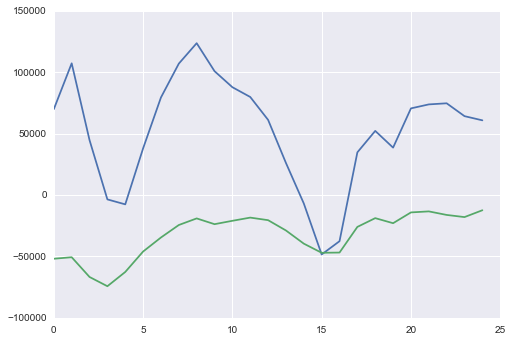

In [40]:

a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
c=(a[229][8:-1])
ome=diff((np.array(c, dtype=np.int)))[-25:]
plot(ome)
lediff=sum(ins.T,1)-sum(outs.T,1)
plot(lediff)
"differences and migration in LA"

initial pop, median, mean,std 7042756 -24413.0 -32717.44 17786.3720912


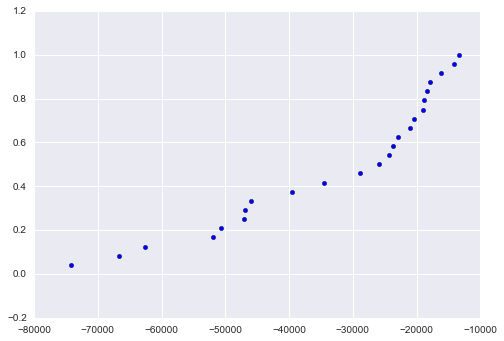

In [41]:
element5='06037'
IN=[]
for element in mig:
    if ((element[1])==element5):
        IN.append(np.array(element,dtype=np.int))

        
OUT=[]
for element in mig:
    if ((element[0])==element5):
        OUT.append(np.array(element,dtype=np.int))

outs=(array(OUT, dtype=np.int)[:,2:])
ins=(array(IN, dtype=np.int)[:,2:])


lediff=sum(ins.T,1)-sum(outs.T,1)
nearest=lediff
central.append([np.median(nearest), np.mean(nearest)])
print 'initial pop, median, mean,std',c[0], np.median(nearest), np.mean(nearest),np.std(nearest)
bins = np.arange(np.floor(nearest.min()),np.ceil(nearest.max()))
values, base = np.histogram(nearest, bins=bins, density=1)
u, indices = np.unique(np.cumsum(values), return_index=True)
init=bins[:-1]
x=[init[j] for j in indices]
scatter(x, u)

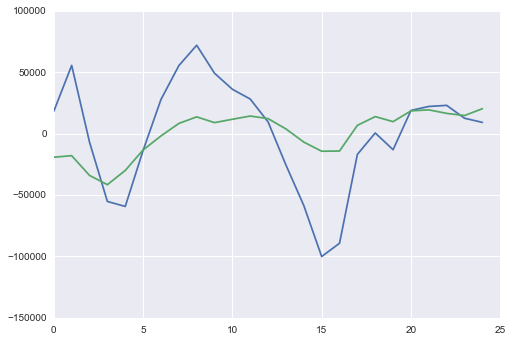

6449353653.4319992

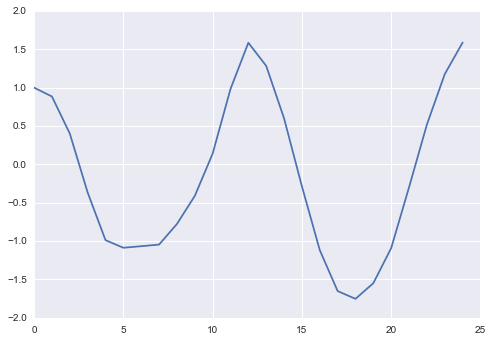

In [42]:
plot(ome-mean(ome))
plot(lediff-mean(lediff))
show()
core=correlate(ome-mean(ome),lediff-mean(lediff),'same')
plot(core/core[0])
core[0]

0
Los Angeles, CA


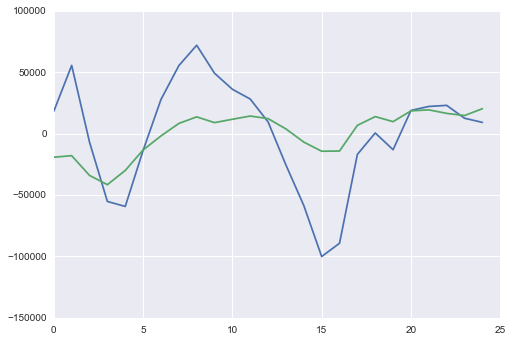

371729867.544


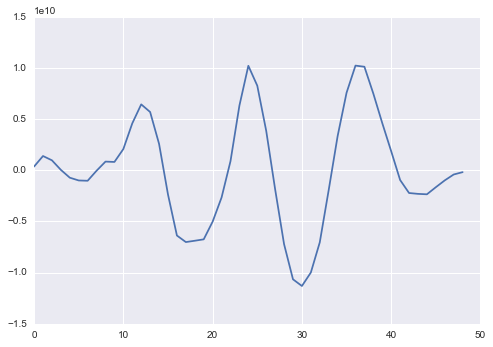

1
Cook, IL


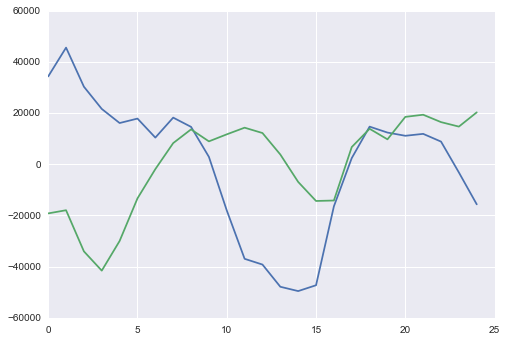

284359586.314


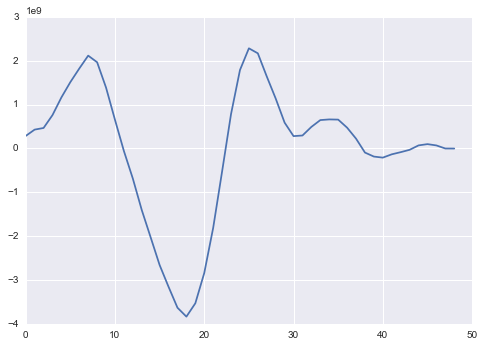

2
Harris, TX


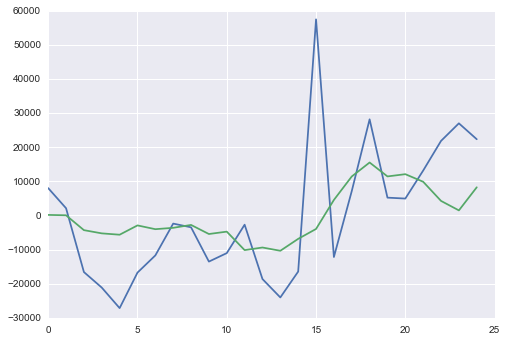

53705336.0752


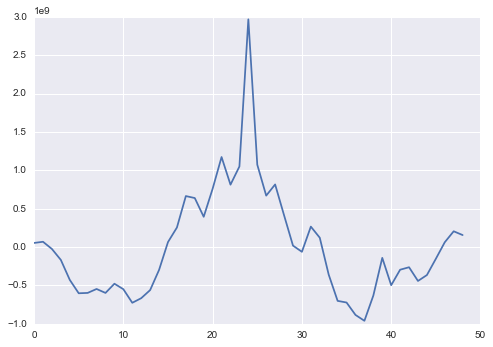

3
Maricopa, AZ


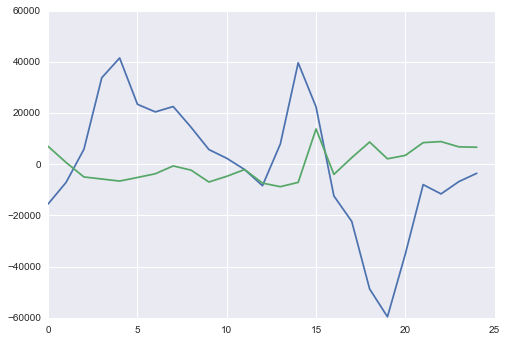

89178595.4304


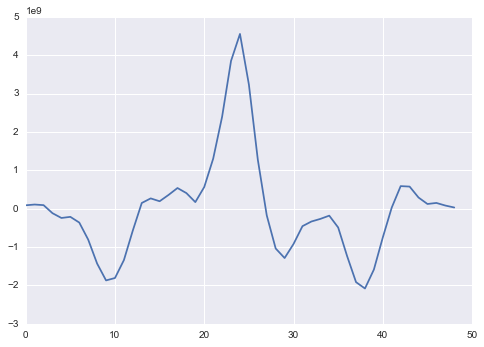

4
San Diego, CA


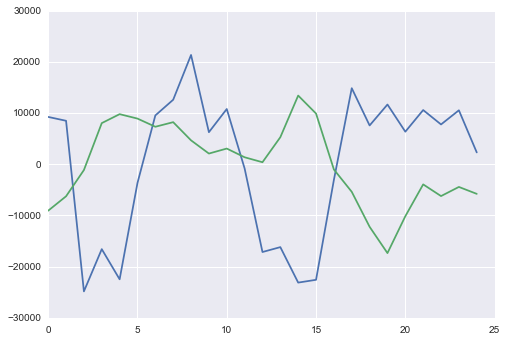

21976151.1648


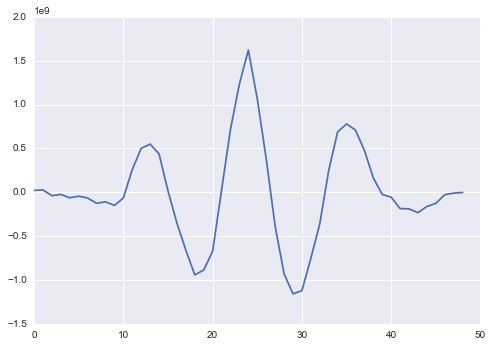

5
Orange, CA


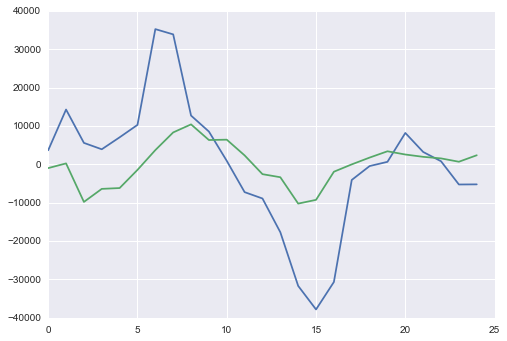

8088092.12


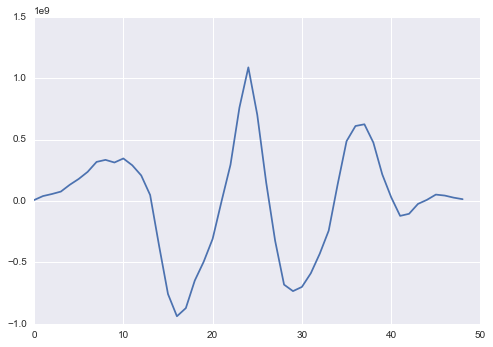

6
Miami-Dade, FL


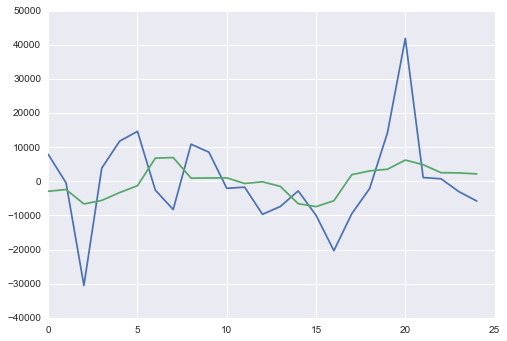

-8234392.0


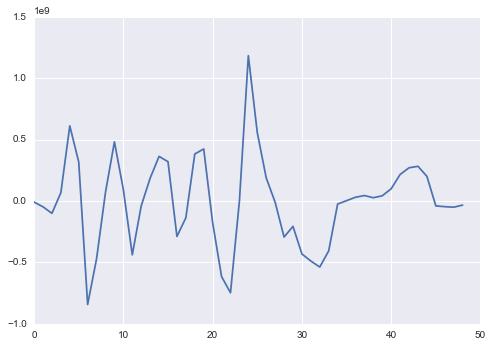

7
Kings, NY


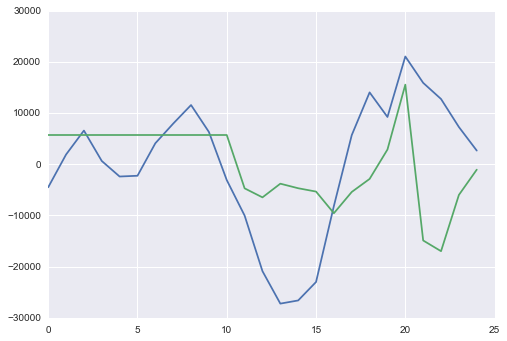

-24604021.12


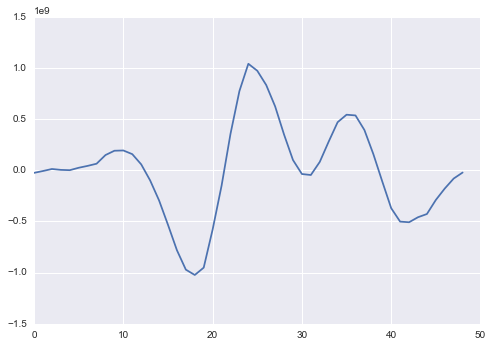

8
Dallas, TX


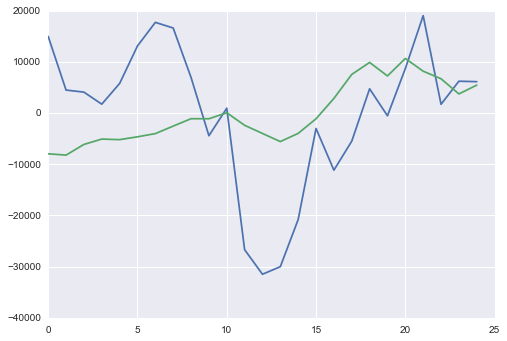

80657128.2944


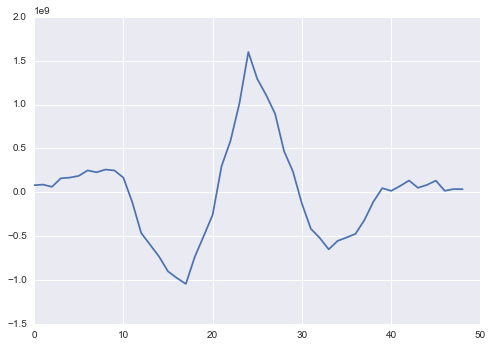

9
Riverside, CA


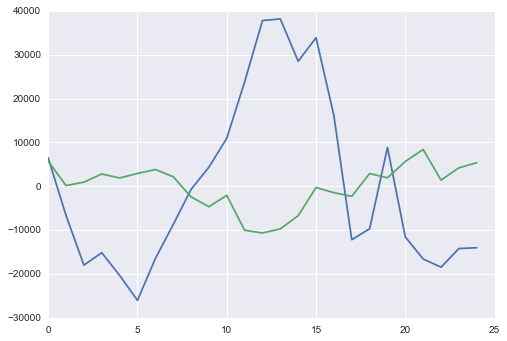

-37070664.352


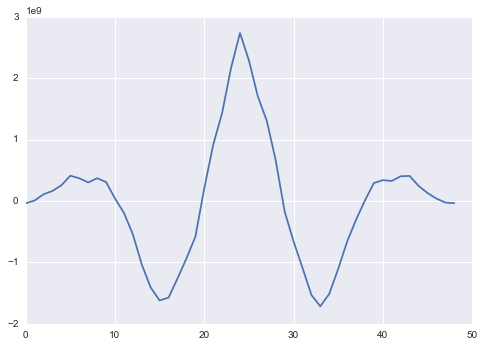

10
Queens, NY


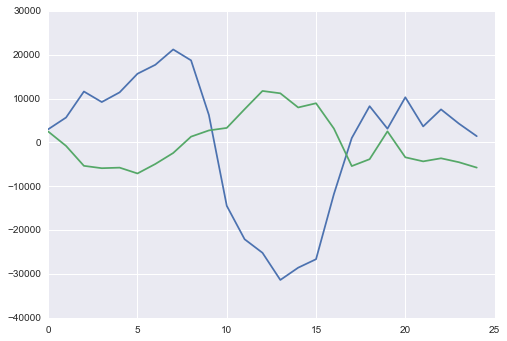

10775301.9552


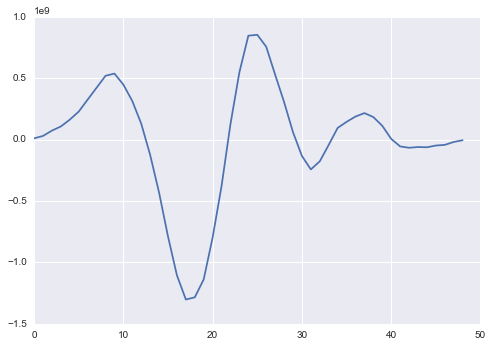

11
San Bernardino, CA


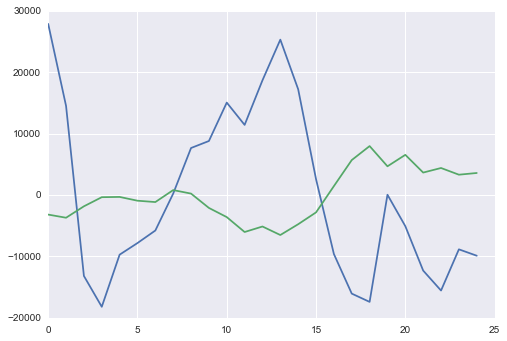

-30106382.4


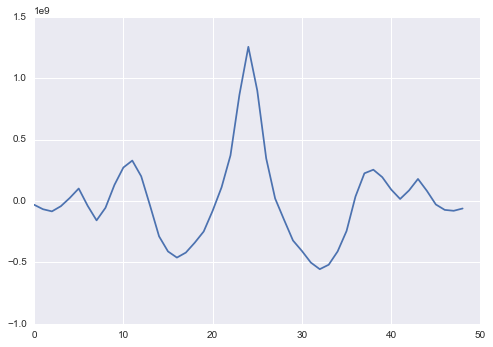

12
King, WA


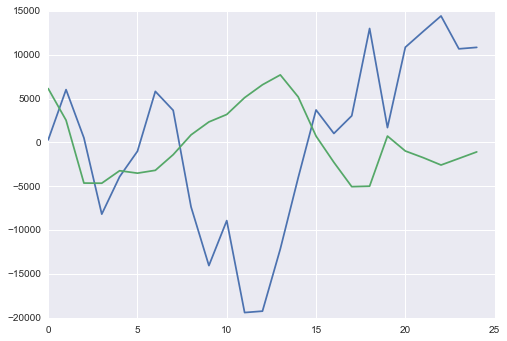

517885.3904


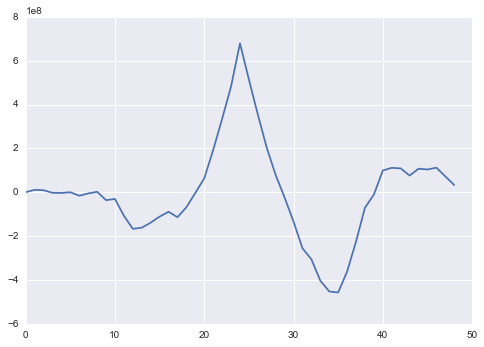

13
Clark, NV


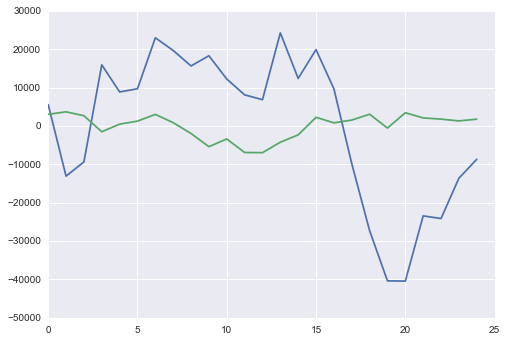

-22150044.3584


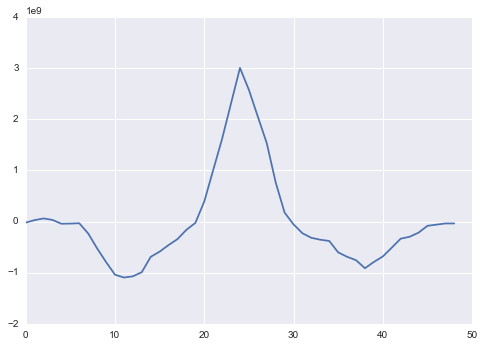

14
Tarrant, TX


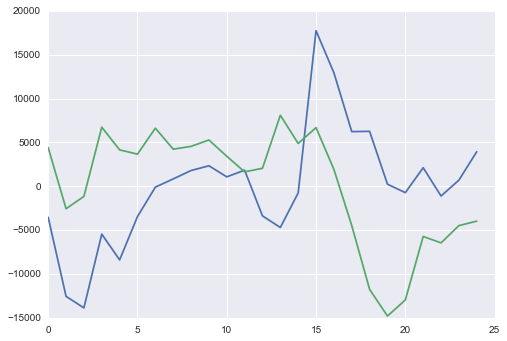

-610013.9344


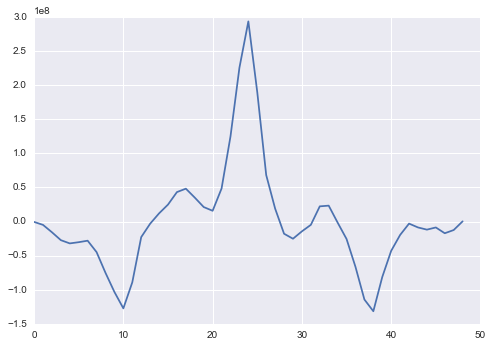

15
Santa Clara, CA


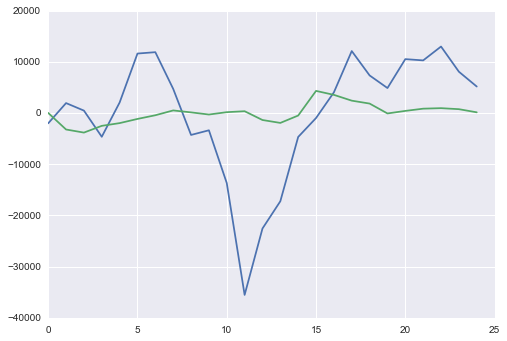

-4394599.776


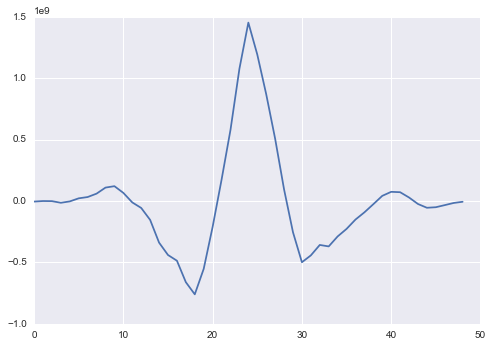

16
Broward, FL


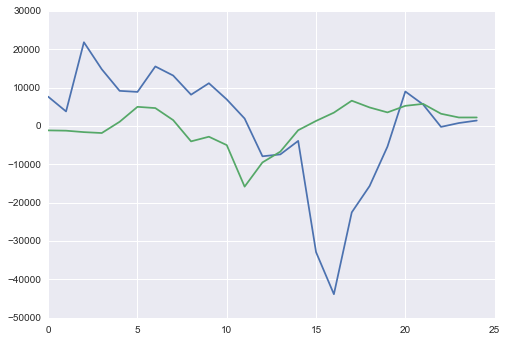

-6405493.1584


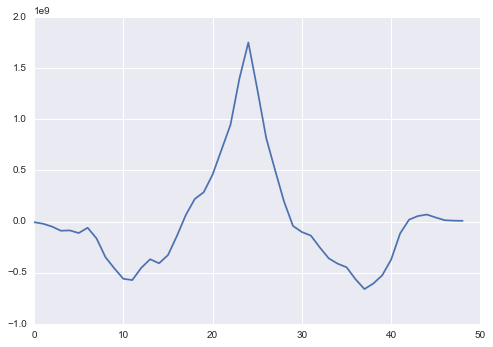

17
Bexar, TX


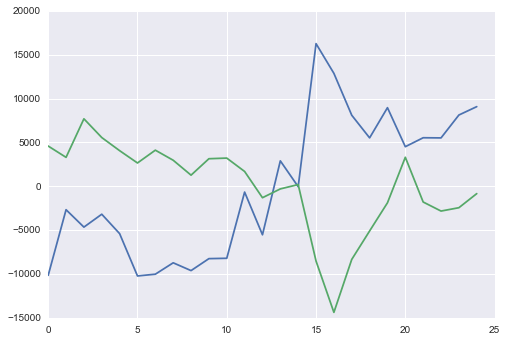

-10367981.8112


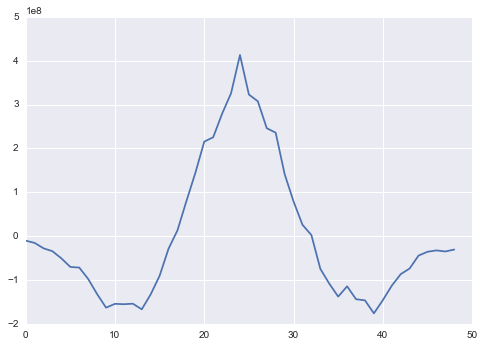

18
Wayne, MI


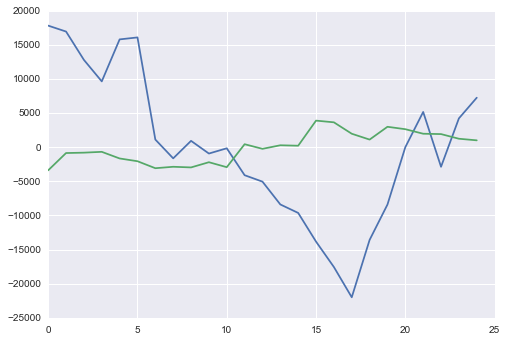

101333791.68


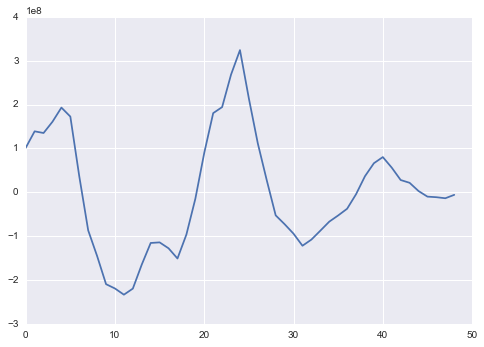

19
New York, NY


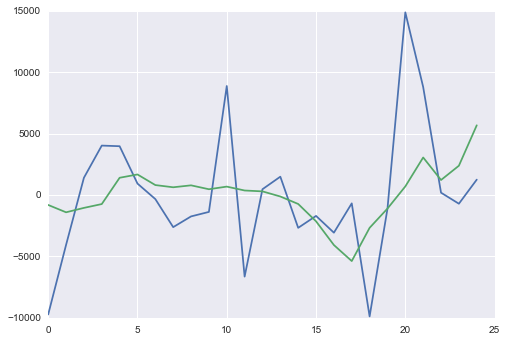

14911184.4


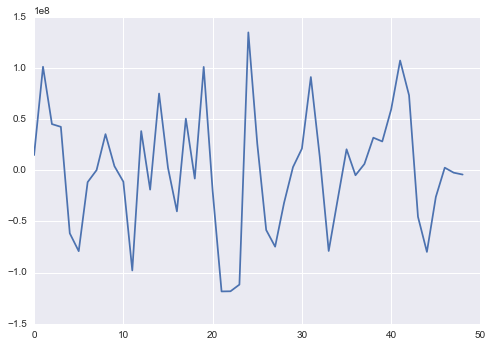

20
Alameda, CA


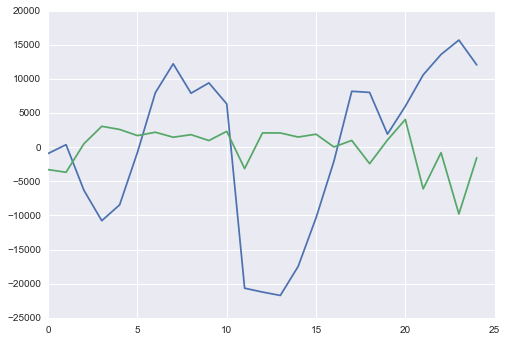

-3943308.9024


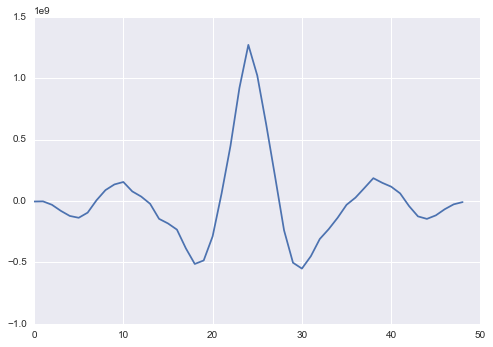

21
Middlesex, MA


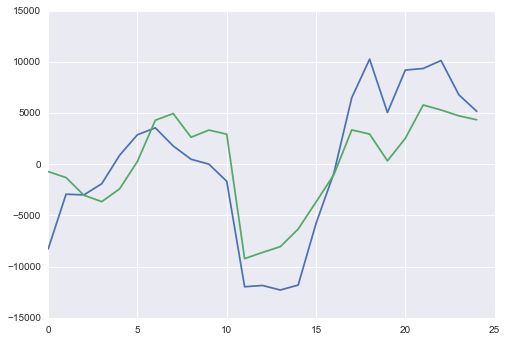

-17199400.2432


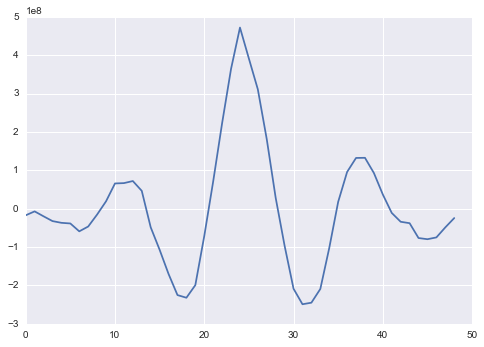

22
Philadelphia, PA


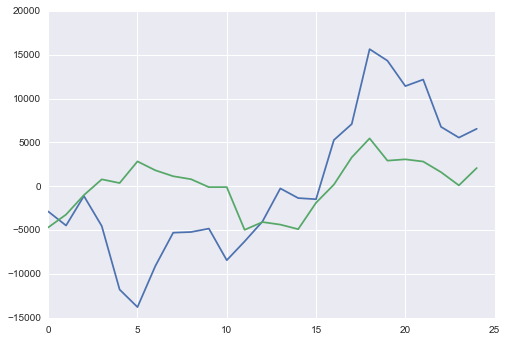

-9806331.8272


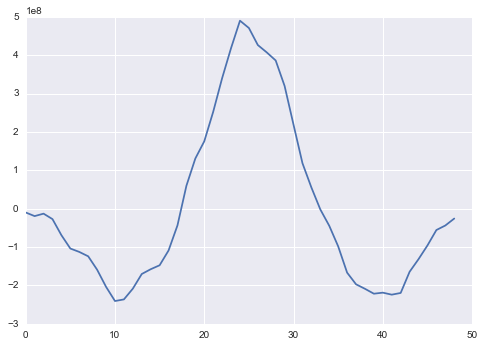

23
Suffolk, NY


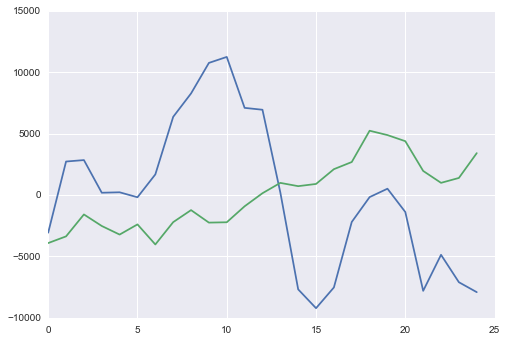

-986575.0752


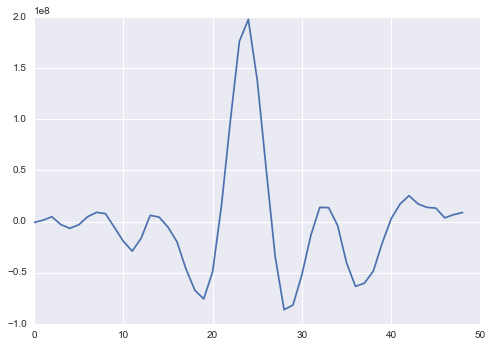

24
Sacramento, CA


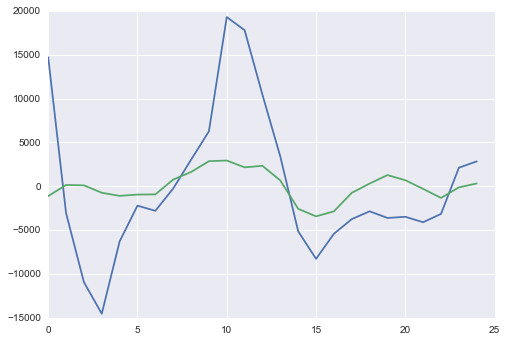

10745132.8


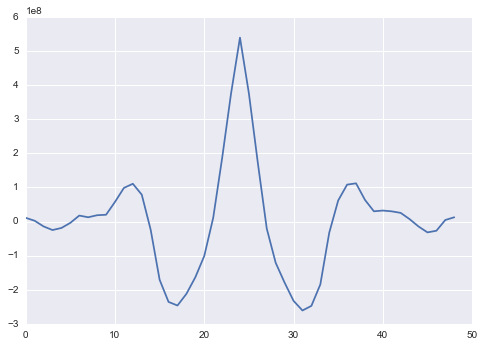

25
Bronx, NY


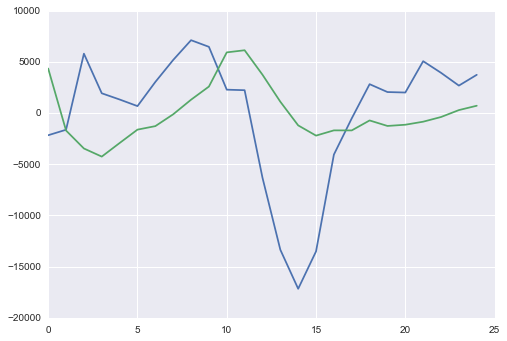

-6624424.3488


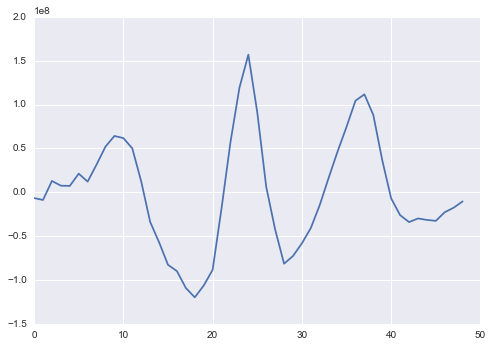

26
Palm Beach, FL


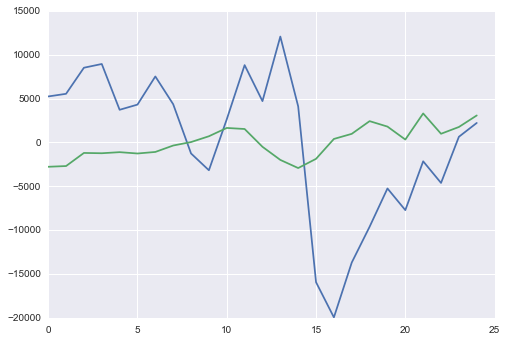

-405795.816


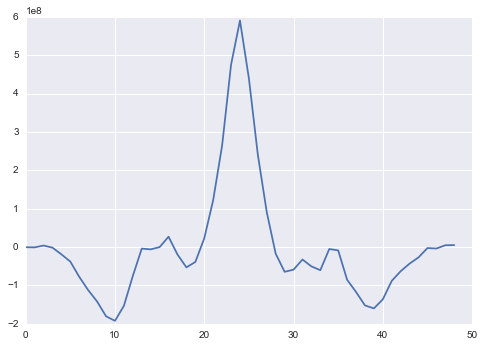

27
Nassau, NY


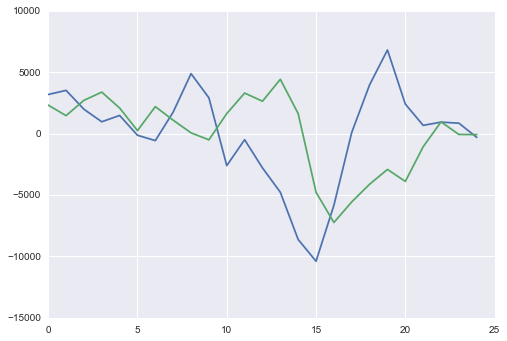

7113957.088


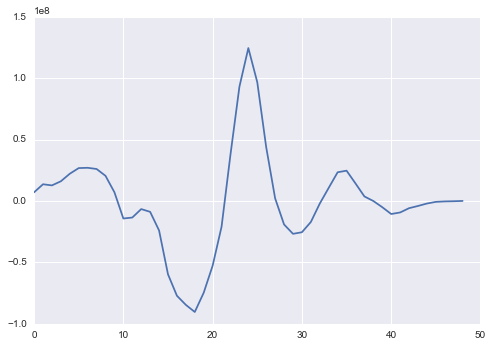

28
Hillsborough, FL


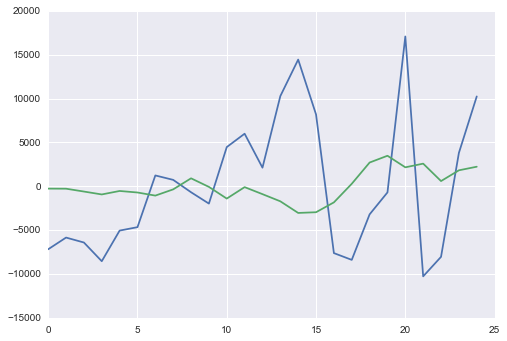

-10312029.8432


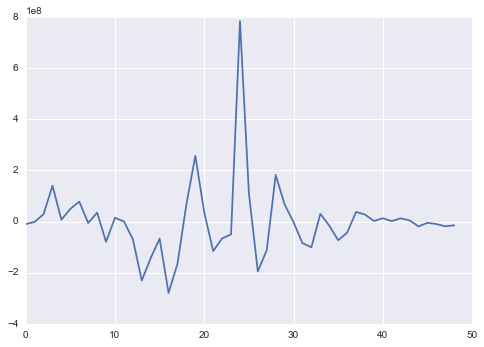

29
Cuyahoga, OH


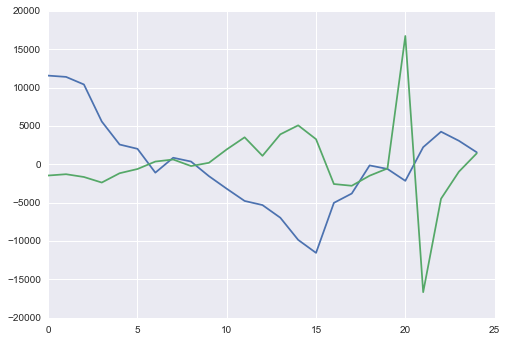

33546023.5264


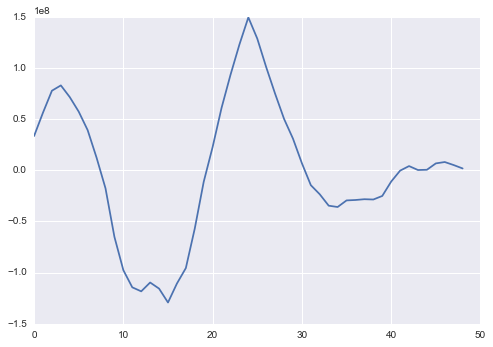

In [43]:
a=list(csv.reader(open('BEA_County_Population_1969_2015(1).csv')))
for i in range(len(topCode)):
    print i

    rank=i
    print top[rank]
    c=(a[topInd[rank]][8:-1])
    ome=diff((np.array(c, dtype=np.int)))[-25:]

    element5=topCode[rank]
    IN=[]
    for element in mig:
        if ((element[1])==element5):
            IN.append(np.array(element,dtype=np.int))

        
    OUT=[]
    for element in mig:
        if ((element[0])==element5):
            OUT.append(np.array(element,dtype=np.int))

    outs=(array(OUT, dtype=np.int)[:,2:])
    ins=(array(IN, dtype=np.int)[:,2:])


    plot(ome-mean(ome))
    plot(lediff-mean(lediff))
    show()
    lediff=sum(ins.T,1)-sum(outs.T,1)
    core=correlate(ome-mean(ome),lediff-mean(lediff),'full')
    plot(core)
    print core[0]
    show()
